# Springboard Project: Emerging Business Opportunities



## Background:

Our client (Manufacturer A) is a leading Food & Beverage manufacturer. Client wants to understand the growth patterns of consumer preferences (themes) and evaluate positioning of their brand across different themes. Client also wants to know the sales drivers of their products.

## Data:

Client will provide the following data for the project:

●	Sales Data – At UPC level for both Client and Competitors

●	Social Media Data – Mentions of theme across all Social media Platforms

●	Google Search Data – Search volume of the Theme

●	Theme_Product_List – Product to theme Mapping

●	Product_Manufacturer_List – Product to Manufacturer Mapping

●	Theme List – Theme Names


## Deliverables:

### Data Preparation from available sources

Demonstrates:

●	Merge the required data sources

●	Provide the list of themes available across all data sources

●	Understands consumer preference(themes) available in each data source

●	Provide a report for data sufficiency, sparsity and anomalies in each data source


### Exploratory data analysis

Demonstrates:

●	Understand the overall market share of our client

●	Find the potential competitors for our client in each theme

●	Is there a Trend/Seasonality across themes

●	Identify top 5 themes with the highest business opportunity (this Is subjective. Back up your top 5 with valid reasoning)


### Build the sales model and identify the driver of sales (Theme Level)

Demonstrates:

●	Perform appropriate data transformation/aggregation to build models

●	Create a dependent variable by aggregating sales of our client to corresponding theme level

●	Estimate the impact on sales due to social trends, search trends, own price and competitor effects

●	Identify the right model technique and select the suitable variables

●	Justify the estimated impacts are accurate

o	Model Performance

o	Hold out validation

●	Build the Model only for Top 3 themes




### Recommend levers for business growth

Demonstrates:

●	What are the controllable factors that could be leveraged by the client to increase sales across 
themes?

●	How to achieve a 5% increase in sales overall or a specific theme?


### Guidelines from Trainer

->Merge data sources based on your datascience and creative skills. There can be some issues related to date-time, rectify it on your own.

->Mode of presentation will totally depend on you i.e. we can use either Excel, Powerpoint or Jupyter Notebook to present or show it to our trainers.

->EDA should have valid logical reasoning.

->You can do EDA for more than they have asked for. Also try to answer questions for top 5 themes.

->You can also explain seasonality trends for different-different themes in the Eda part.

->Try to group your data based on themes for every product manufactured by different clients.

->Sales Quantity will be the dependent variable for modeling as conveyed by the trainer.

->Also we need to do modeling for top 3 themes for our manufacturer only.

->You don't have to keep total revenue sales or total weight sales as the dependent variable.

->Modeling needs to be done only for our client, you have to think about how competitor affects our sale.So, our dataset should only contain Manufacturer A products.

->Use only OLS model only i.e. simple linear regression model for modeling purpose. Don't use any decision trees or random forest model. Use code templates.

-> For OLS model use regression code templates. Your coefficients should make businees sense otherwise modify your data.

->What are the controllable things that a client can do in order to increase sales.

->Don't go for any optimization technique, try to observe the key drivers of your sale.

### 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats
import pylab

### 2. Importing the dataset

In [2]:
google_search_data = pd.read_csv('Case Data set\Data\google_search_data.csv')
product_manufacturer_list = pd.read_csv('Case Data set\Data\product_manufacturer_list.csv')
sales_data = pd.read_csv('Case Data set\Data\sales_data.csv')
social_media_data = pd.read_excel('Case Data set\Data\social_media_data.xlsx')
Theme_product_list = pd.read_csv('Case Data set\Data\Theme_product_list.csv')
Theme_list = pd.read_csv('Case Data set\Data\Theme_list.csv')

#### google search data

In [3]:
google_search_data.head()

date platform  searchVolume  Claim_ID  week_number  year_new
0  05-01-2014   google           349       916            1      2014
1  06-01-2014   google           349       916            2      2014
2  07-01-2014   google           697       916            2      2014
3  10-01-2014   google           349       916            2      2014
4  20-01-2014   google           697       916            4      2014

In [4]:
google_search_data['platform'].value_counts()

google     138115
amazon      23828
chewy       13352
walmart      6270
Name: platform, dtype: int64

#### Most searched Platforms

In [5]:
google_search_data['platform'].unique()

array(['google', 'chewy', 'amazon', 'walmart'], dtype=object)

In [6]:
google_search_data['platform'].nunique()

4

In [7]:
google_search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          181565 non-null  object
 1   platform      181565 non-null  object
 2   searchVolume  181565 non-null  int64 
 3   Claim_ID      181565 non-null  int64 
 4   week_number   181565 non-null  int64 
 5   year_new      181565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ MB


In [8]:
google_search_data.isna().sum()

date            0
platform        0
searchVolume    0
Claim_ID        0
week_number     0
year_new        0
dtype: int64

First moment business decision

In [9]:
google_search_data.describe()

searchVolume       Claim_ID    week_number       year_new
count  181565.000000  181565.000000  181565.000000  181565.000000
mean     5823.349318     629.557629      25.169823    2017.013196
std     11251.075181     284.426899      14.613668       1.655898
min         1.000000       8.000000       1.000000    2014.000000
25%       281.000000     516.000000      13.000000    2016.000000
50%      1173.000000     670.000000      25.000000    2017.000000
75%      5539.000000     901.000000      37.000000    2018.000000
max    370484.000000     999.000000      53.000000    2019.000000

second moment business decision

In [10]:
range1 = max(google_search_data.searchVolume)-min(google_search_data.searchVolume)
google_search_data.searchVolume.var(),google_search_data.searchVolume.std(), range1,max(google_search_data.searchVolume)

(126586692.73322006, 11251.07518120913, 370483, 370484)

Third and fourth moment business decision

In [11]:
google_search_data.searchVolume.skew(),google_search_data.searchVolume.kurt()

(3.719983323158315, 24.00254851189155)

plots

((array([-4.47516489, -4.28186585, -4.1769177 , ...,  4.1769177 ,
          4.28186585,  4.47516489]),
  array([     1,      1,      1, ..., 197772, 259069, 370484], dtype=int64)),
 (8377.696597988464, 5823.349318425908, 0.744596182368985))

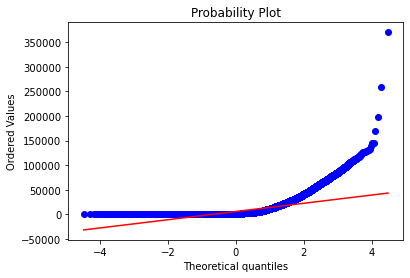

In [12]:
stats.probplot(google_search_data.searchVolume, dist='norm', plot=pylab)

((array([-4.47516489, -4.28186585, -4.1769177 , ...,  4.1769177 ,
          4.28186585,  4.47516489]),
  array([ 0.        ,  0.        ,  0.        , ..., 12.19487013,
         12.46484971, 12.82256554])),
 (2.0305060833871362, 7.06060120264544, 0.9940117251851177))

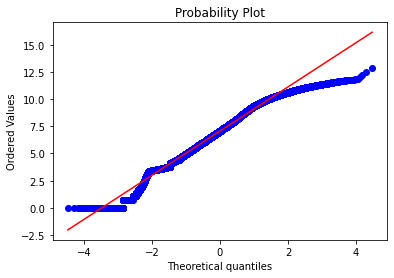

In [13]:
stats.probplot(np.log(google_search_data.searchVolume), dist='norm', plot=pylab)

In [14]:
google_search_data.searchVolume=np.log(google_search_data.searchVolume)

(array([ 1193.,  1236., 10346., 20051., 35447., 43301., 32839., 28028.,
         9040.,    84.]),
 array([ 0.        ,  1.28225655,  2.56451311,  3.84676966,  5.12902622,
         6.41128277,  7.69353932,  8.97579588, 10.25805243, 11.54030898,
        12.82256554]),
 <BarContainer object of 10 artists>)

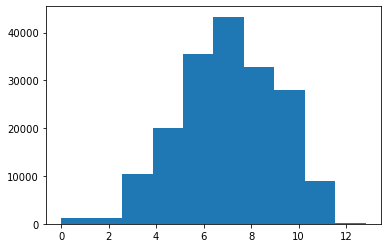

In [15]:
plt.hist(google_search_data.searchVolume)

In [16]:
google_search_data

date platform  searchVolume  Claim_ID  week_number  year_new
0       05-01-2014   google      5.855072       916            1      2014
1       06-01-2014   google      5.855072       916            2      2014
2       07-01-2014   google      6.546785       916            2      2014
3       10-01-2014   google      5.855072       916            2      2014
4       20-01-2014   google      6.546785       916            4      2014
...            ...      ...           ...       ...          ...       ...
181560  05-09-2019  walmart      4.828314       980           36      2019
181561  22-09-2019  walmart      4.430817       980           38      2019
181562  26-09-2019  walmart      3.737670       980           39      2019
181563  15-07-2019  walmart      3.737670       622           29      2019
181564  02-09-2019  walmart      3.737670       689           36      2019

[181565 rows x 6 columns]

#### Product manufacturer list

In [17]:
product_manufacturer_list.head()

PRODUCT_ID  Vendor  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0           1  Others         NaN         NaN         NaN         NaN   
1           2  Others         NaN         NaN         NaN         NaN   
2           3  Others         NaN         NaN         NaN         NaN   
3           4  Others         NaN         NaN         NaN         NaN   
4           5  Others         NaN         NaN         NaN         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [18]:
product_manufacturer_list['Vendor'].value_counts()

Others           28335
Private Label    21539
A                 5584
B                 5371
D                 2780
H                 1733
F                 1379
G                  230
E                  224
Name: Vendor, dtype: int64

In [19]:
product_manufacturer_list.isna().sum()

PRODUCT_ID        0
Vendor            0
Unnamed: 2    67175
Unnamed: 3    67175
Unnamed: 4    67175
Unnamed: 5    67175
Unnamed: 6    67175
dtype: int64

#### Sales data

In [20]:
sales_data.head()

system_calendar_key_N  product_id  sales_dollars_value  sales_units_value  \
0               20160109           1              13927.0                934   
1               20160109           3              10289.0               1592   
2               20160109           4                357.0                 22   
3               20160109           6              23113.0               2027   
4               20160109           7              23177.0               3231   

   sales_lbs_value  
0            18680  
1            28646  
2              440  
3            81088  
4            58164

In [21]:
sales_data.isna().sum()

system_calendar_key_N    0
product_id               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
dtype: int64

First moment business decision

In [22]:
sales_data.describe()

system_calendar_key_N    product_id  sales_dollars_value  \
count           4.526182e+06  4.526182e+06         4.526182e+06   
mean            2.017505e+07  2.885857e+04         2.159454e+04   
std             1.073537e+04  1.531254e+04         7.818057e+04   
min             2.016011e+07  1.000000e+00         0.000000e+00   
25%             2.016123e+07  1.506900e+04         5.230000e+02   
50%             2.017121e+07  2.998100e+04         2.655000e+03   
75%             2.018110e+07  4.151300e+04         1.176500e+04   
max             2.019100e+07  5.731700e+04         4.395964e+06   

       sales_units_value  sales_lbs_value  
count       4.526182e+06     4.526182e+06  
mean        5.160053e+03     1.715339e+04  
std         2.685341e+04     1.273401e+05  
min         1.000000e+00     0.000000e+00  
25%         8.000000e+01     8.600000e+01  
50%         4.030000e+02     6.110000e+02  
75%         1.807000e+03     3.770000e+03  
max         8.739980e+05     1.100310e+07

second moment business decision

In [23]:
range1 = max(sales_data.sales_dollars_value)-min(sales_data.sales_dollars_value)
sales_data.sales_dollars_value.var(),sales_data.sales_dollars_value.std(), range1,min(sales_data.sales_dollars_value),max(sales_data.sales_dollars_value)

(6112200841.619174, 78180.56562611436, 4395964.0, 0.0, 4395964.0)

In [24]:
sales_data[sales_data['sales_dollars_value']==0]

system_calendar_key_N  product_id  sales_dollars_value  \
149                   20160109       11443                  0.0   
400                   20160109       46133                  0.0   
685                   20160109       11589                  0.0   
1210                  20160109       11707                  0.0   
1589                  20160109       35076                  0.0   
...                        ...         ...                  ...   
4525626               20181027       46283                  0.0   
4525928               20181027       46970                  0.0   
4526015               20181027       47155                  0.0   
4526119               20181027       47408                  0.0   
4526161               20181027       47497                  0.0   

         sales_units_value  sales_lbs_value  
149                     19                7  
400                      3                1  
685                     24                9  
1210                    43               16  
1589                     4                1  
...                    ...              ...  
4525626                  9                2  
4525928                 46               11  
4526015                  1                4  
4526119                  1                0  
4526161                  1                1  

[17662 rows x 5 columns]

17662 rows have sales dollar value as zero which doesn't make sense as the sales units and sales pounds value are not zero. if it is considered a free of cost quantity, we are not considering it as it doesn't impact our revenue. Hence removing these 17662 rows.

In [25]:
range1 = max(sales_data.sales_units_value)-min(sales_data.sales_units_value)
sales_data.sales_units_value.var(),sales_data.sales_units_value.std(), range1,min(sales_data.sales_units_value),max(sales_data.sales_units_value)

(721105511.8272831, 26853.407825214348, 873997, 1, 873998)

In [26]:
range1 = max(sales_data.sales_lbs_value)-min(sales_data.sales_lbs_value)
sales_data.sales_lbs_value.var(),sales_data.sales_lbs_value.std(), range1,min(sales_data.sales_lbs_value),max(sales_data.sales_lbs_value)

(16215507277.51426, 127340.12438157212, 11003100, 0, 11003100)

In [27]:
sales_data[(sales_data['sales_lbs_value']==0)]

system_calendar_key_N  product_id  sales_dollars_value  \
26                    20160109         116                  3.0   
310                   20160109       34090                  2.0   
311                   20160109       34092                  7.0   
314                   20160109       34103                 12.0   
315                   20160109       34106                  2.0   
...                        ...         ...                  ...   
4525735               20181027       46537                  1.0   
4525995               20181027       47111                  1.0   
4526058               20181027       47263                  1.0   
4526089               20181027       47341                  1.0   
4526119               20181027       47408                  0.0   

         sales_units_value  sales_lbs_value  
26                       3                0  
310                      1                0  
311                      2                0  
314                      2                0  
315                      1                0  
...                    ...              ...  
4525735                  1                0  
4525995                  1                0  
4526058                  1                0  
4526089                  1                0  
4526119                  1                0  

[53720 rows x 5 columns]

In [28]:
sales_data.drop(sales_data[sales_data['sales_dollars_value']==0].index, inplace=True)

In [29]:
sales_data.drop(sales_data[sales_data['sales_lbs_value']==0].index, inplace=True)

In [30]:
sales_data

system_calendar_key_N  product_id  sales_dollars_value  \
0                     20160109           1              13927.0   
1                     20160109           3              10289.0   
2                     20160109           4                357.0   
3                     20160109           6              23113.0   
4                     20160109           7              23177.0   
...                        ...         ...                  ...   
4526177               20181027       47536                  8.0   
4526178               20181027       47539                391.0   
4526179               20181027       47543                105.0   
4526180               20181027       47544               3720.0   
4526181               20181027       47545               1729.0   

         sales_units_value  sales_lbs_value  
0                      934            18680  
1                     1592            28646  
2                       22              440  
3                     2027            81088  
4                     3231            58164  
...                    ...              ...  
4526177                  2                3  
4526178                 39               68  
4526179                 59               48  
4526180               1246             4361  
4526181               2016              378  

[4462965 rows x 5 columns]

Third and fourth moment business decision

In [31]:
sales_data.sales_dollars_value.skew(),sales_data.sales_dollars_value.kurt()

(13.764275418407543, 379.9675748964544)

In [32]:
sales_data.sales_units_value.skew(), sales_data.sales_units_value.kurt()

(13.284320604051636, 230.13146566492955)

In [33]:
sales_data.sales_lbs_value.skew(), sales_data.sales_lbs_value.kurt()

(30.0116310879485, 1430.7224687868531)

plots

(array([4.001847e+06, 2.060120e+05, 8.790400e+04, 4.736600e+04,
        3.188000e+04, 2.019700e+04, 1.398800e+04, 1.092800e+04,
        8.528000e+03, 6.911000e+03, 5.431000e+03, 4.314000e+03,
        2.955000e+03, 2.261000e+03, 1.920000e+03, 1.585000e+03,
        1.288000e+03, 1.023000e+03, 7.630000e+02, 5.920000e+02,
        5.670000e+02, 6.440000e+02, 5.400000e+02, 4.680000e+02,
        3.860000e+02, 3.110000e+02, 2.780000e+02, 2.090000e+02,
        2.080000e+02, 1.800000e+02, 1.540000e+02, 1.390000e+02,
        1.050000e+02, 6.100000e+01, 4.400000e+01, 6.300000e+01,
        5.500000e+01, 4.200000e+01, 2.700000e+01, 3.400000e+01,
        4.200000e+01, 3.600000e+01, 4.500000e+01, 3.000000e+01,
        2.500000e+01, 1.800000e+01, 1.400000e+01, 1.500000e+01,
        1.200000e+01, 1.600000e+01, 4.000000e+00, 1.400000e+01,
        1.400000e+01, 1.500000e+01, 1.800000e+01, 2.400000e+01,
        1.000000e+01, 1.000000e+01, 1.500000e+01, 1.500000e+01,
        9.000000e+00, 1.500000e+01, 8.00

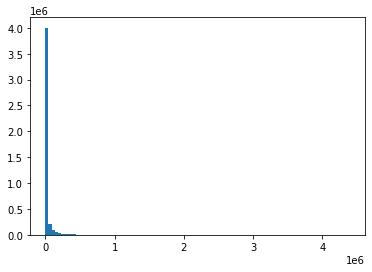

In [34]:
plt.hist(sales_data.sales_dollars_value, bins=100)

(array([4.04587e+06, 1.80854e+05, 7.31820e+04, 3.94280e+04, 2.57560e+04,
        1.66490e+04, 1.24460e+04, 9.28700e+03, 7.22200e+03, 5.88300e+03,
        4.65500e+03, 3.57800e+03, 2.78400e+03, 2.44300e+03, 2.09400e+03,
        1.91300e+03, 1.69000e+03, 1.62000e+03, 1.45400e+03, 1.33600e+03,
        1.25800e+03, 1.41200e+03, 1.34300e+03, 1.14800e+03, 1.07500e+03,
        1.10500e+03, 1.05400e+03, 8.85000e+02, 7.13000e+02, 6.91000e+02,
        6.17000e+02, 6.84000e+02, 6.04000e+02, 5.34000e+02, 5.25000e+02,
        4.46000e+02, 4.56000e+02, 4.20000e+02, 4.21000e+02, 4.37000e+02,
        3.76000e+02, 3.59000e+02, 3.51000e+02, 3.07000e+02, 3.07000e+02,
        2.86000e+02, 2.64000e+02, 2.72000e+02, 2.88000e+02, 2.80000e+02,
        2.43000e+02, 2.06000e+02, 1.87000e+02, 1.53000e+02, 1.28000e+02,
        1.51000e+02, 1.33000e+02, 1.54000e+02, 1.43000e+02, 1.38000e+02,
        1.38000e+02, 1.29000e+02, 1.14000e+02, 1.26000e+02, 1.32000e+02,
        1.58000e+02, 1.46000e+02, 1.64000e+02, 1.29

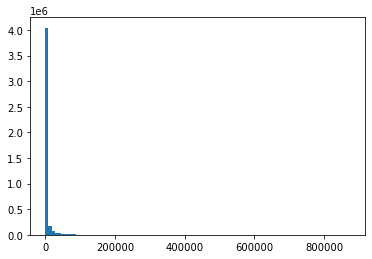

In [35]:
plt.hist(sales_data.sales_units_value, bins=100)

(array([4.3331e+06, 6.0933e+04, 2.4814e+04, 1.2365e+04, 8.2760e+03,
        5.6470e+03, 3.5400e+03, 2.4690e+03, 1.7230e+03, 1.4940e+03,
        1.1620e+03, 1.0940e+03, 9.8300e+02, 9.1100e+02, 7.1800e+02,
        4.0500e+02, 3.2400e+02, 2.8500e+02, 1.9500e+02, 1.6200e+02,
        1.3300e+02, 1.1700e+02, 9.8000e+01, 1.3000e+02, 1.4500e+02,
        1.7500e+02, 1.6500e+02, 1.7000e+02, 1.2300e+02, 9.1000e+01,
        5.0000e+01, 4.6000e+01, 5.2000e+01, 6.1000e+01, 7.0000e+01,
        5.6000e+01, 3.2000e+01, 3.4000e+01, 1.7000e+01, 1.8000e+01,
        3.0000e+01, 1.8000e+01, 1.6000e+01, 1.0000e+00, 9.0000e+00,
        1.5000e+01, 1.5000e+01, 1.1000e+01, 1.2000e+01, 1.6000e+01,
        1.1000e+01, 1.0000e+01, 1.3000e+01, 1.3000e+01, 1.2000e+01,
        1.7000e+01, 1.6000e+01, 1.4000e+01, 1.0000e+01, 1.5000e+01,
        1.0000e+01, 1.1000e+01, 1.2000e+01, 1.5000e+01, 1.1000e+01,
        1.8000e+01, 1.7000e+01, 2.2000e+01, 1.7000e+01, 1.0000e+01,
        1.9000e+01, 1.9000e+01, 1.1000e+01, 9.00

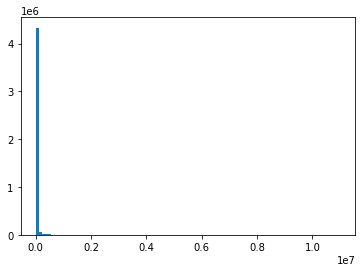

In [36]:
plt.hist(sales_data.sales_lbs_value, bins=100)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 4.375272e+06,
         4.376611e+06, 4.395964e+06])),
 (39989.90353145792, 21900.356324551038, 0.508196260905965))

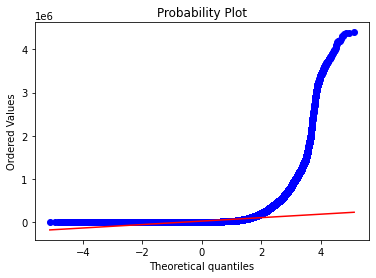

In [37]:
stats.probplot(sales_data.sales_dollars_value, dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([ 0.        ,  0.        ,  0.        , ..., 15.29147925,
         15.29178524, 15.29619741])),
 (2.410722643797487, 7.757693412116134, 0.994128849029883))

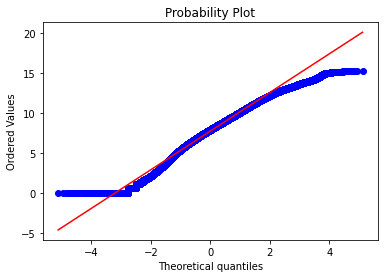

In [38]:
stats.probplot(np.log(sales_data.sales_dollars_value), dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([     1,      1,      1, ..., 856316, 865676, 873998], dtype=int64)),
 (10949.739575763819, 5233.099949473047, 0.4050075053171032))

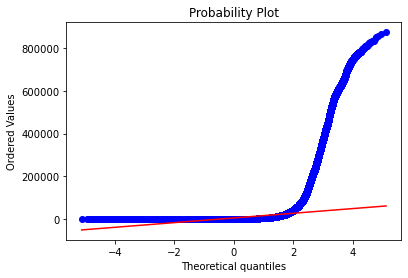

In [39]:
stats.probplot(sales_data.sales_units_value, dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([ 0.        ,  0.        ,  0.        , ..., 13.66039475,
         13.67126598, 13.68083337])),
 (2.3707475507106155, 5.972450880845805, 0.9982559533431954))

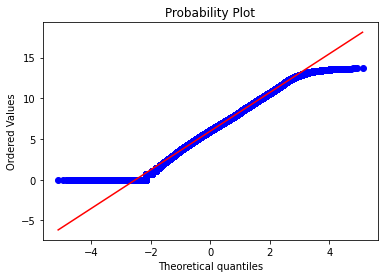

In [40]:
stats.probplot(np.log(sales_data.sales_units_value), dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([       1,        1,        1, ..., 10501250, 10516150, 11003100],
        dtype=int64)),
 (40025.65716812249, 17396.24660265091, 0.31215780022330003))

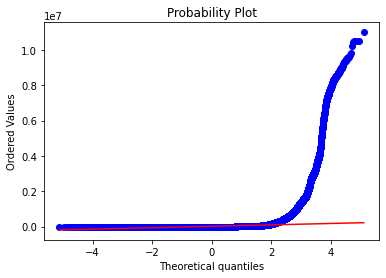

In [41]:
stats.probplot(sales_data.sales_lbs_value, dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([ 0.        ,  0.        ,  0.        , ..., 16.16700486,
         16.16842273, 16.21368761])),
 (2.754523842977448, 6.402305948307131, 0.9983855753124597))

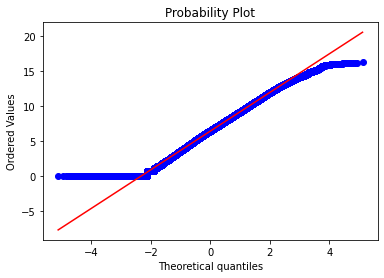

In [42]:
stats.probplot(np.log(sales_data.sales_lbs_value), dist='norm', plot=pylab)

In [43]:
sales_data.sales_dollars_value= np.log(sales_data.sales_dollars_value)

In [44]:
sales_data.sales_lbs_value= np.log(sales_data.sales_lbs_value)

In [45]:
sales_data.sales_units_value= np.log(sales_data.sales_units_value)

(array([ 148975.,  270002.,  504753.,  867710., 1077902.,  845785.,
         467598.,  205569.,   58619.,   16052.]),
 array([ 0.        ,  1.36808334,  2.73616667,  4.10425001,  5.47233335,
         6.84041668,  8.20850002,  9.57658336, 10.94466669, 12.31275003,
        13.68083337]),
 <BarContainer object of 10 artists>)

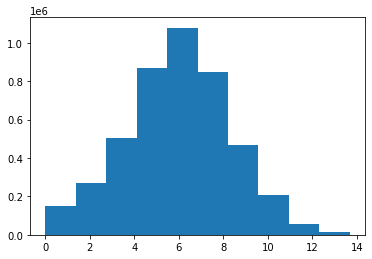

In [46]:
plt.hist(sales_data.sales_units_value)

(array([  52910.,  149535.,  262442.,  531274., 1014204., 1188777.,
         808580.,  359092.,   91873.,    4278.]),
 array([ 0.        ,  1.52961974,  3.05923948,  4.58885922,  6.11847896,
         7.6480987 ,  9.17771844, 10.70733818, 12.23695792, 13.76657766,
        15.29619741]),
 <BarContainer object of 10 artists>)

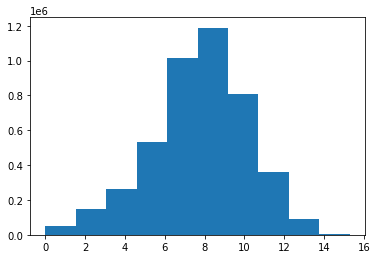

In [47]:
plt.hist(sales_data.sales_dollars_value)

(array([ 233317.,  361544.,  675531.,  975506., 1015729.,  690891.,
         351574.,  126202.,   30274.,    2397.]),
 array([ 0.        ,  1.62136876,  3.24273752,  4.86410628,  6.48547504,
         8.1068438 ,  9.72821257, 11.34958133, 12.97095009, 14.59231885,
        16.21368761]),
 <BarContainer object of 10 artists>)

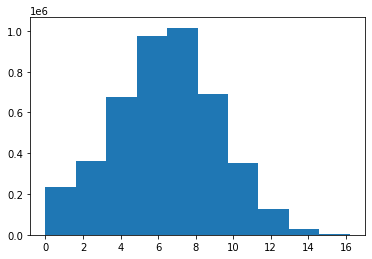

In [48]:
plt.hist(sales_data.sales_lbs_value)

#### social media data

In [49]:
social_media_data.head()

Theme Id       published_date  total_post
0     148.0  2015-01-10 00:00:00          76
1     148.0  2015-10-10 00:00:00          31
2     148.0  2015-11-10 00:00:00          65
3     148.0  2015-12-10 00:00:00          88
4     148.0           10/13/2015          85

In [50]:
social_media_data.describe()

Theme Id     total_post
count  314879.000000  533390.000000
mean      618.714049    1054.344890
std       290.145829    4459.377626
min         8.000000       0.000000
25%       440.000000       3.000000
50%       677.000000      35.000000
75%       870.000000     343.000000
max       999.000000  369528.000000

second moment business decision

In [51]:
range1 = max(social_media_data.total_post)-min(social_media_data.total_post)
social_media_data.total_post.var(),social_media_data.total_post.std(), range1,min(social_media_data.total_post),max(social_media_data.total_post)

(19886048.807687316, 4459.377625598366, 369528, 0, 369528)

In [52]:
no_posts =social_media_data[(social_media_data['total_post']==0)]

In [53]:
no_posts['Theme Id'].nunique()

153

Third and fourth moment business decision

In [54]:
social_media_data['total_post'].skew(), social_media_data['total_post'].kurt()

(13.625224300263731, 361.68506791653)

plots

(array([5.32046e+05, 1.04200e+03, 2.55000e+02, 2.80000e+01, 1.20000e+01,
        3.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0. ,  36952.8,  73905.6, 110858.4, 147811.2, 184764. ,
        221716.8, 258669.6, 295622.4, 332575.2, 369528. ]),
 <BarContainer object of 10 artists>)

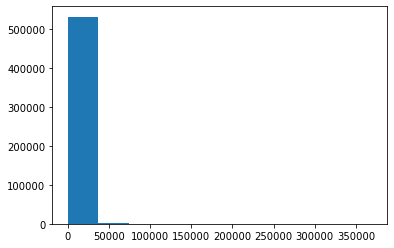

In [55]:
plt.hist(social_media_data['total_post'])

In [56]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [57]:
social_media_data['total_post'] = norm_func(social_media_data['total_post'])

In [58]:
social_media_data

Theme Id       published_date  total_post
0          148.0  2015-01-10 00:00:00    0.000206
1          148.0  2015-10-10 00:00:00    0.000084
2          148.0  2015-11-10 00:00:00    0.000176
3          148.0  2015-12-10 00:00:00    0.000238
4          148.0           10/13/2015    0.000230
...          ...                  ...         ...
533385     876.0  2019-05-09 00:00:00    0.012605
533386     876.0  2019-06-09 00:00:00    0.010097
533387     876.0  2019-07-09 00:00:00    0.006322
533388     876.0  2019-08-09 00:00:00    0.003718
533389     876.0  2019-09-09 00:00:00    0.003902

[533390 rows x 3 columns]

#### Theme list

In [59]:
Theme_list.head()

CLAIM_ID Claim Name
0         0   No Claim
1         8   low carb
2        15      beans
3        16      cocoa
4        26    vanilla

In [60]:
Theme_list['CLAIM_ID'].nunique()

208

#### Theme product list

In [61]:
Theme_product_list.head()

PRODUCT_ID  CLAIM_ID
0          26         8
1          29         8
2          48        81
3          50        81
4          74       227

In [62]:
Theme_product_list['CLAIM_ID'].nunique()

51

### 3. Data-Preprocessing

#### 3.1 Merging the Datasets

Step-1: Merge Theme_product_list and Theme_list,LEFT JOIN on CLAIM_ID

We are joining theme product list with theme list because we want each product id
corresponding to each claim id/theme id and not vice-versa.
So, we cannot lose information from theme product list

In [63]:
Theme_product_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91485 entries, 0 to 91484
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PRODUCT_ID  91485 non-null  int64
 1   CLAIM_ID    91485 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [64]:
Theme_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CLAIM_ID    208 non-null    int64 
 1   Claim Name  208 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [65]:
theme_prod_list = pd.merge(Theme_product_list,Theme_list,on = 'CLAIM_ID',how='left')

In [66]:
theme_prod_list

PRODUCT_ID  CLAIM_ID Claim Name
0              26         8   low carb
1              29         8   low carb
2              48        81   gmo free
3              50        81   gmo free
4              74       227     salmon
...           ...       ...        ...
91480        8158         0   No Claim
91481       45183         0   No Claim
91482       25690         0   No Claim
91483       46085         0   No Claim
91484       34907         0   No Claim

[91485 rows x 3 columns]

In [67]:
theme_prod_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91485 entries, 0 to 91484
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  91485 non-null  int64 
 1   CLAIM_ID    91485 non-null  int64 
 2   Claim Name  91485 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


Step-2: Merge theme_prod_list with product_manufacturer_list, LEFT JOIN ON PRODUCT_ID

We are joining theme product list with product_manufacturer list because we want each product id
corresponding to each vendor for a particular claim id/theme id and not vice-versa.
So, we cannot lose information from product manufacturer list

In [68]:
product_manufacturer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRODUCT_ID  67175 non-null  int64  
 1   Vendor      67175 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.6+ MB


In [69]:
product_manufacturer_list.head()

PRODUCT_ID  Vendor  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0           1  Others         NaN         NaN         NaN         NaN   
1           2  Others         NaN         NaN         NaN         NaN   
2           3  Others         NaN         NaN         NaN         NaN   
3           4  Others         NaN         NaN         NaN         NaN   
4           5  Others         NaN         NaN         NaN         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [70]:
product_manufacturer_list = product_manufacturer_list.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)

In [71]:
product_manufacturer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  67175 non-null  int64 
 1   Vendor      67175 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [72]:
product_manufacturer_list.head()

PRODUCT_ID  Vendor
0           1  Others
1           2  Others
2           3  Others
3           4  Others
4           5  Others

In [73]:
product_manufacturer_list['PRODUCT_ID'].nunique()

67175

In [74]:
theme_prod_list['PRODUCT_ID'].nunique()

57317

In [75]:
product_manufacturer_theme_list = pd.merge(product_manufacturer_list,theme_prod_list,on = 'PRODUCT_ID',how='left')

In [76]:
product_manufacturer_theme_list.head()

PRODUCT_ID  Vendor  CLAIM_ID Claim Name
0           1  Others       0.0   No Claim
1           2  Others       0.0   No Claim
2           3  Others       0.0   No Claim
3           4  Others       0.0   No Claim
4           5  Others       0.0   No Claim

In [77]:
product_manufacturer_theme_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101343 entries, 0 to 101342
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PRODUCT_ID  101343 non-null  int64  
 1   Vendor      101343 non-null  object 
 2   CLAIM_ID    91485 non-null   float64
 3   Claim Name  91485 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ MB


In [78]:
product_manufacturer_theme_list

PRODUCT_ID         Vendor  CLAIM_ID Claim Name
0                1         Others       0.0   No Claim
1                2         Others       0.0   No Claim
2                3         Others       0.0   No Claim
3                4         Others       0.0   No Claim
4                5         Others       0.0   No Claim
...            ...            ...       ...        ...
101338       67171  Private Label       NaN        NaN
101339       67172  Private Label       NaN        NaN
101340       67173  Private Label       NaN        NaN
101341       67174  Private Label       NaN        NaN
101342       67175  Private Label       NaN        NaN

[101343 rows x 4 columns]

In [79]:
product_manufacturer_theme_list['PRODUCT_ID'].nunique()

67175

In [80]:
product_manufacturer_theme_list[product_manufacturer_theme_list['PRODUCT_ID']==543]

PRODUCT_ID  Vendor  CLAIM_ID              Claim Name
1060         543  Others      39.0  high/source of protein
1061         543  Others     158.0                 chicken
1062         543  Others     438.0         ethnic & exotic
1063         543  Others      16.0                   cocoa
1064         543  Others       8.0                low carb
1065         543  Others      75.0           french bisque
1066         543  Others     432.0          apple cinnamon

In [81]:
product_manufacturer_theme_list['CLAIM_ID'].nunique()

51

One product id can have more than one claim/theme, will work on this in feature-engineering part

Step-3: Simplify sales data to achieve good business interpretation

In [82]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4462965 entries, 0 to 4526181
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   system_calendar_key_N  int64  
 1   product_id             int64  
 2   sales_dollars_value    float64
 3   sales_units_value      float64
 4   sales_lbs_value        float64
dtypes: float64(3), int64(2)
memory usage: 204.3 MB


In [83]:
sales_data['product_id'].nunique()

41922

In [84]:
sales_data.head()

system_calendar_key_N  product_id  sales_dollars_value  sales_units_value  \
0               20160109           1             9.541585           6.839476   
1               20160109           3             9.238831           7.372746   
2               20160109           4             5.877736           3.091042   
3               20160109           6            10.048151           7.614312   
4               20160109           7            10.050916           8.080547   

   sales_lbs_value  
0         9.835209  
1        10.262769  
2         6.086775  
3        11.303290  
4        10.971022

In [85]:
sales_data.rename(columns={'product_id':'PRODUCT_ID'},inplace=True)

In [86]:
sales_data.head()

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0               20160109           1             9.541585           6.839476   
1               20160109           3             9.238831           7.372746   
2               20160109           4             5.877736           3.091042   
3               20160109           6            10.048151           7.614312   
4               20160109           7            10.050916           8.080547   

   sales_lbs_value  
0         9.835209  
1        10.262769  
2         6.086775  
3        11.303290  
4        10.971022

Sales data is based on day basis but for easy business interpretation,
let's group by this dataset by product id then on year basis

In [87]:
sales_data['system_calendar_key_N']

0          20160109
1          20160109
2          20160109
3          20160109
4          20160109
             ...   
4526177    20181027
4526178    20181027
4526179    20181027
4526180    20181027
4526181    20181027
Name: system_calendar_key_N, Length: 4462965, dtype: int64

In [88]:
sales_data['system_calendar_key_N'] = pd.to_datetime(sales_data['system_calendar_key_N'], format='%Y%m%d')

In [89]:
sales_data.head(30)

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0             2016-01-09           1             9.541585           6.839476   
1             2016-01-09           3             9.238831           7.372746   
2             2016-01-09           4             5.877736           3.091042   
3             2016-01-09           6            10.048151           7.614312   
4             2016-01-09           7            10.050916           8.080547   
5             2016-01-09           8            10.773294           8.272315   
6             2016-01-09           9            12.627247           9.884254   
7             2016-01-09          11             8.259199           5.817111   
8             2016-01-09          12            10.494159           7.656337   
9             2016-01-09          14             9.940687           7.049255   
10            2016-01-09          15             9.969743           7.074963   
11            2016-01-09          16             9.774574           6.951772   
12            2016-01-09          17            11.858379           8.528924   
13            2016-01-09          18            11.900783           9.110520   
14            2016-01-09          19            10.246226           7.440734   
15            2016-01-09          20             2.890372           0.000000   
16            2016-01-09          21             8.544419           5.659482   
17            2016-01-09          23             9.174817           6.440947   
18            2016-01-09          33             6.693324           4.753590   
19            2016-01-09          34             5.978886           4.060443   
20            2016-01-09          35             7.049255           5.141664   
21            2016-01-09          36             6.354370           4.465908   
22            2016-01-09          37             7.003974           5.068904   
23            2016-01-09          65             1.609438           2.079442   
24            2016-01-09          75             5.891644           4.060443   
25            2016-01-09          90             6.184149           4.060443   
27            2016-01-09         337             9.089189           6.870053   
28            2016-01-09         338             9.374837           5.863631   
29            2016-01-09         342             3.637586           2.397895   
30            2016-01-09         343             6.077642           3.091042   

    sales_lbs_value  
0          9.835209  
1         10.262769  
2          6.086775  
3         11.303290  
4         10.971022  
5         11.268150  
6         13.573145  
7          8.813587  
8         11.345217  
9          9.128696  
10         9.154828  
11         9.947552  
12        12.217715  
13        12.106269  
14        10.436671  
15         1.945910  
16         7.674617  
17         6.440947  
18         4.330733  
19         3.637586  
20         4.727388  
21         4.043051  
22         4.653960  
23         1.386294  
24         3.367296  
25         4.060443  
27         6.870053  
28         7.473069  
29         2.564949  
30         3.258097

In [90]:
sales_data['system_calendar_key_N']

0         2016-01-09
1         2016-01-09
2         2016-01-09
3         2016-01-09
4         2016-01-09
             ...    
4526177   2018-10-27
4526178   2018-10-27
4526179   2018-10-27
4526180   2018-10-27
4526181   2018-10-27
Name: system_calendar_key_N, Length: 4462965, dtype: datetime64[ns]

In [91]:
sales_data['year'], sales_data['month'], sales_data['week'] = sales_data['system_calendar_key_N'].dt.year, sales_data['system_calendar_key_N'].dt.month,sales_data['system_calendar_key_N'].dt.isocalendar().week

In [92]:
sales_data.head()

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  sales_units_value  \
0            2016-01-09           1             9.541585           6.839476   
1            2016-01-09           3             9.238831           7.372746   
2            2016-01-09           4             5.877736           3.091042   
3            2016-01-09           6            10.048151           7.614312   
4            2016-01-09           7            10.050916           8.080547   

   sales_lbs_value  year  month  week  
0         9.835209  2016      1     1  
1        10.262769  2016      1     1  
2         6.086775  2016      1     1  
3        11.303290  2016      1     1  
4        10.971022  2016      1     1

In [93]:
sales_data.drop(['system_calendar_key_N'],axis=1,inplace = True)

In [94]:
sales_data

PRODUCT_ID  sales_dollars_value  sales_units_value  sales_lbs_value  \
0                 1             9.541585           6.839476         9.835209   
1                 3             9.238831           7.372746        10.262769   
2                 4             5.877736           3.091042         6.086775   
3                 6            10.048151           7.614312        11.303290   
4                 7            10.050916           8.080547        10.971022   
...             ...                  ...                ...              ...   
4526177       47536             2.079442           0.693147         1.098612   
4526178       47539             5.968708           3.663562         4.219508   
4526179       47543             4.653960           4.077537         3.871201   
4526180       47544             8.221479           7.127694         8.380457   
4526181       47545             7.455298           7.608871         5.934894   

         year  month  week  
0        2016      1     1  
1        2016      1     1  
2        2016      1     1  
3        2016      1     1  
4        2016      1     1  
...       ...    ...   ...  
4526177  2018     10    43  
4526178  2018     10    43  
4526179  2018     10    43  
4526180  2018     10    43  
4526181  2018     10    43  

[4462965 rows x 7 columns]

In [95]:
sales_data['year'].value_counts()

2018    1230534
2017    1189570
2016    1118032
2019     924829
Name: year, dtype: int64

In [96]:
sales_data['month'].value_counts()

9     414896
6     411065
7     409092
3     408822
4     405075
8     390196
5     361182
2     360908
1     359272
12    345872
10    320078
11    276507
Name: month, dtype: int64

In [97]:
sales_data['week'].value_counts()

35    92238
36    92173
34    92043
33    91912
37    91867
38    91840
39    91837
40    91724
26    91513
32    91463
25    91433
31    91412
27    91234
30    91165
28    91146
29    91132
24    91016
23    90931
9     90627
22    90587
10    90565
21    90513
12    90497
11    90465
13    90453
14    90452
8     90368
15    90354
7     90304
20    90265
18    90251
17    90247
16    90237
6     90160
19    90153
5     90076
2     89891
3     89818
1     89787
4     89776
51    69625
50    69274
46    69269
45    69237
49    69186
44    69044
47    68957
48    68925
41    68897
43    68892
42    68872
52    68862
Name: week, dtype: Int64

Average Sales data grouped by Product_ID per year per month per week basis

In [98]:
sales_data.groupby(['PRODUCT_ID','year','month','week']).mean()

sales_dollars_value  sales_units_value  \
PRODUCT_ID year month week                                           
1          2016 1     1                9.541585           6.839476   
                      2                9.302920           6.645091   
                      3                9.443672           6.777647   
                      4                9.355998           6.710523   
                2     5                9.339525           6.697034   
...                                         ...                ...   
57317      2019 9     36               6.588926           5.583496   
                      37               7.206377           6.190315   
                      38               6.943122           5.902633   
                      39               7.273786           6.240276   
                10    40               6.762730           5.755742   

                            sales_lbs_value  
PRODUCT_ID year month week                   
1          2016 1     1            9.835209  
                      2            9.640823  
                      3            9.773607  
                      4            9.706499  
                2     5            9.692767  
...                                     ...  
57317      2019 9     36           4.605170  
                      37           5.209486  
                      38           4.919981  
                      39           5.262690  
                10    40           4.770685  

[4462965 rows x 3 columns]

Average Sales value for product_id = 1 for year 2016

In [99]:
sales_data.groupby(['PRODUCT_ID','year','month','week']).mean().head(50)

sales_dollars_value  sales_units_value  \
PRODUCT_ID year month week                                           
1          2016 1     1                9.541585           6.839476   
                      2                9.302920           6.645091   
                      3                9.443672           6.777647   
                      4                9.355998           6.710523   
                2     5                9.339525           6.697034   
                      6                9.301916           6.664409   
                      7                9.360827           6.716595   
                      8                9.382948           6.748760   
                3     9                9.460087           6.840547   
                      10               9.388235           6.758095   
                      11               9.361085           6.732211   
                      12               9.300912           6.708084   
                4     13               9.281637           6.639876   
                      14               9.322776           6.672033   
                      15               9.338997           6.677083   
                      16               9.471473           6.804615   
                      17               9.385134           6.751101   
                5     18               9.472628           6.840547   
                      19               9.364434           6.866933   
                      20               9.268326           6.765039   
                      21               9.401209           6.891626   
                6     22               9.535101           7.025538   
                      23               9.408781           6.909753   
                      24               9.309733           6.820016   
                      25               9.437635           6.861711   
                7     26               9.381432           6.935370   
                      27               9.359967           6.857514   
                      28               9.428029           6.909753   
                      29               9.323223           6.797940   
                      30               9.365719           6.809039   
                8     31               9.329722           6.827629   
                      32               9.311181           6.693324   
                      33               9.380505           6.786717   
                      34               9.460632           6.848005   
                9     35               9.370331           6.733402   
                      36               9.233178           6.618739   
                      37               9.325899           6.705639   
                      38               9.359277           6.783325   
                10    39               9.321524           6.829794   
                      40               9.371013           6.897705   
                      41               9.451245           6.923629   
                      42               9.348971           6.792344   
                      43               9.321524           6.784457   
                11    44               9.393079           6.875232   
                      45               9.398892           6.797940   
                      46               9.451324           6.839476   
                      47               9.384798           6.776507   
                12    48               9.448963           6.848005   
                      49               9.357812           6.769642   
                      50               9.435881           6.840547   

                            sales_lbs_value  
PRODUCT_ID year month week                   
1          2016 1     1            9.835209  
                      2            9.640823  
                      3            9.773607  
                      4            9.706499  
                2     5            9.692767  
                      6            9.660269  
                   

It seems for product id=1, for months=5,6,7,10,11,12 average sales are quite high i.e during Christmas, Diwali and New-Year, also generally for 1st and last two weeks, sales are much higher

In [100]:
yearly_sales_data = sales_data.groupby(['PRODUCT_ID','year','month','week']).mean()

In [101]:
yearly_sales_data

sales_dollars_value  sales_units_value  \
PRODUCT_ID year month week                                           
1          2016 1     1                9.541585           6.839476   
                      2                9.302920           6.645091   
                      3                9.443672           6.777647   
                      4                9.355998           6.710523   
                2     5                9.339525           6.697034   
...                                         ...                ...   
57317      2019 9     36               6.588926           5.583496   
                      37               7.206377           6.190315   
                      38               6.943122           5.902633   
                      39               7.273786           6.240276   
                10    40               6.762730           5.755742   

                            sales_lbs_value  
PRODUCT_ID year month week                   
1          2016 1     1            9.835209  
                      2            9.640823  
                      3            9.773607  
                      4            9.706499  
                2     5            9.692767  
...                                     ...  
57317      2019 9     36           4.605170  
                      37           5.209486  
                      38           4.919981  
                      39           5.262690  
                10    40           4.770685  

[4462965 rows x 3 columns]

In [102]:
yearly_sales_data = yearly_sales_data.reset_index()

As seen, now we have sales_data reduced to weekly average sales data for a particular product id over 12 months

In [103]:
yearly_sales_data.head()

PRODUCT_ID  year  month  week  sales_dollars_value  sales_units_value  \
0           1  2016      1     1             9.541585           6.839476   
1           1  2016      1     2             9.302920           6.645091   
2           1  2016      1     3             9.443672           6.777647   
3           1  2016      1     4             9.355998           6.710523   
4           1  2016      2     5             9.339525           6.697034   

   sales_lbs_value  
0         9.835209  
1         9.640823  
2         9.773607  
3         9.706499  
4         9.692767

Each vendor can only send one product, that's why we will merge product_manufacturer list to sales_data. Also, for a particular product, sales price will be one to one mapped only

In [104]:
def comp_func(df1,df2):
    
    count=0
    for i in df1:
        if i in df2:
            count+=1
    return count

In [105]:
df1=product_manufacturer_theme_list[product_manufacturer_theme_list['Vendor']=='A']['PRODUCT_ID'].unique()

In [106]:
df2=product_manufacturer_theme_list[product_manufacturer_theme_list['Vendor']=='B']['PRODUCT_ID'].unique()

In [107]:
comp_func(df1,df2)

0

Step-4: Merge product_manufacturer_theme_list with yearly_sales_data, LEFT JOIN on PRODUCT_ID 

In [108]:
#Average Sales data showing product 1 sold out on these months of the year
yearly_sales_data[yearly_sales_data['PRODUCT_ID']==1]

PRODUCT_ID  year  month  week  sales_dollars_value  sales_units_value  \
0             1  2016      1     1             9.541585           6.839476   
1             1  2016      1     2             9.302920           6.645091   
2             1  2016      1     3             9.443672           6.777647   
3             1  2016      1     4             9.355998           6.710523   
4             1  2016      2     5             9.339525           6.697034   
..          ...   ...    ...   ...                  ...                ...   
191           1  2019      9    36             8.289539           5.638355   
192           1  2019      9    37             8.221479           5.609472   
193           1  2019      9    38             8.033009           5.416100   
194           1  2019      9    39             8.123854           5.501258   
195           1  2019     10    40             8.429236           5.746203   

     sales_lbs_value  
0           9.835209  
1           9.640823  
2           9.773607  
3           9.706499  
4           9.692767  
..               ...  
191         8.633375  
192         8.605204  
193         8.411833  
194         8.496990  
195         8.742415  

[196 rows x 7 columns]

In [109]:
yearly_sales_data[yearly_sales_data['PRODUCT_ID']==543]

PRODUCT_ID  year  month  week  sales_dollars_value  sales_units_value  \
15386         543  2017      1     1             6.594413           5.837730   
15387         543  2017      1     2             6.284134           5.594711   
15388         543  2017      1     3             5.828946           5.141664   
15389         543  2017      1     4             6.082219           5.393628   
15390         543  2017      2     5             4.804021           4.290459   
...           ...   ...    ...   ...                  ...                ...   
15513         543  2019      9    36             6.677083           5.945421   
15514         543  2019      9    37             6.862758           6.118097   
15515         543  2019      9    38             6.742881           5.991465   
15516         543  2019      9    39             6.742881           5.991465   
15517         543  2019     10    40             6.917706           6.118097   

       sales_lbs_value  
15386         5.605802  
15387         5.365976  
15388         4.912655  
15389         5.164786  
15390         4.060443  
...                ...  
15513         5.713733  
15514         5.886104  
15515         5.758902  
15516         5.758902  
15517         5.886104  

[132 rows x 7 columns]

In [110]:
yearly_sales_data['PRODUCT_ID'].nunique()

41922

In [111]:
product_manufacturer_list['PRODUCT_ID'].nunique()

67175

We are merging product manufacturer list to yearly sales data for only those product id's
for which we have vendor information and theme/claim information, that's why LEFT JOIN

In [112]:
product_manufacturer_sales = pd.merge(product_manufacturer_theme_list,yearly_sales_data,how='left',on = 'PRODUCT_ID')

In [113]:
#Product sales from a particular vendor on respective months of the year

product_manufacturer_sales.head()

PRODUCT_ID  Vendor  CLAIM_ID Claim Name    year  month  week  \
0           1  Others       0.0   No Claim  2016.0    1.0     1   
1           1  Others       0.0   No Claim  2016.0    1.0     2   
2           1  Others       0.0   No Claim  2016.0    1.0     3   
3           1  Others       0.0   No Claim  2016.0    1.0     4   
4           1  Others       0.0   No Claim  2016.0    2.0     5   

   sales_dollars_value  sales_units_value  sales_lbs_value  
0             9.541585           6.839476         9.835209  
1             9.302920           6.645091         9.640823  
2             9.443672           6.777647         9.773607  
3             9.355998           6.710523         9.706499  
4             9.339525           6.697034         9.692767

In [114]:
product_manufacturer_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716704 entries, 0 to 7716703
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PRODUCT_ID           int64  
 1   Vendor               object 
 2   CLAIM_ID             float64
 3   Claim Name           object 
 4   year                 float64
 5   month                float64
 6   week                 UInt32 
 7   sales_dollars_value  float64
 8   sales_units_value    float64
 9   sales_lbs_value      float64
dtypes: UInt32(1), float64(6), int64(1), object(2)
memory usage: 625.5+ MB


In [115]:
product_manufacturer_sales[product_manufacturer_sales['PRODUCT_ID']==1]

PRODUCT_ID  Vendor  CLAIM_ID Claim Name    year  month  week  \
0             1  Others       0.0   No Claim  2016.0    1.0     1   
1             1  Others       0.0   No Claim  2016.0    1.0     2   
2             1  Others       0.0   No Claim  2016.0    1.0     3   
3             1  Others       0.0   No Claim  2016.0    1.0     4   
4             1  Others       0.0   No Claim  2016.0    2.0     5   
..          ...     ...       ...        ...     ...    ...   ...   
191           1  Others       0.0   No Claim  2019.0    9.0    36   
192           1  Others       0.0   No Claim  2019.0    9.0    37   
193           1  Others       0.0   No Claim  2019.0    9.0    38   
194           1  Others       0.0   No Claim  2019.0    9.0    39   
195           1  Others       0.0   No Claim  2019.0   10.0    40   

     sales_dollars_value  sales_units_value  sales_lbs_value  
0               9.541585           6.839476         9.835209  
1               9.302920           6.645091         9.640823  
2               9.443672           6.777647         9.773607  
3               9.355998           6.710523         9.706499  
4               9.339525           6.697034         9.692767  
..                   ...                ...              ...  
191             8.289539           5.638355         8.633375  
192             8.221479           5.609472         8.605204  
193             8.033009           5.416100         8.411833  
194             8.123854           5.501258         8.496990  
195             8.429236           5.746203         8.742415  

[196 rows x 10 columns]

In [116]:
product_manufacturer_sales[product_manufacturer_sales['PRODUCT_ID']==543]

PRODUCT_ID  Vendor  CLAIM_ID              Claim Name    year  month  \
24959         543  Others      39.0  high/source of protein  2017.0    1.0   
24960         543  Others      39.0  high/source of protein  2017.0    1.0   
24961         543  Others      39.0  high/source of protein  2017.0    1.0   
24962         543  Others      39.0  high/source of protein  2017.0    1.0   
24963         543  Others      39.0  high/source of protein  2017.0    2.0   
...           ...     ...       ...                     ...     ...    ...   
25878         543  Others     432.0          apple cinnamon  2019.0    9.0   
25879         543  Others     432.0          apple cinnamon  2019.0    9.0   
25880         543  Others     432.0          apple cinnamon  2019.0    9.0   
25881         543  Others     432.0          apple cinnamon  2019.0    9.0   
25882         543  Others     432.0          apple cinnamon  2019.0   10.0   

       week  sales_dollars_value  sales_units_value  sales_lbs_value  
24959     1             6.594413           5.837730         5.605802  
24960     2             6.284134           5.594711         5.365976  
24961     3             5.828946           5.141664         4.912655  
24962     4             6.082219           5.393628         5.164786  
24963     5             4.804021           4.290459         4.060443  
...     ...                  ...                ...              ...  
25878    36             6.677083           5.945421         5.713733  
25879    37             6.862758           6.118097         5.886104  
25880    38             6.742881           5.991465         5.758902  
25881    39             6.742881           5.991465         5.758902  
25882    40             6.917706           6.118097         5.886104  

[924 rows x 10 columns]

It is quite clear that there is no data loss, as previously we were getting 7 rows for product id 543, now we are getting sales for around 132 weeks so 7*132 = 924. Now, we have for each product-id, it's theme, it's average sales over each week in a month in a year.

Step 5: It seems that Theme ID and Claim ID are indeed same.

In [117]:
google_search_data.head()

date platform  searchVolume  Claim_ID  week_number  year_new
0  05-01-2014   google      5.855072       916            1      2014
1  06-01-2014   google      5.855072       916            2      2014
2  07-01-2014   google      6.546785       916            2      2014
3  10-01-2014   google      5.855072       916            2      2014
4  20-01-2014   google      6.546785       916            4      2014

In [118]:
social_media_data.head()

Theme Id       published_date  total_post
0     148.0  2015-01-10 00:00:00    0.000206
1     148.0  2015-10-10 00:00:00    0.000084
2     148.0  2015-11-10 00:00:00    0.000176
3     148.0  2015-12-10 00:00:00    0.000238
4     148.0           10/13/2015    0.000230

In [119]:
google_search_data['Claim_ID'].value_counts()

967    5744
576    4009
670    4003
8      3966
634    3787
       ... 
125       2
681       2
433       2
514       1
606       1
Name: Claim_ID, Length: 160, dtype: int64

In [120]:
social_media_data['Theme Id'].value_counts()

788.0    3223
967.0    3223
556.0    1625
26.0     1625
960.0    1625
         ... 
543.0    1597
922.0    1511
634.0    1511
576.0    1511
670.0    1511
Name: Theme Id, Length: 193, dtype: int64

In [121]:
pd.Series(social_media_data['Theme Id'].unique()).sort_values()

91       8.0
129     15.0
121     26.0
142     38.0
146     39.0
       ...  
155    983.0
10     984.0
83     985.0
3      999.0
192      NaN
Length: 194, dtype: float64

In [122]:
pd.Series(google_search_data['Claim_ID'].unique()).sort_values()

1        8
4       39
5       40
70      65
96      75
      ... 
153    981
137    982
114    984
152    985
8      999
Length: 160, dtype: int64

It is quite evident that claim id and theme id are same

Different Themes across the data source


In [123]:
product_manufacturer_sales['Claim Name'].unique()

array(['No Claim', 'low carb', 'salmon', 'chicken', 'gmo free',
       'no additives/preservatives', 'ethnic & exotic', 'soy foods',
       'buckwheat', 'apple cinnamon', 'gingerbread',
       'american southwest style', 'pollock', 'stroganoff', 'blueberry',
       'cookie', 'pizza', 'poultry', 'herbs', 'crab', 'nuts',
       'vegetarian', 'scallop', 'low sugar', 'low sodium',
       'beef hamburger', 'ethical - not specific',
       'high/source of protein', 'cocoa', 'tilapia', 'french bisque',
       'brown ale', 'mackerel', 'convenience - easy-to-prepare',
       'sea salt', 'beans', 'prebiotic', 'american gumbo', 'tuna',
       'ethical - packaging', 'energy/alertness', 'cumin', 'peach',
       'tutti frutti', 'red raspberry', 'french', 'bone health',
       'low calorie', 'halal', 'peanut', 'cherry', nan], dtype=object)

Step6: Simplify Social_media_data and google_search_data for easy business interpretation as well
as to get some accurate predictions from modeling point of view.

In [124]:
social_media_data

Theme Id       published_date  total_post
0          148.0  2015-01-10 00:00:00    0.000206
1          148.0  2015-10-10 00:00:00    0.000084
2          148.0  2015-11-10 00:00:00    0.000176
3          148.0  2015-12-10 00:00:00    0.000238
4          148.0           10/13/2015    0.000230
...          ...                  ...         ...
533385     876.0  2019-05-09 00:00:00    0.012605
533386     876.0  2019-06-09 00:00:00    0.010097
533387     876.0  2019-07-09 00:00:00    0.006322
533388     876.0  2019-08-09 00:00:00    0.003718
533389     876.0  2019-09-09 00:00:00    0.003902

[533390 rows x 3 columns]

In [125]:
social_media_data['published_date']

0         2015-01-10 00:00:00
1         2015-10-10 00:00:00
2         2015-11-10 00:00:00
3         2015-12-10 00:00:00
4                  10/13/2015
                 ...         
533385    2019-05-09 00:00:00
533386    2019-06-09 00:00:00
533387    2019-07-09 00:00:00
533388    2019-08-09 00:00:00
533389    2019-09-09 00:00:00
Name: published_date, Length: 533390, dtype: object

In [126]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Theme Id        314879 non-null  float64
 1   published_date  533390 non-null  object 
 2   total_post      533390 non-null  float64
dtypes: float64(2), object(1)
memory usage: 12.2+ MB


In [127]:
100*social_media_data['Theme Id'].isnull().sum()/len(social_media_data['Theme Id'])

40.9664598136448

In [128]:
social_media_data[social_media_data['Theme Id'].isnull()]

Theme Id       published_date  total_post
313254       NaN  2015-01-10 00:00:00    0.000035
313255       NaN  2015-10-10 00:00:00    0.000024
313256       NaN  2015-11-10 00:00:00    0.000043
313257       NaN  2015-12-10 00:00:00    0.000035
313258       NaN           10/13/2015    0.000027
...          ...                  ...         ...
531760       NaN  2019-05-09 00:00:00    0.001183
531761       NaN  2019-06-09 00:00:00    0.000909
531762       NaN  2019-07-09 00:00:00    0.001020
531763       NaN  2019-08-09 00:00:00    0.002141
531764       NaN  2019-09-09 00:00:00    0.002408

[218511 rows x 3 columns]

Around 41% of the data is missing in social_media_data, let's fill this with 0 since these NaN value 
belongs to No claims which we have under Claim names category

In [129]:
social_media_data.fillna(0.0,inplace=True)

In [130]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Theme Id        533390 non-null  float64
 1   published_date  533390 non-null  object 
 2   total_post      533390 non-null  float64
dtypes: float64(2), object(1)
memory usage: 12.2+ MB


In [131]:
social_media_data[social_media_data['Theme Id']==0]

Theme Id       published_date  total_post
313254       0.0  2015-01-10 00:00:00    0.000035
313255       0.0  2015-10-10 00:00:00    0.000024
313256       0.0  2015-11-10 00:00:00    0.000043
313257       0.0  2015-12-10 00:00:00    0.000035
313258       0.0           10/13/2015    0.000027
...          ...                  ...         ...
531760       0.0  2019-05-09 00:00:00    0.001183
531761       0.0  2019-06-09 00:00:00    0.000909
531762       0.0  2019-07-09 00:00:00    0.001020
531763       0.0  2019-08-09 00:00:00    0.002141
531764       0.0  2019-09-09 00:00:00    0.002408

[218511 rows x 3 columns]

Now will make this complex dataset into simple dataset

In [132]:
social_media_data['published_date'] = pd.to_datetime(social_media_data['published_date'])


In [133]:
social_media_data.head()

Theme Id published_date  total_post
0     148.0     2015-01-10    0.000206
1     148.0     2015-10-10    0.000084
2     148.0     2015-11-10    0.000176
3     148.0     2015-12-10    0.000238
4     148.0     2015-10-13    0.000230

In [134]:
social_media_data['year'], social_media_data['month'],social_media_data['week'] = social_media_data['published_date'].dt.year, social_media_data['published_date'].dt.month, social_media_data['published_date'].dt.isocalendar().week

In [135]:
social_media_data.head()

Theme Id published_date  total_post  year  month  week
0     148.0     2015-01-10    0.000206  2015      1     2
1     148.0     2015-10-10    0.000084  2015     10    41
2     148.0     2015-11-10    0.000176  2015     11    46
3     148.0     2015-12-10    0.000238  2015     12    50
4     148.0     2015-10-13    0.000230  2015     10    42

In [136]:
social_media_data.drop(['published_date'],axis=1,inplace=True)

In [137]:
social_media_data

Theme Id  total_post  year  month  week
0          148.0    0.000206  2015      1     2
1          148.0    0.000084  2015     10    41
2          148.0    0.000176  2015     11    46
3          148.0    0.000238  2015     12    50
4          148.0    0.000230  2015     10    42
...          ...         ...   ...    ...   ...
533385     876.0    0.012605  2019      5    19
533386     876.0    0.010097  2019      6    23
533387     876.0    0.006322  2019      7    28
533388     876.0    0.003718  2019      8    32
533389     876.0    0.003902  2019      9    37

[533390 rows x 5 columns]

In [138]:
social_media_data.rename(columns={'Theme Id':'Theme_ID'},inplace=True)

In [139]:
social_media_data.head()

Theme_ID  total_post  year  month  week
0     148.0    0.000206  2015      1     2
1     148.0    0.000084  2015     10    41
2     148.0    0.000176  2015     11    46
3     148.0    0.000238  2015     12    50
4     148.0    0.000230  2015     10    42

In [140]:
social_media_data.groupby(['Theme_ID','year','month','week']).mean()

total_post
Theme_ID year month week            
0.0      2015 1     2       0.004486
                    3       0.004662
              2     6       0.004182
                    7       0.004968
              3     10      0.004217
...                              ...
999.0    2019 11    44      0.000115
                    45      0.000204
              12    48      0.000030
                    49      0.000651
                    50      0.000070

[55761 rows x 1 columns]

In [141]:
social_media_data.groupby(['Theme_ID','year','month','week']).mean().head(50)

total_post
Theme_ID year month week            
0.0      2015 1     2       0.004486
                    3       0.004662
              2     6       0.004182
                    7       0.004968
              3     10      0.004217
                    11      0.004561
              4     15      0.004369
              5     19      0.004291
                    20      0.004477
                    21      0.002897
                    22      0.004276
              6     23      0.003780
                    24      0.004638
                    25      0.004023
                    26      0.004157
                    27      0.004437
              7     28      0.004483
                    29      0.004250
                    30      0.004354
                    31      0.004434
              8     32      0.004584
                    33      0.004207
                    34      0.004349
                    35      0.004222
                    36      0.004514
              9     36      0.004828
                    37      0.004531
                    38      0.004302
                    39      0.004142
                    40      0.004817
              10    41      0.004576
                    42      0.004672
                    43      0.004812
                    44      0.004901
              11    45      0.004273
                    46      0.004462
                    47      0.004702
                    48      0.004503
                    49      0.005308
              12    49      0.004183
                    50      0.004131
                    51      0.004360
                    52      0.003628
                    53      0.004188
         2016 1     1       0.005707
                    2       0.005510
                    3       0.005134
                    4       0.005065
                    53      0.004687
              2     5       0.004918

For theme id 0, these are the average number of posts in year 2015 for 12 months  for following weeks

In [142]:
social_media_data_year = social_media_data.groupby(['Theme_ID','year','month','week']).mean()

In [143]:
social_media_data_year = social_media_data_year.reset_index()

In [144]:
social_media_data_year

Theme_ID  year  month  week  total_post
0           0.0  2015      1     2    0.004486
1           0.0  2015      1     3    0.004662
2           0.0  2015      2     6    0.004182
3           0.0  2015      2     7    0.004968
4           0.0  2015      3    10    0.004217
...         ...   ...    ...   ...         ...
55756     999.0  2019     11    44    0.000115
55757     999.0  2019     11    45    0.000204
55758     999.0  2019     12    48    0.000030
55759     999.0  2019     12    49    0.000651
55760     999.0  2019     12    50    0.000070

[55761 rows x 5 columns]

In [145]:
social_media_data_year

Theme_ID  year  month  week  total_post
0           0.0  2015      1     2    0.004486
1           0.0  2015      1     3    0.004662
2           0.0  2015      2     6    0.004182
3           0.0  2015      2     7    0.004968
4           0.0  2015      3    10    0.004217
...         ...   ...    ...   ...         ...
55756     999.0  2019     11    44    0.000115
55757     999.0  2019     11    45    0.000204
55758     999.0  2019     12    48    0.000030
55759     999.0  2019     12    49    0.000651
55760     999.0  2019     12    50    0.000070

[55761 rows x 5 columns]

In [146]:
social_media_data_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55761 entries, 0 to 55760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Theme_ID    55761 non-null  float64
 1   year        55761 non-null  int64  
 2   month       55761 non-null  int64  
 3   week        55761 non-null  UInt32 
 4   total_post  55761 non-null  float64
dtypes: UInt32(1), float64(2), int64(2)
memory usage: 2.0 MB


In [147]:
social_media_data_year.head(50)

Theme_ID  year  month  week  total_post
0        0.0  2015      1     2    0.004486
1        0.0  2015      1     3    0.004662
2        0.0  2015      2     6    0.004182
3        0.0  2015      2     7    0.004968
4        0.0  2015      3    10    0.004217
5        0.0  2015      3    11    0.004561
6        0.0  2015      4    15    0.004369
7        0.0  2015      5    19    0.004291
8        0.0  2015      5    20    0.004477
9        0.0  2015      5    21    0.002897
10       0.0  2015      5    22    0.004276
11       0.0  2015      6    23    0.003780
12       0.0  2015      6    24    0.004638
13       0.0  2015      6    25    0.004023
14       0.0  2015      6    26    0.004157
15       0.0  2015      6    27    0.004437
16       0.0  2015      7    28    0.004483
17       0.0  2015      7    29    0.004250
18       0.0  2015      7    30    0.004354
19       0.0  2015      7    31    0.004434
20       0.0  2015      8    32    0.004584
21       0.0  2015      8    33    0.004207
22       0.0  2015      8    34    0.004349
23       0.0  2015      8    35    0.004222
24       0.0  2015      8    36    0.004514
25       0.0  2015      9    36    0.004828
26       0.0  2015      9    37    0.004531
27       0.0  2015      9    38    0.004302
28       0.0  2015      9    39    0.004142
29       0.0  2015      9    40    0.004817
30       0.0  2015     10    41    0.004576
31       0.0  2015     10    42    0.004672
32       0.0  2015     10    43    0.004812
33       0.0  2015     10    44    0.004901
34       0.0  2015     11    45    0.004273
35       0.0  2015     11    46    0.004462
36       0.0  2015     11    47    0.004702
37       0.0  2015     11    48    0.004503
38       0.0  2015     11    49    0.005308
39       0.0  2015     12    49    0.004183
40       0.0  2015     12    50    0.004131
41       0.0  2015     12    51    0.004360
42       0.0  2015     12    52    0.003628
43       0.0  2015     12    53    0.004188
44       0.0  2016      1     1    0.005707
45       0.0  2016      1     2    0.005510
46       0.0  2016      1     3    0.005134
47       0.0  2016      1     4    0.005065
48       0.0  2016      1    53    0.004687
49       0.0  2016      2     5    0.004918

As we can see for theme_id = 0, maximum posts have been done in 2nd, 10th, and 11th month due to festival seasons that in tend to give higher sales in month of Nov, Dec, Jan and Feb, also number of posts are maximum in 3rd and 4th week

Also, we have reduced the number of rows from 533390 to 55761

Now this dataset is showing average number of posts for each Theme id in a year over 12 months per week rather than each day of a year. We will do business interpretation of social media posts on week, month and year basis rather than on day basis. 

In the similar way, let's simplify google_search_data

In [148]:
google_search_data

date platform  searchVolume  Claim_ID  week_number  year_new
0       05-01-2014   google      5.855072       916            1      2014
1       06-01-2014   google      5.855072       916            2      2014
2       07-01-2014   google      6.546785       916            2      2014
3       10-01-2014   google      5.855072       916            2      2014
4       20-01-2014   google      6.546785       916            4      2014
...            ...      ...           ...       ...          ...       ...
181560  05-09-2019  walmart      4.828314       980           36      2019
181561  22-09-2019  walmart      4.430817       980           38      2019
181562  26-09-2019  walmart      3.737670       980           39      2019
181563  15-07-2019  walmart      3.737670       622           29      2019
181564  02-09-2019  walmart      3.737670       689           36      2019

[181565 rows x 6 columns]

In [149]:
google_search_data['year_new'].value_counts()

2018    51388
2019    38682
2017    27399
2016    22280
2015    21372
2014    20444
Name: year_new, dtype: int64

In [150]:
product_manufacturer_sales['year'].value_counts()

2018.0    2165505
2017.0    2030098
2016.0    1842840
2019.0    1646458
Name: year, dtype: int64

In [151]:
social_media_data_year['year'].value_counts()

2018    12222
2017    12111
2016    12028
2019    10864
2015     8536
Name: year, dtype: int64

In [152]:
product_manufacturer_sales.head()

PRODUCT_ID  Vendor  CLAIM_ID Claim Name    year  month  week  \
0           1  Others       0.0   No Claim  2016.0    1.0     1   
1           1  Others       0.0   No Claim  2016.0    1.0     2   
2           1  Others       0.0   No Claim  2016.0    1.0     3   
3           1  Others       0.0   No Claim  2016.0    1.0     4   
4           1  Others       0.0   No Claim  2016.0    2.0     5   

   sales_dollars_value  sales_units_value  sales_lbs_value  
0             9.541585           6.839476         9.835209  
1             9.302920           6.645091         9.640823  
2             9.443672           6.777647         9.773607  
3             9.355998           6.710523         9.706499  
4             9.339525           6.697034         9.692767

In [153]:
social_media_data.head()

Theme_ID  total_post  year  month  week
0     148.0    0.000206  2015      1     2
1     148.0    0.000084  2015     10    41
2     148.0    0.000176  2015     11    46
3     148.0    0.000238  2015     12    50
4     148.0    0.000230  2015     10    42

In [154]:
google_search_data.head()

date platform  searchVolume  Claim_ID  week_number  year_new
0  05-01-2014   google      5.855072       916            1      2014
1  06-01-2014   google      5.855072       916            2      2014
2  07-01-2014   google      6.546785       916            2      2014
3  10-01-2014   google      5.855072       916            2      2014
4  20-01-2014   google      6.546785       916            4      2014

In [155]:
google_search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          181565 non-null  object 
 1   platform      181565 non-null  object 
 2   searchVolume  181565 non-null  float64
 3   Claim_ID      181565 non-null  int64  
 4   week_number   181565 non-null  int64  
 5   year_new      181565 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 8.3+ MB


In [156]:
google_search_data['date'] = pd.to_datetime(google_search_data['date'])

C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '20-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '30-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '31-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '13-02-2014' in DD/MM/YYYY format. Provide format or s

C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '14-10-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '25-10-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '27-10-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '28-10-2016' in DD/MM/YYYY format. Provide format or s

C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '15-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '18-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '17-05-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '24-05-2018' in DD/MM/YYYY format. Provide format or s

C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '16-02-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '19-03-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '27-04-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\492234367.py:1: UserWarning: Parsing '29-09-2019' in DD/MM/YYYY format. Provide format or s

In [157]:
google_search_data['month'] = google_search_data['date'].dt.month

In [158]:
google_search_data

date platform  searchVolume  Claim_ID  week_number  year_new  \
0      2014-05-01   google      5.855072       916            1      2014   
1      2014-06-01   google      5.855072       916            2      2014   
2      2014-07-01   google      6.546785       916            2      2014   
3      2014-10-01   google      5.855072       916            2      2014   
4      2014-01-20   google      6.546785       916            4      2014   
...           ...      ...           ...       ...          ...       ...   
181560 2019-05-09  walmart      4.828314       980           36      2019   
181561 2019-09-22  walmart      4.430817       980           38      2019   
181562 2019-09-26  walmart      3.737670       980           39      2019   
181563 2019-07-15  walmart      3.737670       622           29      2019   
181564 2019-02-09  walmart      3.737670       689           36      2019   

        month  
0           5  
1           6  
2           7  
3          10  
4           1  
...       ...  
181560      5  
181561      9  
181562      9  
181563      7  
181564      2  

[181565 rows x 7 columns]

In [159]:
google_search_data.drop(['date'],axis=1,inplace=True)

In [160]:
google_search_data

platform  searchVolume  Claim_ID  week_number  year_new  month
0        google      5.855072       916            1      2014      5
1        google      5.855072       916            2      2014      6
2        google      6.546785       916            2      2014      7
3        google      5.855072       916            2      2014     10
4        google      6.546785       916            4      2014      1
...         ...           ...       ...          ...       ...    ...
181560  walmart      4.828314       980           36      2019      5
181561  walmart      4.430817       980           38      2019      9
181562  walmart      3.737670       980           39      2019      9
181563  walmart      3.737670       622           29      2019      7
181564  walmart      3.737670       689           36      2019      2

[181565 rows x 6 columns]

In [161]:
google_search_data_year = google_search_data.groupby(['Claim_ID','year_new','month','week_number','platform']).mean()

In [162]:
google_search_data_year

searchVolume
Claim_ID year_new month week_number platform              
8        2014     1     1           google        8.796793
                        3           google        8.924004
                        4           google        8.606250
                        5           google        8.764550
                        9           google        8.429018
...                                                    ...
999      2019     12    19          amazon        4.795791
                        28          google        5.549076
                        33          amazon        3.737670
                                    google       10.742422
                        37          google        6.648985

[97227 rows x 1 columns]

In [163]:
google_search_data_year = google_search_data_year.reset_index()

In [164]:
google_search_data_year.head()

Claim_ID  year_new  month  week_number platform  searchVolume
0         8      2014      1            1   google      8.796793
1         8      2014      1            3   google      8.924004
2         8      2014      1            4   google      8.606250
3         8      2014      1            5   google      8.764550
4         8      2014      1            9   google      8.429018

In [165]:
google_search_data_year[google_search_data_year['Claim_ID'] == 8]

Claim_ID  year_new  month  week_number platform  searchVolume
0            8      2014      1            1   google      8.796793
1            8      2014      1            3   google      8.924004
2            8      2014      1            4   google      8.606250
3            8      2014      1            5   google      8.764550
4            8      2014      1            9   google      8.429018
...        ...       ...    ...          ...      ...           ...
1963         8      2019     12           33  walmart      4.820282
1964         8      2019     12           37   amazon      6.617403
1965         8      2019     12           37    chewy      6.559615
1966         8      2019     12           37   google      8.927712
1967         8      2019     12           37  walmart      3.737670

[1968 rows x 6 columns]

For claim id 8, this is the average search volume in a week for each platform 

In [166]:
google_search_data_year.rename(columns={'Claim_ID':'Theme_ID'},inplace=True)

In [167]:
google_search_data_year['Theme_ID'] = google_search_data_year['Theme_ID'].apply(lambda x: float(x))

In [168]:
google_search_data_year

Theme_ID  year_new  month  week_number platform  searchVolume
0           8.0      2014      1            1   google      8.796793
1           8.0      2014      1            3   google      8.924004
2           8.0      2014      1            4   google      8.606250
3           8.0      2014      1            5   google      8.764550
4           8.0      2014      1            9   google      8.429018
...         ...       ...    ...          ...      ...           ...
97222     999.0      2019     12           19   amazon      4.795791
97223     999.0      2019     12           28   google      5.549076
97224     999.0      2019     12           33   amazon      3.737670
97225     999.0      2019     12           33   google     10.742422
97226     999.0      2019     12           37   google      6.648985

[97227 rows x 6 columns]

In [169]:
social_media_data_year

Theme_ID  year  month  week  total_post
0           0.0  2015      1     2    0.004486
1           0.0  2015      1     3    0.004662
2           0.0  2015      2     6    0.004182
3           0.0  2015      2     7    0.004968
4           0.0  2015      3    10    0.004217
...         ...   ...    ...   ...         ...
55756     999.0  2019     11    44    0.000115
55757     999.0  2019     11    45    0.000204
55758     999.0  2019     12    48    0.000030
55759     999.0  2019     12    49    0.000651
55760     999.0  2019     12    50    0.000070

[55761 rows x 5 columns]

In [170]:
google_search_data_year['year_new'].value_counts()

2018    28206
2019    21235
2017    14286
2016    11609
2015    11258
2014    10633
Name: year_new, dtype: int64

In [171]:
social_media_data_year['year'].value_counts()

2018    12222
2017    12111
2016    12028
2019    10864
2015     8536
Name: year, dtype: int64

In [172]:
product_manufacturer_sales

PRODUCT_ID         Vendor  CLAIM_ID Claim Name    year  month  week  \
0                 1         Others       0.0   No Claim  2016.0    1.0     1   
1                 1         Others       0.0   No Claim  2016.0    1.0     2   
2                 1         Others       0.0   No Claim  2016.0    1.0     3   
3                 1         Others       0.0   No Claim  2016.0    1.0     4   
4                 1         Others       0.0   No Claim  2016.0    2.0     5   
...             ...            ...       ...        ...     ...    ...   ...   
7716699       67171  Private Label       NaN        NaN     NaN    NaN  <NA>   
7716700       67172  Private Label       NaN        NaN     NaN    NaN  <NA>   
7716701       67173  Private Label       NaN        NaN     NaN    NaN  <NA>   
7716702       67174  Private Label       NaN        NaN     NaN    NaN  <NA>   
7716703       67175  Private Label       NaN        NaN     NaN    NaN  <NA>   

         sales_dollars_value  sales_units_value  sales_lbs_value  
0                   9.541585           6.839476         9.835209  
1                   9.302920           6.645091         9.640823  
2                   9.443672           6.777647         9.773607  
3                   9.355998           6.710523         9.706499  
4                   9.339525           6.697034         9.692767  
...                      ...                ...              ...  
7716699                  NaN                NaN              NaN  
7716700                  NaN                NaN              NaN  
7716701                  NaN                NaN              NaN  
7716702                  NaN                NaN              NaN  
7716703                  NaN                NaN              NaN  

[7716704 rows x 10 columns]

We need to merge social media data with google search data since we don't have total posts information for the year 2014. Let's focus from the year 2015 to 2019

In [173]:
google_search_data_year['Theme_ID'].nunique()

160

In [174]:
social_media_data_year['Theme_ID'].nunique()

194

Also, theme id's are more in social_media_data_year as compared to google_search_data_year

In [175]:
google_search_data_year.rename(columns={'month':'month_new'},inplace=True)

In [176]:
google_search_data_year

Theme_ID  year_new  month_new  week_number platform  searchVolume
0           8.0      2014          1            1   google      8.796793
1           8.0      2014          1            3   google      8.924004
2           8.0      2014          1            4   google      8.606250
3           8.0      2014          1            5   google      8.764550
4           8.0      2014          1            9   google      8.429018
...         ...       ...        ...          ...      ...           ...
97222     999.0      2019         12           19   amazon      4.795791
97223     999.0      2019         12           28   google      5.549076
97224     999.0      2019         12           33   amazon      3.737670
97225     999.0      2019         12           33   google     10.742422
97226     999.0      2019         12           37   google      6.648985

[97227 rows x 6 columns]

In [177]:
social_media_data_year.head()

Theme_ID  year  month  week  total_post
0       0.0  2015      1     2    0.004486
1       0.0  2015      1     3    0.004662
2       0.0  2015      2     6    0.004182
3       0.0  2015      2     7    0.004968
4       0.0  2015      3    10    0.004217

In [178]:
index_names = google_search_data_year[google_search_data_year['year_new'] == 2014].index

In [179]:
google_search_data_year.drop(index_names,axis=0,inplace=True)

In [180]:
google_search_data_year

Theme_ID  year_new  month_new  week_number platform  searchVolume
176         8.0      2015          1            1   google      8.695674
177         8.0      2015          1            3   google      8.640256
178         8.0      2015          1            4   google      8.798659
179         8.0      2015          1            5   google      8.855878
180         8.0      2015          1            9   google      9.202207
...         ...       ...        ...          ...      ...           ...
97222     999.0      2019         12           19   amazon      4.795791
97223     999.0      2019         12           28   google      5.549076
97224     999.0      2019         12           33   amazon      3.737670
97225     999.0      2019         12           33   google     10.742422
97226     999.0      2019         12           37   google      6.648985

[86594 rows x 6 columns]

In [181]:
google_search_data_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86594 entries, 176 to 97226
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Theme_ID      86594 non-null  float64
 1   year_new      86594 non-null  int64  
 2   month_new     86594 non-null  int64  
 3   week_number   86594 non-null  int64  
 4   platform      86594 non-null  object 
 5   searchVolume  86594 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.6+ MB


In [182]:
google_search_data_year.rename(columns={'month_new':'month'},inplace=True)

In [183]:
google_search_data_year.rename(columns={'week_number':'week'},inplace=True)

In [184]:
google_search_data_year.rename(columns={'year_new':'year'},inplace=True)

Step7: Merge Social_media_data with google_search_data, INNER JOIN, on theme id, year, month and week, so that we get only the common information. Because we need both the search volume and total no. of posts for a particular theme.

In [185]:
social_media_data_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55761 entries, 0 to 55760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Theme_ID    55761 non-null  float64
 1   year        55761 non-null  int64  
 2   month       55761 non-null  int64  
 3   week        55761 non-null  UInt32 
 4   total_post  55761 non-null  float64
dtypes: UInt32(1), float64(2), int64(2)
memory usage: 2.0 MB


In [186]:
google_search_data_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86594 entries, 176 to 97226
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Theme_ID      86594 non-null  float64
 1   year          86594 non-null  int64  
 2   month         86594 non-null  int64  
 3   week          86594 non-null  int64  
 4   platform      86594 non-null  object 
 5   searchVolume  86594 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.6+ MB


In [187]:
social_media_volume = pd.merge(social_media_data_year,google_search_data_year,how='inner',on=['Theme_ID','year','month','week'])

In [188]:
social_media_volume

Theme_ID  year  month  week  total_post platform  searchVolume
0           8.0  2015      1     3    0.000333   google      8.640256
1           8.0  2015      2     6    0.000366   google      9.135940
2           8.0  2015      2     7    0.000705   google      9.021102
3           8.0  2015      3    10    0.000387   google      8.177797
4           8.0  2015      3    11    0.000518   google      8.688443
...         ...   ...    ...   ...         ...      ...           ...
28769     999.0  2019      8    35    0.000228   google      7.956978
28770     999.0  2019      9    37    0.000092   google      6.619620
28771     999.0  2019      9    38    0.000087   google      6.484183
28772     999.0  2019      9    39    0.000116   google      6.368694
28773     999.0  2019      9    40    0.000062   google      6.648985

[28774 rows x 7 columns]

In [189]:
social_media_volume[social_media_volume['Theme_ID'] == 8].head(40)

Theme_ID  year  month  week  total_post platform  searchVolume
0        8.0  2015      1     3    0.000333   google      8.640256
1        8.0  2015      2     6    0.000366   google      9.135940
2        8.0  2015      2     7    0.000705   google      9.021102
3        8.0  2015      3    10    0.000387   google      8.177797
4        8.0  2015      3    11    0.000518   google      8.688443
5        8.0  2015      5    19    0.000701   google      8.695674
6        8.0  2015      5    20    0.000317   google      8.587575
7        8.0  2015      5    21    0.000279   google      8.793674
8        8.0  2015      5    22    0.000377   google      8.662139
9        8.0  2015      6    23    0.000391   google      8.796793
10       8.0  2015      6    24    0.003248   google      8.870857
11       8.0  2015      6    25    0.000348   google      8.993651
12       8.0  2015      6    26    0.000413   google      8.728092
13       8.0  2015      6    27    0.000459   google      9.066257
14       8.0  2015      7    28    0.002176   google      8.757469
15       8.0  2015      7    29    0.000270   google      8.872783
16       8.0  2015      7    30    0.000570   google      8.725889
17       8.0  2015      7    31    0.000429   google      8.942639
18       8.0  2015      8    32    0.000547   google      9.079548
19       8.0  2015      8    33    0.000360   google      8.799268
20       8.0  2015      8    34    0.000305   google      8.789105
21       8.0  2015      8    35    0.000543   google      8.901675
22       8.0  2015      8    36    0.000327   google      8.606668
23       8.0  2015      9    37    0.000655   google      8.507742
24       8.0  2015      9    38    0.000659   google      8.649896
25       8.0  2015      9    39    0.000399   google      8.890855
26       8.0  2015      9    40    0.000424   google      8.949881
27       8.0  2015     10    41    0.000440   google      8.777401
28       8.0  2015     10    42    0.000530   google      8.837111
29       8.0  2015     10    43    0.000604   google      8.762793
30       8.0  2015     10    44    0.000605   google      8.713440
31       8.0  2015     11    46    0.000512   google      8.875434
32       8.0  2015     11    47    0.000485   google      9.013341
33       8.0  2015     11    48    0.000328   google      8.615716
34       8.0  2015     11    49    0.000433   google      8.716700
35       8.0  2015     12    50    0.000449   google      8.792990
36       8.0  2015     12    51    0.000380   google      9.003523
37       8.0  2015     12    52    0.000281   google      8.694287
38       8.0  2016      1     2    0.000613   google      8.803194
39       8.0  2016      1     3    0.000525   google      8.931505

In [190]:
social_media_volume['year'].value_counts()

2018    10035
2019     7581
2017     4670
2016     3746
2015     2742
Name: year, dtype: int64

In [191]:
social_media_volume['Theme_ID'].nunique()

157

In [192]:
product_manufacturer_sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716704 entries, 0 to 7716703
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PRODUCT_ID           int64  
 1   Vendor               object 
 2   CLAIM_ID             float64
 3   Claim Name           object 
 4   year                 float64
 5   month                float64
 6   week                 UInt32 
 7   sales_dollars_value  float64
 8   sales_units_value    float64
 9   sales_lbs_value      float64
dtypes: UInt32(1), float64(6), int64(1), object(2)
memory usage: 625.5+ MB


In [193]:
product_manufacturer_sales

PRODUCT_ID         Vendor  CLAIM_ID Claim Name    year  month  week  \
0                 1         Others       0.0   No Claim  2016.0    1.0     1   
1                 1         Others       0.0   No Claim  2016.0    1.0     2   
2                 1         Others       0.0   No Claim  2016.0    1.0     3   
3                 1         Others       0.0   No Claim  2016.0    1.0     4   
4                 1         Others       0.0   No Claim  2016.0    2.0     5   
...             ...            ...       ...        ...     ...    ...   ...   
7716699       67171  Private Label       NaN        NaN     NaN    NaN  <NA>   
7716700       67172  Private Label       NaN        NaN     NaN    NaN  <NA>   
7716701       67173  Private Label       NaN        NaN     NaN    NaN  <NA>   
7716702       67174  Private Label       NaN        NaN     NaN    NaN  <NA>   
7716703       67175  Private Label       NaN        NaN     NaN    NaN  <NA>   

         sales_dollars_value  sales_units_value  sales_lbs_value  
0                   9.541585           6.839476         9.835209  
1                   9.302920           6.645091         9.640823  
2                   9.443672           6.777647         9.773607  
3                   9.355998           6.710523         9.706499  
4                   9.339525           6.697034         9.692767  
...                      ...                ...              ...  
7716699                  NaN                NaN              NaN  
7716700                  NaN                NaN              NaN  
7716701                  NaN                NaN              NaN  
7716702                  NaN                NaN              NaN  
7716703                  NaN                NaN              NaN  

[7716704 rows x 10 columns]

Step8: Let's inner join product_manufacturer_sales and social_media_volume based on year, month,week and theme_id

In [194]:
product_manufacturer_sales.head()

PRODUCT_ID  Vendor  CLAIM_ID Claim Name    year  month  week  \
0           1  Others       0.0   No Claim  2016.0    1.0     1   
1           1  Others       0.0   No Claim  2016.0    1.0     2   
2           1  Others       0.0   No Claim  2016.0    1.0     3   
3           1  Others       0.0   No Claim  2016.0    1.0     4   
4           1  Others       0.0   No Claim  2016.0    2.0     5   

   sales_dollars_value  sales_units_value  sales_lbs_value  
0             9.541585           6.839476         9.835209  
1             9.302920           6.645091         9.640823  
2             9.443672           6.777647         9.773607  
3             9.355998           6.710523         9.706499  
4             9.339525           6.697034         9.692767

In [195]:
product_manufacturer_sales.rename(columns={'CLAIM_ID':'Theme_ID'},inplace=True)


In [196]:
product_manufacturer_sales.rename(columns={'Claim Name':'Theme_Name'},inplace=True)

In [197]:
product_manufacturer_sales.head()

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0           1  Others       0.0   No Claim  2016.0    1.0     1   
1           1  Others       0.0   No Claim  2016.0    1.0     2   
2           1  Others       0.0   No Claim  2016.0    1.0     3   
3           1  Others       0.0   No Claim  2016.0    1.0     4   
4           1  Others       0.0   No Claim  2016.0    2.0     5   

   sales_dollars_value  sales_units_value  sales_lbs_value  
0             9.541585           6.839476         9.835209  
1             9.302920           6.645091         9.640823  
2             9.443672           6.777647         9.773607  
3             9.355998           6.710523         9.706499  
4             9.339525           6.697034         9.692767

In [198]:
product_manufacturer_sales[product_manufacturer_sales.isnull().any(axis=1)]

PRODUCT_ID         Vendor  Theme_ID Theme_Name  year  month  week  \
3366             25         Others       8.0   low carb   NaN    NaN  <NA>   
4323             38         Others       0.0   No Claim   NaN    NaN  <NA>   
4332             40         Others       0.0   No Claim   NaN    NaN  <NA>   
4333             41         Others       0.0   No Claim   NaN    NaN  <NA>   
4334             42         Others       0.0   No Claim   NaN    NaN  <NA>   
...             ...            ...       ...        ...   ...    ...   ...   
7716699       67171  Private Label       NaN        NaN   NaN    NaN  <NA>   
7716700       67172  Private Label       NaN        NaN   NaN    NaN  <NA>   
7716701       67173  Private Label       NaN        NaN   NaN    NaN  <NA>   
7716702       67174  Private Label       NaN        NaN   NaN    NaN  <NA>   
7716703       67175  Private Label       NaN        NaN   NaN    NaN  <NA>   

         sales_dollars_value  sales_units_value  sales_lbs_value  
3366                     NaN                NaN              NaN  
4323                     NaN                NaN              NaN  
4332                     NaN                NaN              NaN  
4333                     NaN                NaN              NaN  
4334                     NaN                NaN              NaN  
...                      ...                ...              ...  
7716699                  NaN                NaN              NaN  
7716700                  NaN                NaN              NaN  
7716701                  NaN                NaN              NaN  
7716702                  NaN                NaN              NaN  
7716703                  NaN                NaN              NaN  

[31803 rows x 10 columns]

In [199]:
product_manufacturer_sales[product_manufacturer_sales['Theme_Name'] == 'No Claim']

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0                 1  Others       0.0   No Claim  2016.0    1.0     1   
1                 1  Others       0.0   No Claim  2016.0    1.0     2   
2                 1  Others       0.0   No Claim  2016.0    1.0     3   
3                 1  Others       0.0   No Claim  2016.0    1.0     4   
4                 1  Others       0.0   No Claim  2016.0    2.0     5   
...             ...     ...       ...        ...     ...    ...   ...   
7706743       57308  Others       0.0   No Claim  2019.0    9.0    36   
7706744       57308  Others       0.0   No Claim  2019.0    9.0    37   
7706745       57308  Others       0.0   No Claim  2019.0    9.0    38   
7706746       57308  Others       0.0   No Claim  2019.0    9.0    39   
7706747       57308  Others       0.0   No Claim  2019.0   10.0    40   

         sales_dollars_value  sales_units_value  sales_lbs_value  
0                   9.541585           6.839476         9.835209  
1                   9.302920           6.645091         9.640823  
2                   9.443672           6.777647         9.773607  
3                   9.355998           6.710523         9.706499  
4                   9.339525           6.697034         9.692767  
...                      ...                ...              ...  
7706743             8.443116           4.859812         5.552960  
7706744             9.020027           5.438079         6.131226  
7706745             8.685923           5.036953         5.733341  
7706746             8.821290           5.170484         5.863631  
7706747             8.991064           5.192957         5.883322  

[2018026 rows x 10 columns]

In [200]:
final_dataset = pd.merge(product_manufacturer_sales,social_media_volume,how='inner',on=['Theme_ID','year','month','week'])

In [201]:
final_dataset[final_dataset['Theme_ID'] == 8].head(12)

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0           24  Others       8.0   low carb  2019.0    1.0     2   
1           24  Others       8.0   low carb  2019.0    1.0     2   
2           24  Others       8.0   low carb  2019.0    1.0     2   
3           24  Others       8.0   low carb  2019.0    1.0     2   
4           28  Others       8.0   low carb  2019.0    1.0     2   
5           28  Others       8.0   low carb  2019.0    1.0     2   
6           28  Others       8.0   low carb  2019.0    1.0     2   
7           28  Others       8.0   low carb  2019.0    1.0     2   
8          496  Others       8.0   low carb  2019.0    1.0     2   
9          496  Others       8.0   low carb  2019.0    1.0     2   
10         496  Others       8.0   low carb  2019.0    1.0     2   
11         496  Others       8.0   low carb  2019.0    1.0     2   

    sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0              2.833213           0.000000         0.693147    0.001213   
1              2.833213           0.000000         0.693147    0.001213   
2              2.833213           0.000000         0.693147    0.001213   
3              2.833213           0.000000         0.693147    0.001213   
4              3.258097           3.496508         2.397895    0.001213   
5              3.258097           3.496508         2.397895    0.001213   
6              3.258097           3.496508         2.397895    0.001213   
7              3.258097           3.496508         2.397895    0.001213   
8              3.496508           3.737670         1.098612    0.001213   
9              3.496508           3.737670         1.098612    0.001213   
10             3.496508           3.737670         1.098612    0.001213   
11             3.496508           3.737670         1.098612    0.001213   

   platform  searchVolume  
0    amazon      7.822845  
1     chewy      6.740519  
2    google      8.692154  
3   walmart      4.343805  
4    amazon      7.822845  
5     chewy      6.740519  
6    google      8.692154  
7   walmart      4.343805  
8    amazon      7.822845  
9     chewy      6.740519  
10   google      8.692154  
11  walmart      4.343805

In [202]:
final_dataset[final_dataset['PRODUCT_ID'] == 24].head(12)

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0          24  Others       8.0   low carb  2019.0    1.0     2   
1          24  Others       8.0   low carb  2019.0    1.0     2   
2          24  Others       8.0   low carb  2019.0    1.0     2   
3          24  Others       8.0   low carb  2019.0    1.0     2   

   sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0             2.833213                0.0         0.693147    0.001213   
1             2.833213                0.0         0.693147    0.001213   
2             2.833213                0.0         0.693147    0.001213   
3             2.833213                0.0         0.693147    0.001213   

  platform  searchVolume  
0   amazon      7.822845  
1    chewy      6.740519  
2   google      8.692154  
3  walmart      4.343805

In [203]:
final_dataset[final_dataset['PRODUCT_ID'] == 28].head(12)

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
4               28  Others       8.0   low carb  2019.0    1.0     2   
5               28  Others       8.0   low carb  2019.0    1.0     2   
6               28  Others       8.0   low carb  2019.0    1.0     2   
7               28  Others       8.0   low carb  2019.0    1.0     2   
468314          28  Others       8.0   low carb  2018.0    5.0    21   
468315          28  Others       8.0   low carb  2018.0    5.0    21   
468316          28  Others       8.0   low carb  2018.0    5.0    21   
468317          28  Others       8.0   low carb  2018.0    5.0    21   
505506          28  Others       8.0   low carb  2018.0    7.0    30   
505507          28  Others       8.0   low carb  2018.0    7.0    30   
505508          28  Others       8.0   low carb  2018.0    7.0    30   
505509          28  Others       8.0   low carb  2018.0    7.0    30   

        sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
4                  3.258097           3.496508         2.397895    0.001213   
5                  3.258097           3.496508         2.397895    0.001213   
6                  3.258097           3.496508         2.397895    0.001213   
7                  3.258097           3.496508         2.397895    0.001213   
468314             2.079442           1.386294         0.000000    0.001218   
468315             2.079442           1.386294         0.000000    0.001218   
468316             2.079442           1.386294         0.000000    0.001218   
468317             2.079442           1.386294         0.000000    0.001218   
505506             1.791759           1.098612         0.000000    0.001756   
505507             1.791759           1.098612         0.000000    0.001756   
505508             1.791759           1.098612         0.000000    0.001756   
505509             1.791759           1.098612         0.000000    0.001756   

       platform  searchVolume  
4        amazon      7.822845  
5         chewy      6.740519  
6        google      8.692154  
7       walmart      4.343805  
468314   amazon      7.354475  
468315    chewy      6.315866  
468316   google      8.478109  
468317  walmart      5.012426  
505506   amazon      6.997326  
505507    chewy      6.316876  
505508   google      9.168232  
505509  walmart      4.865796

In [204]:
final_dataset['year'].value_counts()

2018.0    2177079
2019.0    1694813
2017.0     562673
2016.0     437913
Name: year, dtype: int64

In [205]:
final_dataset['platform'].value_counts()

google     2197118
amazon     1015275
walmart     832114
chewy       827971
Name: platform, dtype: int64

We have 4 years information for each product, there is a data loss because in social_media_volume, we have information related to 2015 also. But it's fine since we don't have sales information for that year.

Now, we have a dataset which contains information of a particular product belonging to a certain theme with its average sales value plus it's search volume for a single week on different platforms.

In [206]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872478 entries, 0 to 4872477
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PRODUCT_ID           int64  
 1   Vendor               object 
 2   Theme_ID             float64
 3   Theme_Name           object 
 4   year                 float64
 5   month                float64
 6   week                 UInt32 
 7   sales_dollars_value  float64
 8   sales_units_value    float64
 9   sales_lbs_value      float64
 10  total_post           float64
 11  platform             object 
 12  searchVolume         float64
dtypes: UInt32(1), float64(8), int64(1), object(3)
memory usage: 506.5+ MB


In [207]:
final_dataset

PRODUCT_ID  Vendor  Theme_ID   Theme_Name    year  month  week  \
0                24  Others       8.0     low carb  2019.0    1.0     2   
1                24  Others       8.0     low carb  2019.0    1.0     2   
2                24  Others       8.0     low carb  2019.0    1.0     2   
3                24  Others       8.0     low carb  2019.0    1.0     2   
4                28  Others       8.0     low carb  2019.0    1.0     2   
...             ...     ...       ...          ...     ...    ...   ...   
4872473       41065  Others     191.0  bone health  2017.0   10.0    42   
4872474       41065  Others     191.0  bone health  2018.0    1.0     1   
4872475       41065  Others     191.0  bone health  2018.0    1.0     1   
4872476       41065  Others     191.0  bone health  2018.0    2.0     5   
4872477       41065  Others     191.0  bone health  2018.0    2.0     5   

         sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0                   2.833213           0.000000         0.693147    0.001213   
1                   2.833213           0.000000         0.693147    0.001213   
2                   2.833213           0.000000         0.693147    0.001213   
3                   2.833213           0.000000         0.693147    0.001213   
4                   3.258097           3.496508         2.397895    0.001213   
...                      ...                ...              ...         ...   
4872473             6.416732           3.178054         1.945910    0.001351   
4872474             7.396335           4.276666         2.995732    0.001554   
4872475             7.396335           4.276666         2.995732    0.001554   
4872476             6.656727           3.555348         2.197225    0.001464   
4872477             6.656727           3.555348         2.197225    0.001464   

        platform  searchVolume  
0         amazon      7.822845  
1          chewy      6.740519  
2         google      8.692154  
3        walmart      4.343805  
4         amazon      7.822845  
...          ...           ...  
4872473   google      2.951520  
4872474   amazon      4.094345  
4872475   google      3.044522  
4872476   amazon      5.609472  
4872477   google      3.850148  

[4872478 rows x 13 columns]

In [208]:
final_dataset_volume = final_dataset.groupby(['PRODUCT_ID','Vendor','Theme_ID','Theme_Name','year','month','week','sales_dollars_value','sales_units_value','sales_lbs_value','total_post'],as_index = False).sum()

In [209]:
final_dataset_volume

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0                24  Others       8.0   low carb  2019.0    1.0     2   
1                26  Others       8.0   low carb  2017.0   12.0    50   
2                26  Others       8.0   low carb  2018.0    2.0     8   
3                26  Others       8.0   low carb  2018.0    4.0    15   
4                26  Others       8.0   low carb  2019.0    2.0     5   
...             ...     ...       ...        ...     ...    ...   ...   
2209075       57317  Others       8.0   low carb  2019.0    8.0    34   
2209076       57317  Others       8.0   low carb  2019.0    8.0    35   
2209077       57317  Others       8.0   low carb  2019.0    9.0    37   
2209078       57317  Others       8.0   low carb  2019.0    9.0    38   
2209079       57317  Others       8.0   low carb  2019.0    9.0    39   

         sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0                   2.833213           0.000000         0.693147    0.001213   
1                   4.969813           2.302585         3.044522    0.000837   
2                   4.897840           2.302585         2.944439    0.001104   
3                   4.736198           2.302585         2.944439    0.000980   
4                   2.833213           0.000000         0.693147    0.001514   
...                      ...                ...              ...         ...   
2209075             6.403574           5.407172         4.418841    0.000560   
2209076             7.472501           6.448889         5.468060    0.000514   
2209077             7.206377           6.190315         5.209486    0.000586   
2209078             6.943122           5.902633         4.919981    0.000492   
2209079             7.273786           6.240276         5.262690    0.000565   

         searchVolume  
0           27.599324  
1            8.746073  
2           28.222571  
3           27.354277  
4           27.532391  
...               ...  
2209075     26.240462  
2209076     26.457075  
2209077     25.674463  
2209078     26.102483  
2209079     25.958857  

[2209080 rows x 12 columns]

In [210]:
final_dataset_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209080 entries, 0 to 2209079
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PRODUCT_ID           int64  
 1   Vendor               object 
 2   Theme_ID             float64
 3   Theme_Name           object 
 4   year                 float64
 5   month                float64
 6   week                 UInt32 
 7   sales_dollars_value  float64
 8   sales_units_value    float64
 9   sales_lbs_value      float64
 10  total_post           float64
 11  searchVolume         float64
dtypes: UInt32(1), float64(8), int64(1), object(2)
memory usage: 195.9+ MB


In [211]:
final_dataset_volume[final_dataset_volume['PRODUCT_ID'] == 24].head(12)

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0          24  Others       8.0   low carb  2019.0    1.0     2   

   sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0             2.833213                0.0         0.693147    0.001213   

   searchVolume  
0     27.599324

Now we have product information with search volume combined from all sources.

In [212]:
final_dataset_volume.head()

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0          24  Others       8.0   low carb  2019.0    1.0     2   
1          26  Others       8.0   low carb  2017.0   12.0    50   
2          26  Others       8.0   low carb  2018.0    2.0     8   
3          26  Others       8.0   low carb  2018.0    4.0    15   
4          26  Others       8.0   low carb  2019.0    2.0     5   

   sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0             2.833213           0.000000         0.693147    0.001213   
1             4.969813           2.302585         3.044522    0.000837   
2             4.897840           2.302585         2.944439    0.001104   
3             4.736198           2.302585         2.944439    0.000980   
4             2.833213           0.000000         0.693147    0.001514   

   searchVolume  
0     27.599324  
1      8.746073  
2     28.222571  
3     27.354277  
4     27.532391

In [213]:
final_dataset_volume[final_dataset_volume['Vendor'] == 'A']

PRODUCT_ID Vendor  Theme_ID Theme_Name    year  month  week  \
49926          1462      A       8.0   low carb  2016.0    1.0     2   
49927          1462      A       8.0   low carb  2016.0    1.0     3   
49928          1462      A       8.0   low carb  2016.0    1.0     4   
49929          1462      A       8.0   low carb  2016.0    2.0     5   
49930          1462      A       8.0   low carb  2016.0    2.0     6   
...             ...    ...       ...        ...     ...    ...   ...   
2207793       56804      A       8.0   low carb  2019.0    8.0    34   
2207794       56804      A       8.0   low carb  2019.0    8.0    35   
2207795       56804      A       8.0   low carb  2019.0    9.0    37   
2207796       56804      A       8.0   low carb  2019.0    9.0    38   
2207797       56804      A       8.0   low carb  2019.0    9.0    39   

         sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
49926               7.476472           5.820083         4.653960    0.000613   
49927               5.717028           3.828641         2.639057    0.000525   
49928               4.543295           2.639057         1.609438    0.000769   
49929               3.850148           2.197225         1.098612    0.000465   
49930               4.442651           2.833213         1.609438    0.000799   
...                      ...                ...              ...         ...   
2207793             7.558517           4.595120         5.981414    0.000560   
2207794             7.676474           4.691348         6.077642    0.000514   
2207795             7.591357           4.744932         6.131226    0.000586   
2207796             7.720462           4.867534         6.253829    0.000492   
2207797             7.864804           5.030438         6.416732    0.000565   

         searchVolume  
49926        8.803194  
49927        8.931505  
49928        8.801781  
49929        8.988571  
49930        9.079469  
...               ...  
2207793     26.240462  
2207794     26.457075  
2207795     25.674463  
2207796     26.102483  
2207797     25.958857  

[200374 rows x 12 columns]

#### 3.2 Provide the list of themes available across all data sources

In [214]:
final_dataset_volume['Theme_Name'].value_counts()

low carb                         1318495
blueberry                         173928
gmo free                          165271
ethnic & exotic                   104858
no additives/preservatives         76839
crab                               73395
salmon                             63096
chicken                            57071
low sodium                         46694
soy foods                          38519
french bisque                      33732
low calorie                        11758
high/source of protein             11211
vegetarian                          9701
ethical - packaging                 7258
low sugar                           4730
energy/alertness                    3628
beef hamburger                      3570
convenience - easy-to-prepare       2556
poultry                             1337
prebiotic                            591
bone health                          490
gingerbread                          102
nuts                                  86
mackerel        

#### 3.3 Understands consumer preference(themes) available in each data source

In [215]:
consumer_preference = final_dataset_volume

In [216]:
consumer_preference

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0                24  Others       8.0   low carb  2019.0    1.0     2   
1                26  Others       8.0   low carb  2017.0   12.0    50   
2                26  Others       8.0   low carb  2018.0    2.0     8   
3                26  Others       8.0   low carb  2018.0    4.0    15   
4                26  Others       8.0   low carb  2019.0    2.0     5   
...             ...     ...       ...        ...     ...    ...   ...   
2209075       57317  Others       8.0   low carb  2019.0    8.0    34   
2209076       57317  Others       8.0   low carb  2019.0    8.0    35   
2209077       57317  Others       8.0   low carb  2019.0    9.0    37   
2209078       57317  Others       8.0   low carb  2019.0    9.0    38   
2209079       57317  Others       8.0   low carb  2019.0    9.0    39   

         sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0                   2.833213           0.000000         0.693147    0.001213   
1                   4.969813           2.302585         3.044522    0.000837   
2                   4.897840           2.302585         2.944439    0.001104   
3                   4.736198           2.302585         2.944439    0.000980   
4                   2.833213           0.000000         0.693147    0.001514   
...                      ...                ...              ...         ...   
2209075             6.403574           5.407172         4.418841    0.000560   
2209076             7.472501           6.448889         5.468060    0.000514   
2209077             7.206377           6.190315         5.209486    0.000586   
2209078             6.943122           5.902633         4.919981    0.000492   
2209079             7.273786           6.240276         5.262690    0.000565   

         searchVolume  
0           27.599324  
1            8.746073  
2           28.222571  
3           27.354277  
4           27.532391  
...               ...  
2209075     26.240462  
2209076     26.457075  
2209077     25.674463  
2209078     26.102483  
2209079     25.958857  

[2209080 rows x 12 columns]

In [217]:
consumer_preference = final_dataset_volume.groupby(['year','Theme_Name','Theme_ID']).sum()

In [218]:
consumer_preference = consumer_preference.reset_index()

In [219]:
consumer_preference

year                     Theme_Name  Theme_ID  PRODUCT_ID     month  \
0    2016.0                 beef hamburger     228.0     6564903    1991.0   
1    2016.0                      blueberry     187.0   882572956  213869.0   
2    2016.0                    bone health     191.0     1313955     195.0   
3    2016.0                        chicken     158.0   316441076   71475.0   
4    2016.0  convenience - easy-to-prepare     142.0     3992591    1726.0   
..      ...                            ...       ...         ...       ...   
96   2019.0                        poultry     193.0     8976870    3605.0   
97   2019.0                      prebiotic     192.0     2714403     880.0   
98   2019.0                         salmon     227.0   329830820   72053.0   
99   2019.0                      soy foods     430.0   192391665   42671.0   
100  2019.0                     vegetarian     437.0    44952840   11820.0   

       week  sales_dollars_value  sales_units_value  sales_lbs_value  \
0      8015          2482.619513        1621.669502      1735.892299   
1    862676        287260.184765      184093.392177    243749.766546   
2       780           192.652318         113.690346        48.943881   
3    288444         80729.485501       61782.406758     58844.582780   
4      7212          1538.321594         889.692533       997.386277   
..      ...                  ...                ...              ...   
96    14935          4688.159435        3065.322000      4179.999278   
97     3582          1411.076808        1101.808151      1034.873706   
98   287759        110024.072360       86224.811766     89740.582287   
99   171188         74195.632346       52981.403629     66338.025440   
100   47280         19574.857727       13532.733711     16525.540807   

     total_post   searchVolume  
0      0.010234    2260.453182  
1      5.197686  275986.288720  
2      0.006305      77.732866  
3      1.837869  109034.504529  
4      0.252442     690.176137  
..          ...            ...  
96     0.002791    3221.657445  
97     0.005386    1064.434777  
98     6.688608  162046.799098  
99     0.150176  150937.830598  
100    1.437952   22035.263792  

[101 rows x 11 columns]

In [220]:
consumer_preference = consumer_preference.drop(['PRODUCT_ID','Theme_ID'],axis=1)

In [221]:
consumer_preference = consumer_preference.drop(['month','week'],axis=1)

In [222]:
consumer_preference.sort_values('sales_units_value',ascending=False).head(12)

year                  Theme_Name  sales_dollars_value  \
64  2018.0                    low carb         3.106532e+06   
35  2017.0                    low carb         2.536181e+06   
90  2019.0                    low carb         2.478613e+06   
13  2016.0                    low carb         2.086400e+06   
50  2018.0                   blueberry         4.479847e+05   
60  2018.0                    gmo free         3.793958e+05   
10  2016.0                    gmo free         3.402978e+05   
32  2017.0                    gmo free         3.408796e+05   
75  2019.0                   blueberry         3.608072e+05   
23  2017.0                   blueberry         3.450935e+05   
86  2019.0                    gmo free         2.911471e+05   
39  2017.0  no additives/preservatives         2.686504e+05   

    sales_units_value  sales_lbs_value  total_post  searchVolume  
64       2.334600e+06     2.415173e+06  502.710704  1.100358e+07  
35       1.898964e+06     1.965562e+06  294.895074  2.794218e+06  
90       1.877624e+06     1.935590e+06  324.047157  8.589049e+06  
13       1.565460e+06     1.623392e+06  182.714624  2.337386e+06  
50       2.860377e+05     3.799318e+05    8.890003  9.157072e+05  
60       2.678607e+05     3.152334e+05    6.476422  3.055643e+05  
10       2.405573e+05     2.833982e+05    5.480179  2.817320e+05  
32       2.404296e+05     2.827948e+05    9.651624  2.716531e+05  
75       2.341282e+05     3.104583e+05    5.584887  7.239371e+05  
23       2.196688e+05     2.918059e+05    6.064465  3.380671e+05  
86       2.057479e+05     2.428702e+05    3.150951  2.403230e+05  
39       1.939202e+05     2.136999e+05    1.842305  1.275146e+05

It can be seen easily for 4 years low carb was the theme with most sales After that blueberry had good sum of sales over the year 2017-2019 Gmo free is at third place in terms of sales for all 4 years

#### 3.4 Provide a report for data sufficiency, sparsity and anomalies in each data source

Data sparsity is visible in terms of social_media_data. Around 41% of the data was missing in social_media_data, which was treated in the previous steps.

In [223]:
final_dataset_volume

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0                24  Others       8.0   low carb  2019.0    1.0     2   
1                26  Others       8.0   low carb  2017.0   12.0    50   
2                26  Others       8.0   low carb  2018.0    2.0     8   
3                26  Others       8.0   low carb  2018.0    4.0    15   
4                26  Others       8.0   low carb  2019.0    2.0     5   
...             ...     ...       ...        ...     ...    ...   ...   
2209075       57317  Others       8.0   low carb  2019.0    8.0    34   
2209076       57317  Others       8.0   low carb  2019.0    8.0    35   
2209077       57317  Others       8.0   low carb  2019.0    9.0    37   
2209078       57317  Others       8.0   low carb  2019.0    9.0    38   
2209079       57317  Others       8.0   low carb  2019.0    9.0    39   

         sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0                   2.833213           0.000000         0.693147    0.001213   
1                   4.969813           2.302585         3.044522    0.000837   
2                   4.897840           2.302585         2.944439    0.001104   
3                   4.736198           2.302585         2.944439    0.000980   
4                   2.833213           0.000000         0.693147    0.001514   
...                      ...                ...              ...         ...   
2209075             6.403574           5.407172         4.418841    0.000560   
2209076             7.472501           6.448889         5.468060    0.000514   
2209077             7.206377           6.190315         5.209486    0.000586   
2209078             6.943122           5.902633         4.919981    0.000492   
2209079             7.273786           6.240276         5.262690    0.000565   

         searchVolume  
0           27.599324  
1            8.746073  
2           28.222571  
3           27.354277  
4           27.532391  
...               ...  
2209075     26.240462  
2209076     26.457075  
2209077     25.674463  
2209078     26.102483  
2209079     25.958857  

[2209080 rows x 12 columns]

In [224]:
week_deviations = final_dataset_volume.groupby('week').std()

In [225]:
week_deviations

PRODUCT_ID    Theme_ID      year  month  sales_dollars_value  \
week                                                                   
1     13393.421022  115.555860  0.500000    0.0             2.035564   
2     13008.603816  120.573521  1.089465    0.0             2.045212   
3     13016.646745  117.956942  1.052675    0.0             2.059562   
4     13024.832036  117.516483  1.051615    0.0             2.069395   
5     13071.243983  123.738606  1.103452    0.0             2.048034   
6     12399.445585  119.504061  0.000000    0.0             2.035090   
7     12997.559464  117.787205  1.066148    0.0             2.068492   
8     12988.026323  117.759326  1.067033    0.0             2.066111   
9     13054.427556  120.906537  1.092890    0.0             2.061857   
10    12293.740125  116.816126  0.000000    0.0             2.020438   
11    13008.122923  114.845094  1.063155    0.0             2.061552   
12    13059.983587  121.235046  1.092297    0.0             2.051752   
13    13421.990020  116.513569  0.499843    0.0             2.066496   
14    13092.715347  118.332747  1.087322    0.0             2.048887   
15    13069.117596  122.422412  1.098518    0.0             2.046976   
16    13045.067489  121.580623  1.099412    0.0             2.040193   
17    13055.154804  118.419251  1.089203    0.0             2.043949   
18    13062.129732  118.228053  1.081145    0.0             2.039978   
19    12903.204743  115.297488  0.818173    0.0             2.064360   
20    13028.745582  116.685742  1.053935    0.0             2.075034   
21    13047.849988  120.839186  1.090566    0.0             2.063087   
23    13085.816665  120.198447  1.096313    0.0             2.053094   
24    12989.073494  116.338507  1.066245    0.0             2.058614   
25    13081.347706  117.193437  1.067552    0.0             2.055289   
26    13493.217979  117.168371  0.499997    0.0             2.059125   
27    13136.215015  118.822457  1.083113    0.0             2.036326   
28    13183.032359  120.849609  1.081897    0.0             2.036003   
29    13176.884943  120.086070  1.087110    0.0             2.036538   
30    13164.363880  116.031723  1.052918    0.0             2.046921   
32    13263.250931  116.846772  1.104543    0.0             2.041158   
33    13275.539265  112.444716  1.055257    0.0             2.061609   
34    13310.228914  112.515161  1.107743    0.0             2.054260   
35    14220.138949  113.536936  0.000000    0.0             2.111647   
36    13080.297160  122.674827  0.813541    0.0             2.052311   
37    13356.304204  116.044655  1.105305    0.0             2.061060   
38    13301.491637  115.004097  1.050402    0.0             2.050482   
39    13564.314735  116.318107  0.808751    0.0             2.050832   
41    13069.926910  120.692975  0.810428    0.0             2.029905   
42    13024.605085  116.462920  0.766635    0.0             2.065346   
43    13027.235816  119.948583  0.803266    0.0             2.034156   
45    13080.449872  116.282262  0.823800    0.0             2.038085   
46    13050.589644  119.604516  0.803181    0.0             2.037387   
47    12997.113381  110.361226  0.790409    0.0             2.065568   
50    13079.889796  120.326170  0.811976    0.0             2.040439   
51    13054.888583  119.742863  0.804420    0.0             2.056592   
52    13239.679248  110.722380  0.497601    0.0             2.066026   

      sales_units_value  sales_lbs_value  total_post  searchVolume  
week                                                                
1              1.907756         2.335415    0.000521      8.683328  
2              1.941300         2.371121    0.000429      9.171050  
3              1.951646         2.382802    0.001271      9.649494  
4              1.958557         2.391423    0.001414      9.493459  
5              1.943481         2.373514    0.000694      9.235457  
6              1.932855         2.392767    0.000341      0.907163  

Text(0.5, 1.0, 'Dev by week')

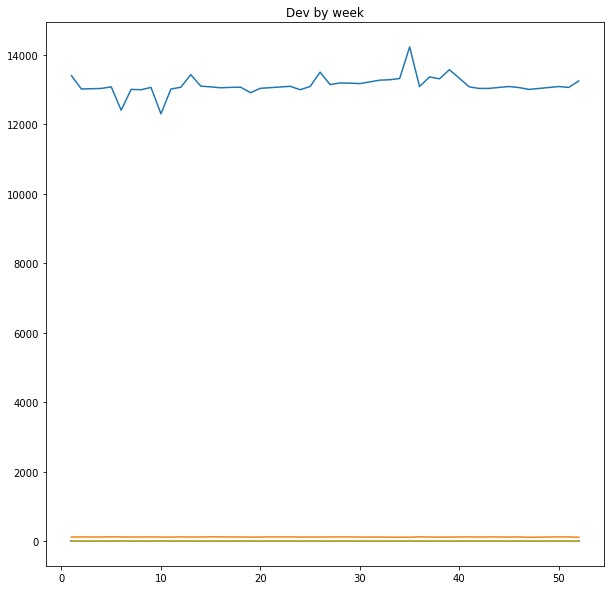

In [226]:
plt.figure(figsize=(10,10))
plt.plot(week_deviations)
plt.title('Dev by week')

There is an anamoly of data found around 45th week. that we are going to take care of further in outlier treatment

### 4. Feature-Engineering

In [227]:
final_dataset_volume.head()

PRODUCT_ID  Vendor  Theme_ID Theme_Name    year  month  week  \
0          24  Others       8.0   low carb  2019.0    1.0     2   
1          26  Others       8.0   low carb  2017.0   12.0    50   
2          26  Others       8.0   low carb  2018.0    2.0     8   
3          26  Others       8.0   low carb  2018.0    4.0    15   
4          26  Others       8.0   low carb  2019.0    2.0     5   

   sales_dollars_value  sales_units_value  sales_lbs_value  total_post  \
0             2.833213           0.000000         0.693147    0.001213   
1             4.969813           2.302585         3.044522    0.000837   
2             4.897840           2.302585         2.944439    0.001104   
3             4.736198           2.302585         2.944439    0.000980   
4             2.833213           0.000000         0.693147    0.001514   

   searchVolume  
0     27.599324  
1      8.746073  
2     28.222571  
3     27.354277  
4     27.532391

#### Step-1:- Let's drop all the irrelevant features which do not help us in either EDA or the modeling part

In [228]:
dataset = final_dataset_volume

In [229]:
dataset = dataset.drop(['Theme_ID'],axis=1)

In [230]:
dataset.head()

PRODUCT_ID  Vendor Theme_Name    year  month  week  sales_dollars_value  \
0          24  Others   low carb  2019.0    1.0     2             2.833213   
1          26  Others   low carb  2017.0   12.0    50             4.969813   
2          26  Others   low carb  2018.0    2.0     8             4.897840   
3          26  Others   low carb  2018.0    4.0    15             4.736198   
4          26  Others   low carb  2019.0    2.0     5             2.833213   

   sales_units_value  sales_lbs_value  total_post  searchVolume  
0           0.000000         0.693147    0.001213     27.599324  
1           2.302585         3.044522    0.000837      8.746073  
2           2.302585         2.944439    0.001104     28.222571  
3           2.302585         2.944439    0.000980     27.354277  
4           0.000000         0.693147    0.001514     27.532391

In [231]:
dataset.rename(columns={'sales_dollars_value':'Average_sales_dollars','sales_units_value':'Average_sales_units','sales_lbs_value':'Average_sales_lbs','total_post':'Average_post_week','searchVolume':'Average_searchVolume'},inplace=True)

In [232]:
dataset.head()

PRODUCT_ID  Vendor Theme_Name    year  month  week  Average_sales_dollars  \
0          24  Others   low carb  2019.0    1.0     2               2.833213   
1          26  Others   low carb  2017.0   12.0    50               4.969813   
2          26  Others   low carb  2018.0    2.0     8               4.897840   
3          26  Others   low carb  2018.0    4.0    15               4.736198   
4          26  Others   low carb  2019.0    2.0     5               2.833213   

   Average_sales_units  Average_sales_lbs  Average_post_week  \
0             0.000000           0.693147           0.001213   
1             2.302585           3.044522           0.000837   
2             2.302585           2.944439           0.001104   
3             2.302585           2.944439           0.000980   
4             0.000000           0.693147           0.001514   

   Average_searchVolume  
0             27.599324  
1              8.746073  
2             28.222571  
3             27.354277  
4             27.532391

In [233]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209080 entries, 0 to 2209079
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PRODUCT_ID             int64  
 1   Vendor                 object 
 2   Theme_Name             object 
 3   year                   float64
 4   month                  float64
 5   week                   UInt32 
 6   Average_sales_dollars  float64
 7   Average_sales_units    float64
 8   Average_sales_lbs      float64
 9   Average_post_week      float64
 10  Average_searchVolume   float64
dtypes: UInt32(1), float64(7), int64(1), object(2)
memory usage: 179.1+ MB


#### Step2: Dealing with Outliers

Linear Regression model is sensitive to outliers, let's find it

<AxesSubplot:>

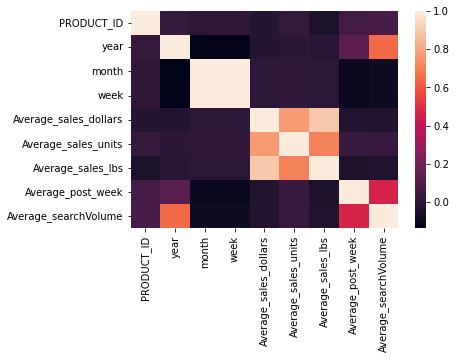

In [234]:
sns.heatmap(dataset.corr())

In [235]:
dataset.corr()['Average_sales_units'].sort_values()

year                    -0.007421
week                     0.000510
month                    0.000691
PRODUCT_ID               0.021094
Average_searchVolume     0.027140
Average_post_week        0.032364
Average_sales_lbs        0.698111
Average_sales_dollars    0.764973
Average_sales_units      1.000000
Name: Average_sales_units, dtype: float64

In [236]:
dataset['Average_sales_units'].describe()

count    2.209080e+06
mean     5.698298e+00
std      1.947102e+00
min      0.000000e+00
25%      4.430817e+00
50%      5.793014e+00
75%      7.058758e+00
max      1.265975e+01
Name: Average_sales_units, dtype: float64

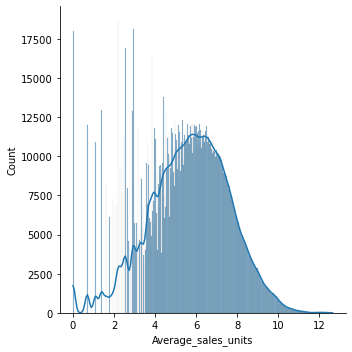

In [237]:
sns.displot(data = dataset,x ="Average_sales_units",kde = True,bins=500)

<AxesSubplot:>

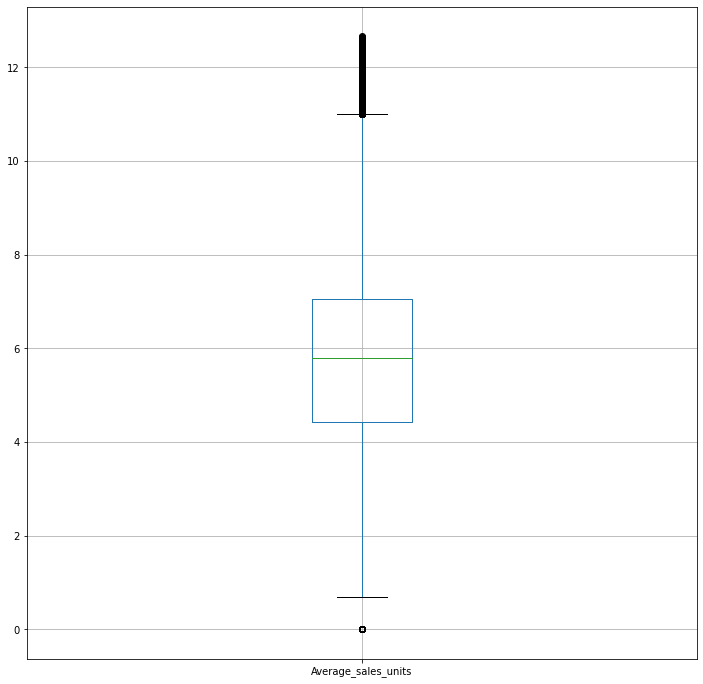

In [238]:
plt.figure(figsize=(12,12))
dataset.boxplot(column="Average_sales_units")

##### It seems there are lot of outliers in the data since our mean value is around 5.698, while std is 1.97, minimum value is 0 and maximum value is 12.6

##### Our data is right skewed,  A "skewed right" distribution is one in which the tail is on the right side.!!!

2.1 First remove the outliers wrt certain independent features

<AxesSubplot:xlabel='Average_sales_dollars', ylabel='Average_sales_units'>

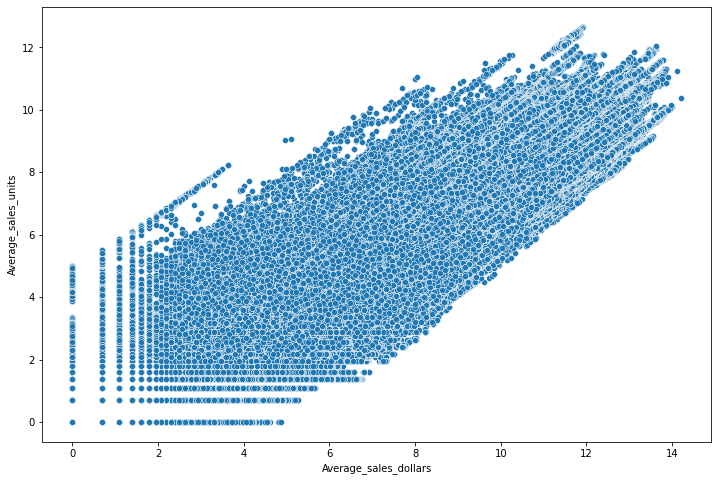

In [239]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_sales_dollars',y='Average_sales_units',data=dataset)

##### It is quite difficult to observe the outliers for these many points(22 lakhs roughly), let's reduce our dataset for top 3 themes, that too for our client Manufacturer A. Also, after data pre-processing, this scatter-plot is showing clear relationship between Average_sales_dollars and Average_sales_units.

In [240]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209080 entries, 0 to 2209079
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PRODUCT_ID             int64  
 1   Vendor                 object 
 2   Theme_Name             object 
 3   year                   float64
 4   month                  float64
 5   week                   UInt32 
 6   Average_sales_dollars  float64
 7   Average_sales_units    float64
 8   Average_sales_lbs      float64
 9   Average_post_week      float64
 10  Average_searchVolume   float64
dtypes: UInt32(1), float64(7), int64(1), object(2)
memory usage: 179.1+ MB


In [241]:
dataset.head()

PRODUCT_ID  Vendor Theme_Name    year  month  week  Average_sales_dollars  \
0          24  Others   low carb  2019.0    1.0     2               2.833213   
1          26  Others   low carb  2017.0   12.0    50               4.969813   
2          26  Others   low carb  2018.0    2.0     8               4.897840   
3          26  Others   low carb  2018.0    4.0    15               4.736198   
4          26  Others   low carb  2019.0    2.0     5               2.833213   

   Average_sales_units  Average_sales_lbs  Average_post_week  \
0             0.000000           0.693147           0.001213   
1             2.302585           3.044522           0.000837   
2             2.302585           2.944439           0.001104   
3             2.302585           2.944439           0.000980   
4             0.000000           0.693147           0.001514   

   Average_searchVolume  
0             27.599324  
1              8.746073  
2             28.222571  
3             27.354277  
4             27.532391

In [242]:
dataset_top_themes = dataset

In [243]:
dataset_top_themes

PRODUCT_ID  Vendor Theme_Name    year  month  week  \
0                24  Others   low carb  2019.0    1.0     2   
1                26  Others   low carb  2017.0   12.0    50   
2                26  Others   low carb  2018.0    2.0     8   
3                26  Others   low carb  2018.0    4.0    15   
4                26  Others   low carb  2019.0    2.0     5   
...             ...     ...        ...     ...    ...   ...   
2209075       57317  Others   low carb  2019.0    8.0    34   
2209076       57317  Others   low carb  2019.0    8.0    35   
2209077       57317  Others   low carb  2019.0    9.0    37   
2209078       57317  Others   low carb  2019.0    9.0    38   
2209079       57317  Others   low carb  2019.0    9.0    39   

         Average_sales_dollars  Average_sales_units  Average_sales_lbs  \
0                     2.833213             0.000000           0.693147   
1                     4.969813             2.302585           3.044522   
2                     4.897840             2.302585           2.944439   
3                     4.736198             2.302585           2.944439   
4                     2.833213             0.000000           0.693147   
...                        ...                  ...                ...   
2209075               6.403574             5.407172           4.418841   
2209076               7.472501             6.448889           5.468060   
2209077               7.206377             6.190315           5.209486   
2209078               6.943122             5.902633           4.919981   
2209079               7.273786             6.240276           5.262690   

         Average_post_week  Average_searchVolume  
0                 0.001213             27.599324  
1                 0.000837              8.746073  
2                 0.001104             28.222571  
3                 0.000980             27.354277  
4                 0.001514             27.532391  
...                    ...                   ...  
2209075           0.000560             26.240462  
2209076           0.000514             26.457075  
2209077           0.000586             25.674463  
2209078           0.000492             26.102483  
2209079           0.000565             25.958857  

[2209080 rows x 11 columns]

In [244]:
dataset_top_themes = dataset_top_themes.drop(['week','month','PRODUCT_ID'],axis=1)

In [245]:
dataset_top_themes

Vendor Theme_Name    year  Average_sales_dollars  \
0        Others   low carb  2019.0               2.833213   
1        Others   low carb  2017.0               4.969813   
2        Others   low carb  2018.0               4.897840   
3        Others   low carb  2018.0               4.736198   
4        Others   low carb  2019.0               2.833213   
...         ...        ...     ...                    ...   
2209075  Others   low carb  2019.0               6.403574   
2209076  Others   low carb  2019.0               7.472501   
2209077  Others   low carb  2019.0               7.206377   
2209078  Others   low carb  2019.0               6.943122   
2209079  Others   low carb  2019.0               7.273786   

         Average_sales_units  Average_sales_lbs  Average_post_week  \
0                   0.000000           0.693147           0.001213   
1                   2.302585           3.044522           0.000837   
2                   2.302585           2.944439           0.001104   
3                   2.302585           2.944439           0.000980   
4                   0.000000           0.693147           0.001514   
...                      ...                ...                ...   
2209075             5.407172           4.418841           0.000560   
2209076             6.448889           5.468060           0.000514   
2209077             6.190315           5.209486           0.000586   
2209078             5.902633           4.919981           0.000492   
2209079             6.240276           5.262690           0.000565   

         Average_searchVolume  
0                   27.599324  
1                    8.746073  
2                   28.222571  
3                   27.354277  
4                   27.532391  
...                       ...  
2209075             26.240462  
2209076             26.457075  
2209077             25.674463  
2209078             26.102483  
2209079             25.958857  

[2209080 rows x 8 columns]

In [246]:
dataset_top_themes = dataset_top_themes.groupby(['year','Theme_Name','Vendor']).sum()

In [247]:
dataset_top_themes = dataset_top_themes.reset_index()

In [248]:
dataset_top_themes = dataset_top_themes.sort_values('Average_sales_units',ascending = False)

In [249]:
dataset_top_themes

year       Theme_Name         Vendor  Average_sales_dollars  \
243  2018.0         low carb         Others           2.035554e+06   
143  2017.0         low carb         Others           1.693599e+06   
346  2019.0         low carb         Others           1.596236e+06   
52   2016.0         low carb         Others           1.380618e+06   
244  2018.0         low carb  Private Label           3.223463e+05   
..      ...              ...            ...                    ...   
175  2017.0         sea salt         Others           1.581772e+01   
71   2016.0          poultry              B           9.145588e+00   
20   2016.0             crab  Private Label           4.969813e+00   
183  2017.0             tuna              A           4.584967e+00   
32   2016.0  ethnic & exotic  Private Label           0.000000e+00   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
243         1.492907e+06       1.527987e+06         338.990430   
143         1.237046e+06       1.268587e+06         202.681182   
346         1.184611e+06       1.208492e+06         215.490416   
52          1.011092e+06       1.039687e+06         124.684578   
244         2.593516e+05       2.763195e+05          52.508594   
..                   ...                ...                ...   
175         7.297091e+00       1.147585e+01           0.000089   
71          6.054439e+00       7.153052e+00           0.000003   
20          4.969813e+00       4.653960e+00           0.000017   
183         3.178054e+00       2.708050e+00           0.000022   
32          0.000000e+00       0.000000e+00           0.002237   

     Average_searchVolume  
243          7.417015e+06  
143          1.920014e+06  
346          5.698036e+06  
52           1.594380e+06  
244          1.156133e+06  
..                    ...  
175          6.639876e+00  
71           4.653960e+00  
20           1.316682e+01  
183          5.856472e+00  
32           2.750449e+01  

[388 rows x 8 columns]

In [250]:
dataset_top_themes[dataset_top_themes['Vendor'] == 'A']

year      Theme_Name Vendor  Average_sales_dollars  \
238  2018.0        low carb      A          313020.454420   
341  2019.0        low carb      A          257977.264033   
138  2017.0        low carb      A          252042.210238   
47   2016.0        low carb      A          195367.324709   
266  2018.0          salmon      A           37481.291103   
..      ...             ...    ...                    ...   
280  2018.0      vegetarian      A             175.515898   
284  2019.0  beef hamburger      A             184.735220   
70   2016.0         poultry      A              61.111747   
326  2019.0     gingerbread      A              42.074370   
183  2017.0            tuna      A               4.584967   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
238        249605.777289      252523.570882          46.804462   
341        204598.729927      207638.584326          31.620320   
138        201408.657946      202810.223603          27.260006   
47         157823.896237      158396.113261          16.114284   
266         30384.041710       32623.082105           3.538818   
..                   ...                ...                ...   
280            93.177252         132.962122           0.016288   
284            88.020440          88.020440           0.002580   
70             39.723508          55.139505           0.000024   
326            27.339368          38.046749           0.001498   
183             3.178054           2.708050           0.000022   

     Average_searchVolume  
238          1.026577e+06  
341          8.377158e+05  
138          2.581405e+05  
47           2.058066e+05  
266          4.739026e+04  
..                    ...  
280          2.439033e+02  
284          3.063645e+02  
70           3.257772e+01  
326          1.856786e+01  
183          5.856472e+00  

[65 rows x 8 columns]

In [251]:
dataset_top_themes[dataset_top_themes['Vendor'] == 'A'].head(20)

year                  Theme_Name Vendor  Average_sales_dollars  \
238  2018.0                    low carb      A          313020.454420   
341  2019.0                    low carb      A          257977.264033   
138  2017.0                    low carb      A          252042.210238   
47   2016.0                    low carb      A          195367.324709   
266  2018.0                      salmon      A           37481.291103   
370  2019.0                      salmon      A           33666.741489   
215  2018.0             ethnic & exotic      A           39748.556858   
189  2018.0                   blueberry      A           37401.413295   
155  2017.0  no additives/preservatives      A           30861.650003   
168  2017.0                      salmon      A           27035.064999   
286  2019.0                   blueberry      A           32089.309701   
255  2018.0  no additives/preservatives      A           27870.009106   
93   2017.0                   blueberry      A           29485.065033   
117  2017.0             ethnic & exotic      A           31788.453770   
313  2019.0             ethnic & exotic      A           31885.373673   
273  2018.0                   soy foods      A           24606.617219   
26   2016.0             ethnic & exotic      A           29070.095516   
74   2016.0                      salmon      A           23190.346771   
2    2016.0                   blueberry      A           23540.688333   
176  2017.0                   soy foods      A           20733.796706   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
238        249605.777289      252523.570882          46.804462   
341        204598.729927      207638.584326          31.620320   
138        201408.657946      202810.223603          27.260006   
47         157823.896237      158396.113261          16.114284   
266         30384.041710       32623.082105           3.538818   
370         27486.731270       28531.942114           1.853117   
215         24921.665086       36040.626622           3.920242   
189         24872.692258       33596.582353           0.653901   
155         22929.731560       25390.906197           0.195198   
168         21869.057867       23912.057542           1.234324   
286         21105.297292       28642.002977           0.445774   
255         20566.567301       22822.324603           0.131089   
93          20122.152630       26519.709391           0.461545   
117         19976.521324       28997.826062           4.221700   
313         19867.495420       28787.810917           4.144448   
273         18810.979277       23094.569677           0.077683   
26          18608.065857       26768.084245           2.359809   
74          18601.392853       20562.028693           0.502851   
2           16262.430746       21067.053098           0.394943   
176         16095.644114       19616.496319           0.056870   

     Average_searchVolume  
238          1.026577e+06  
341          8.377158e+05  
138          2.581405e+05  
47           2.058066e+05  
266          4.739026e+04  
370          4.460994e+04  
215          9.685126e+04  
189          6.743983e+04  
155          1.367396e+04  
168          1.837165e+04  
286          5.785255e+04  
255          1.263917e+04  
93           2.582044e+04  
117          3.351841e+04  
313          8.277358e+04  
273          4.494462e+04  
26           3.176860e+04  
74           1.566935e+04  
2            2.074497e+04  
176          1.340738e+04

##### We can clearly observe for our client Manufacturer A, top 5 themes based on per year sales value are:
    1. low carb
    2. salmon
    3. ethnic &exotic
    4. Blueberry
    5. No additives/ preservatives

We have to build model for top 3 theme only.Let's Simplify our dataset on these themes only

In [252]:
dataset.head()

PRODUCT_ID  Vendor Theme_Name    year  month  week  Average_sales_dollars  \
0          24  Others   low carb  2019.0    1.0     2               2.833213   
1          26  Others   low carb  2017.0   12.0    50               4.969813   
2          26  Others   low carb  2018.0    2.0     8               4.897840   
3          26  Others   low carb  2018.0    4.0    15               4.736198   
4          26  Others   low carb  2019.0    2.0     5               2.833213   

   Average_sales_units  Average_sales_lbs  Average_post_week  \
0             0.000000           0.693147           0.001213   
1             2.302585           3.044522           0.000837   
2             2.302585           2.944439           0.001104   
3             2.302585           2.944439           0.000980   
4             0.000000           0.693147           0.001514   

   Average_searchVolume  
0             27.599324  
1              8.746073  
2             28.222571  
3             27.354277  
4             27.532391

In [253]:
dataset.corr()['Average_sales_units'].sort_values()

year                    -0.007421
week                     0.000510
month                    0.000691
PRODUCT_ID               0.021094
Average_searchVolume     0.027140
Average_post_week        0.032364
Average_sales_lbs        0.698111
Average_sales_dollars    0.764973
Average_sales_units      1.000000
Name: Average_sales_units, dtype: float64

Let's drop product id too, it is not adding any impact on dependent variable

In [254]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209080 entries, 0 to 2209079
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PRODUCT_ID             int64  
 1   Vendor                 object 
 2   Theme_Name             object 
 3   year                   float64
 4   month                  float64
 5   week                   UInt32 
 6   Average_sales_dollars  float64
 7   Average_sales_units    float64
 8   Average_sales_lbs      float64
 9   Average_post_week      float64
 10  Average_searchVolume   float64
dtypes: UInt32(1), float64(7), int64(1), object(2)
memory usage: 179.1+ MB


In [255]:
type(dataset['Theme_Name'][0])

str

In [256]:
dataset.drop(['PRODUCT_ID'],axis=1,inplace=True)

In [257]:
top_themes_A = ['low carb','ethnic & exotic','salmon']

In [258]:
dataset['Theme_Name'].isin(top_themes_A)

0          True
1          True
2          True
3          True
4          True
           ... 
2209075    True
2209076    True
2209077    True
2209078    True
2209079    True
Name: Theme_Name, Length: 2209080, dtype: bool

In [259]:
dataset[dataset['Theme_Name'].isin(top_themes_A)]

Vendor Theme_Name    year  month  week  Average_sales_dollars  \
0        Others   low carb  2019.0    1.0     2               2.833213   
1        Others   low carb  2017.0   12.0    50               4.969813   
2        Others   low carb  2018.0    2.0     8               4.897840   
3        Others   low carb  2018.0    4.0    15               4.736198   
4        Others   low carb  2019.0    2.0     5               2.833213   
...         ...        ...     ...    ...   ...                    ...   
2209075  Others   low carb  2019.0    8.0    34               6.403574   
2209076  Others   low carb  2019.0    8.0    35               7.472501   
2209077  Others   low carb  2019.0    9.0    37               7.206377   
2209078  Others   low carb  2019.0    9.0    38               6.943122   
2209079  Others   low carb  2019.0    9.0    39               7.273786   

         Average_sales_units  Average_sales_lbs  Average_post_week  \
0                   0.000000           0.693147           0.001213   
1                   2.302585           3.044522           0.000837   
2                   2.302585           2.944439           0.001104   
3                   2.302585           2.944439           0.000980   
4                   0.000000           0.693147           0.001514   
...                      ...                ...                ...   
2209075             5.407172           4.418841           0.000560   
2209076             6.448889           5.468060           0.000514   
2209077             6.190315           5.209486           0.000586   
2209078             5.902633           4.919981           0.000492   
2209079             6.240276           5.262690           0.000565   

         Average_searchVolume  
0                   27.599324  
1                    8.746073  
2                   28.222571  
3                   27.354277  
4                   27.532391  
...                       ...  
2209075             26.240462  
2209076             26.457075  
2209077             25.674463  
2209078             26.102483  
2209079             25.958857  

[1486449 rows x 10 columns]

In [260]:
dataset_theme_A = dataset[dataset['Theme_Name'].isin(top_themes_A)]

In [261]:
dataset_theme_A['Theme_Name'].unique()

array(['low carb', 'salmon', 'ethnic & exotic'], dtype=object)

In [262]:
dataset_theme_A['Theme_Name'].value_counts()

low carb           1318495
ethnic & exotic     104858
salmon               63096
Name: Theme_Name, dtype: int64

Let's extract our client Manufacturer A data snippet only

In [263]:
dataset_theme_A = dataset_theme_A[dataset_theme_A['Vendor'] == 'A']

In [264]:
dataset_theme_A

Vendor Theme_Name    year  month  week  Average_sales_dollars  \
49926        A   low carb  2016.0    1.0     2               7.476472   
49927        A   low carb  2016.0    1.0     3               5.717028   
49928        A   low carb  2016.0    1.0     4               4.543295   
49929        A   low carb  2016.0    2.0     5               3.850148   
49930        A   low carb  2016.0    2.0     6               4.442651   
...        ...        ...     ...    ...   ...                    ...   
2207793      A   low carb  2019.0    8.0    34               7.558517   
2207794      A   low carb  2019.0    8.0    35               7.676474   
2207795      A   low carb  2019.0    9.0    37               7.591357   
2207796      A   low carb  2019.0    9.0    38               7.720462   
2207797      A   low carb  2019.0    9.0    39               7.864804   

         Average_sales_units  Average_sales_lbs  Average_post_week  \
49926               5.820083           4.653960           0.000613   
49927               3.828641           2.639057           0.000525   
49928               2.639057           1.609438           0.000769   
49929               2.197225           1.098612           0.000465   
49930               2.833213           1.609438           0.000799   
...                      ...                ...                ...   
2207793             4.595120           5.981414           0.000560   
2207794             4.691348           6.077642           0.000514   
2207795             4.744932           6.131226           0.000586   
2207796             4.867534           6.253829           0.000492   
2207797             5.030438           6.416732           0.000565   

         Average_searchVolume  
49926                8.803194  
49927                8.931505  
49928                8.801781  
49929                8.988571  
49930                9.079469  
...                       ...  
2207793             26.240462  
2207794             26.457075  
2207795             25.674463  
2207796             26.102483  
2207797             25.958857  

[151738 rows x 10 columns]

##### We have reduced the complexity of our dataset from 22 lakh rows to roughly 1Lakh 51 thousand rows. Now, we will continue with the further steps

#### Step2(dataset_theme_A): Dealing with Outliers

<AxesSubplot:>

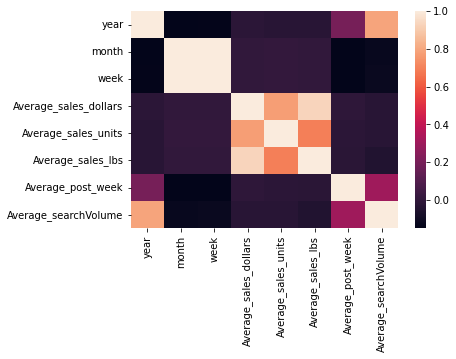

In [265]:
sns.heatmap(dataset_theme_A.corr())

In [266]:
dataset_theme_A.corr()['Average_sales_units'].sort_values()

Average_searchVolume    -0.028295
year                    -0.027031
Average_post_week       -0.020829
month                    0.002597
week                     0.002611
Average_sales_lbs        0.690087
Average_sales_dollars    0.773768
Average_sales_units      1.000000
Name: Average_sales_units, dtype: float64

##### Our dataset has been improved significantly, as the correlation indexes are making sense now

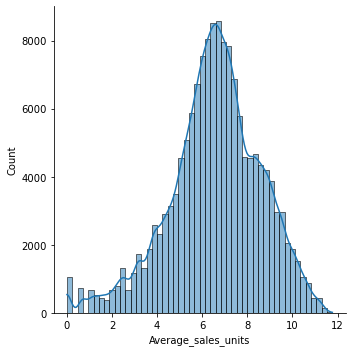

In [267]:
sns.displot(data = dataset_theme_A,x ="Average_sales_units",kde = True,bins=50)

##### Our dependent variable is now normally distributed and it contains some outliers

In [268]:
dataset_theme_A['Average_sales_units'].describe()

count    151738.000000
mean          6.558357
std           2.036840
min           0.000000
25%           5.433722
50%           6.635947
75%           7.895436
max          11.770440
Name: Average_sales_units, dtype: float64

Minimum value of our dataset is 0, mean is 6.55, std is 2.03 while maximum value is 11.77. This description also shows that our dataset contains some outliers

<AxesSubplot:>

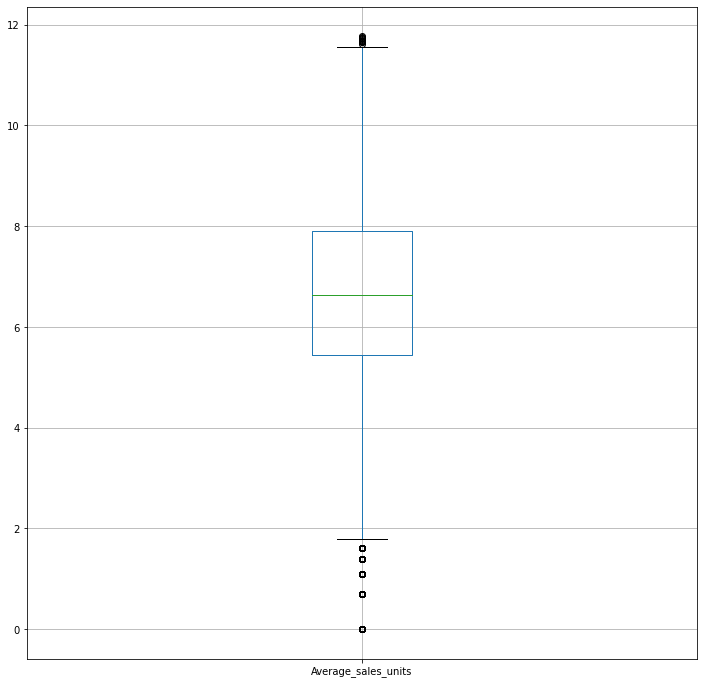

In [269]:
plt.figure(figsize=(12,12))
dataset_theme_A.boxplot(column="Average_sales_units")

2.1: First let's see the relationship with independent features

### ●	Estimate the impact on sales due to social trends, search trends, own price and competitor effects

<AxesSubplot:xlabel='Average_sales_dollars', ylabel='Average_sales_units'>

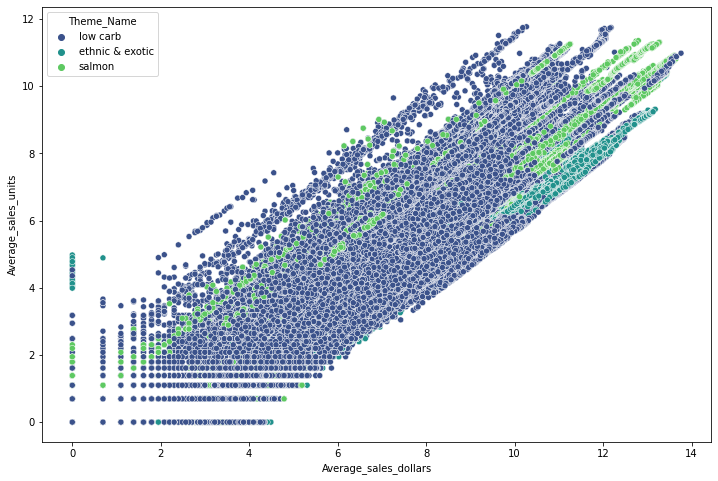

In [270]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_sales_dollars',y='Average_sales_units',data=dataset_theme_A,hue='Theme_Name',palette='viridis')

From this scatterplot, it does make sense for the outlier since sometimes average_sales_units is increasing even average_sales_dollars is not increasing. These can be the outliers.

<AxesSubplot:xlabel='Average_sales_lbs', ylabel='Average_sales_units'>

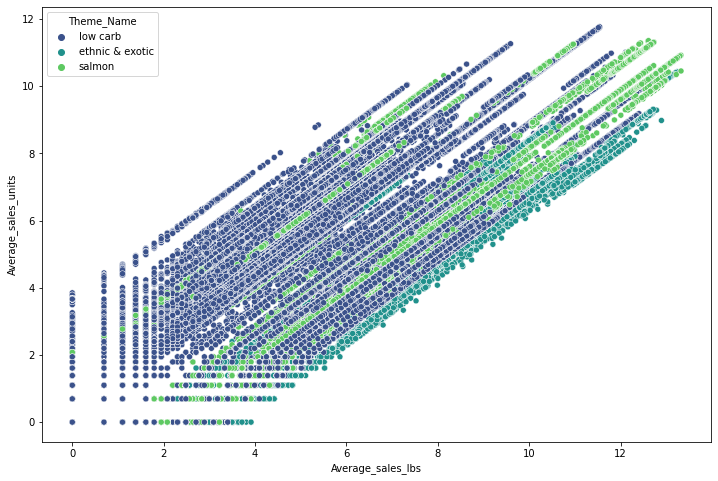

In [271]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_sales_lbs',y='Average_sales_units',data=dataset_theme_A,hue='Theme_Name',palette='viridis')

From this scatterplot, it doesn't make any sense for the outlier since sometimes average_sales_units is increasing even average_sales_lbs is not increasing. These can be the outliers.

<AxesSubplot:xlabel='Average_post_week', ylabel='Average_sales_units'>

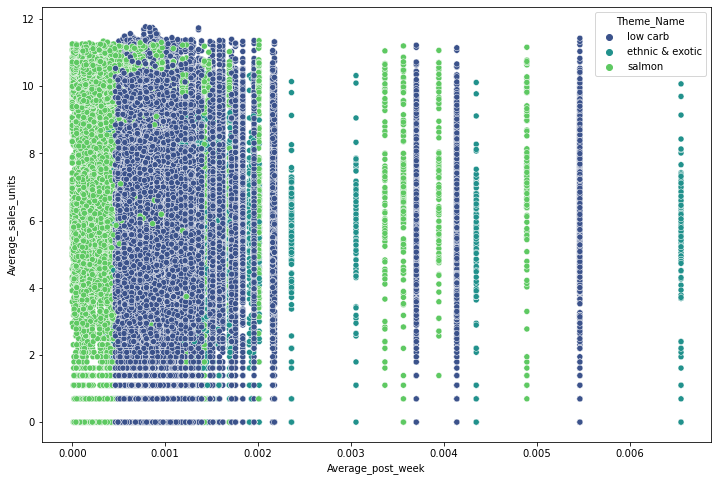

In [272]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_post_week',y='Average_sales_units',data=dataset_theme_A,hue='Theme_Name',palette='viridis')

For higher sales value, number of posts done in a month are less, which makes sense also because for product items having less sale, number of posts should be high. For theme salmon, it can be clearly visible number of posts is not creating any significant difference.

<AxesSubplot:xlabel='Average_searchVolume', ylabel='Average_sales_units'>

C:\Users\nishant.wadhwan\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


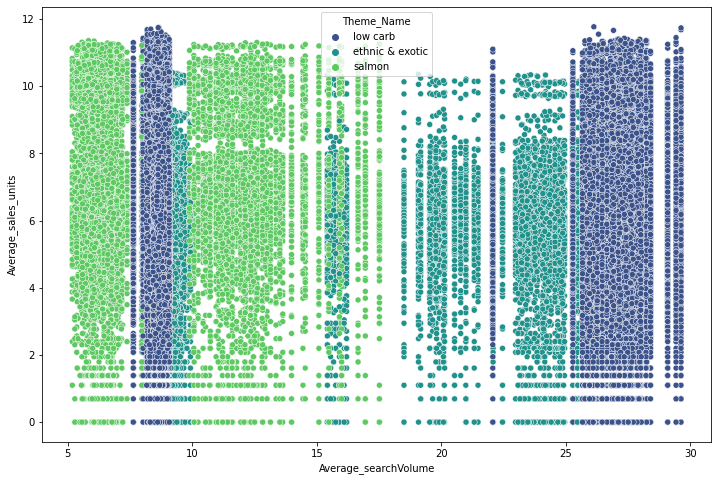

In [273]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_searchVolume',y='Average_sales_units',data=dataset_theme_A,hue='Theme_Name',palette='viridis')

This plot is quite contrary for salmon theme because if search volume is high, sales should be more that is happening for low carb and ethnic & exotic. For salmon, it's not creating any impact on sales. Sales will be higher for salmon irrespective of the search volume.

2.2: Now remove the outliers based on InterQuartileRange for Right Skewed Data

In [274]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=dataset_theme_A.Average_sales_units.quantile(0.75)-dataset_theme_A.Average_sales_units.quantile(0.25)

In [275]:
IQR

2.4617140033887255

In [276]:
lower_bridge=dataset_theme_A['Average_sales_units'].quantile(0.25)-(IQR*1.5)
upper_bridge=dataset_theme_A['Average_sales_units'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.7411509984711517
11.588007012026054


(None, None)

#### Extreme outliers


In [277]:
lower_bridge=dataset_theme_A['Average_sales_units'].quantile(0.25)-(IQR*3)
upper_bridge=dataset_theme_A['Average_sales_units'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-1.9514200066119365
15.280578017109143


(None, None)

In [278]:
dataset_theme_A_outlier = dataset_theme_A.copy()

##### Let's cap the lower outliers which have values less than 1.5 and cap the higher outliers which have values greater  than 11

In [279]:
dataset_theme_A_outlier[dataset_theme_A_outlier['Average_sales_units']>=11]

Vendor Theme_Name    year  month  week  Average_sales_dollars  \
60167       A   low carb  2016.0    3.0    11              10.804401   
60187       A   low carb  2016.0    9.0    36              10.808171   
60188       A   low carb  2016.0    9.0    37              10.821137   
60189       A   low carb  2016.0    9.0    38              10.829412   
60190       A   low carb  2016.0   10.0    41              10.806146   
...       ...        ...     ...    ...   ...                    ...   
445190      A     salmon  2017.0    2.0     8              11.116053   
445191      A     salmon  2017.0    3.0     9              11.076542   
445192      A     salmon  2017.0    3.0    11              11.055419   
445193      A     salmon  2017.0    3.0    12              11.073692   
445194      A     salmon  2017.0    4.0    14              11.044441   

        Average_sales_units  Average_sales_lbs  Average_post_week  \
60167             11.034874           9.360827           0.000696   
60187             11.031497           9.357380           0.000637   
60188             11.029780           9.355739           0.000787   
60189             11.035164           9.361171           0.000787   
60190             11.011043           9.337061           0.000817   
...                     ...                ...                ...   
445190            11.119720          10.832023           0.000456   
445191            11.080017          10.792325           0.000290   
445192            11.058701          10.771029           0.000405   
445193            11.076975          10.789298           0.000144   
445194            11.048124          10.760432           0.000114   

        Average_searchVolume  
60167               8.848527  
60187               9.050172  
60188               8.730300  
60189               8.843564  
60190               8.650601  
...                      ...  
445190              6.377877  
445191              5.948035  
445192              5.381271  
445193              5.991977  
445194              6.689599  

[722 rows x 10 columns]

In [280]:
dataset_theme_A_outlier[dataset_theme_A_outlier['Average_sales_units']<=1.7]

Vendor Theme_Name    year  month  week  Average_sales_dollars  \
51510        A   low carb  2018.0   11.0    46               2.484907   
51515        A   low carb  2019.0    1.0     2               2.890372   
51518        A   low carb  2019.0    2.0     7               2.772589   
51520        A   low carb  2019.0    3.0    11               1.609438   
51521        A   low carb  2019.0    3.0    12               2.833213   
...        ...        ...     ...    ...   ...                    ...   
1550526      A   low carb  2017.0    4.0    16               2.302585   
1550527      A   low carb  2017.0    8.0    34               2.302585   
1550528      A   low carb  2017.0    1.0     3               1.098612   
1550529      A   low carb  2016.0    2.0     6               1.791759   
2204107      A   low carb  2019.0    6.0    25               3.091042   

         Average_sales_units  Average_sales_lbs  Average_post_week  \
51510               1.098612           0.000000           0.001277   
51515               1.609438           0.000000           0.001213   
51518               1.098612           0.000000           0.001029   
51520               1.098612           0.000000           0.001068   
51521               1.386294           0.000000           0.000909   
...                      ...                ...                ...   
1550526             0.000000           0.000000           0.000977   
1550527             0.000000           0.000000           0.000893   
1550528             0.000000           0.000000           0.000786   
1550529             0.000000           1.609438           0.000799   
2204107             0.693147           1.609438           0.000557   

         Average_searchVolume  
51510               25.956424  
51515               27.599324  
51518               27.664600  
51520               27.097699  
51521               26.809824  
...                       ...  
1550526              8.494078  
1550527              8.611309  
1550528              8.312023  
1550529              9.079469  
2204107             25.287109  

[3449 rows x 10 columns]

In [281]:
dataset_theme_A_outlier.loc[dataset_theme_A_outlier['Average_sales_units']>=11,'Average_sales_units']=11

In [282]:
dataset_theme_A_outlier.loc[dataset_theme_A_outlier['Average_sales_units']<=1.7,'Average_sales_units']=1.7

In [283]:
dataset_theme_A_outlier.describe()

year          month           week  Average_sales_dollars  \
count  151738.000000  151738.000000  151738.000000          151738.000000   
mean     2017.625717       6.113281      24.781386               8.384671   
std         1.065206       3.213142      14.155373               2.087882   
min      2016.000000       1.000000       1.000000               0.000000   
25%      2017.000000       3.000000      13.000000               7.244942   
50%      2018.000000       6.000000      25.000000               8.721032   
75%      2019.000000       9.000000      36.000000               9.712145   
max      2019.000000      12.000000      52.000000              13.760289   

       Average_sales_units  Average_sales_lbs  Average_post_week  \
count        151738.000000      151738.000000      151738.000000   
mean              6.578300           6.903953           0.000946   
std               1.977412           2.356775           0.000651   
min               1.700000           0.000000           0.000000   
25%               5.433722           5.451038           0.000654   
50%               6.635947           7.113956           0.000811   
75%               7.895436           8.415160           0.001055   
max              11.000000          13.322281           0.006551   

       Average_searchVolume  
count         151738.000000  
mean              17.788511  
std                9.067082  
min                5.181784  
25%                8.664616  
50%               19.537748  
75%               27.017352  
max               29.630177

In [284]:
dataset_theme_A_outlier['Average_sales_units'].describe()

count    151738.000000
mean          6.578300
std           1.977412
min           1.700000
25%           5.433722
50%           6.635947
75%           7.895436
max          11.000000
Name: Average_sales_units, dtype: float64

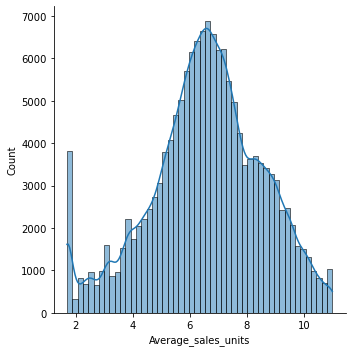

In [285]:
sns.displot(data = dataset_theme_A_outlier,x ="Average_sales_units",kde = True,bins=50)

<AxesSubplot:>

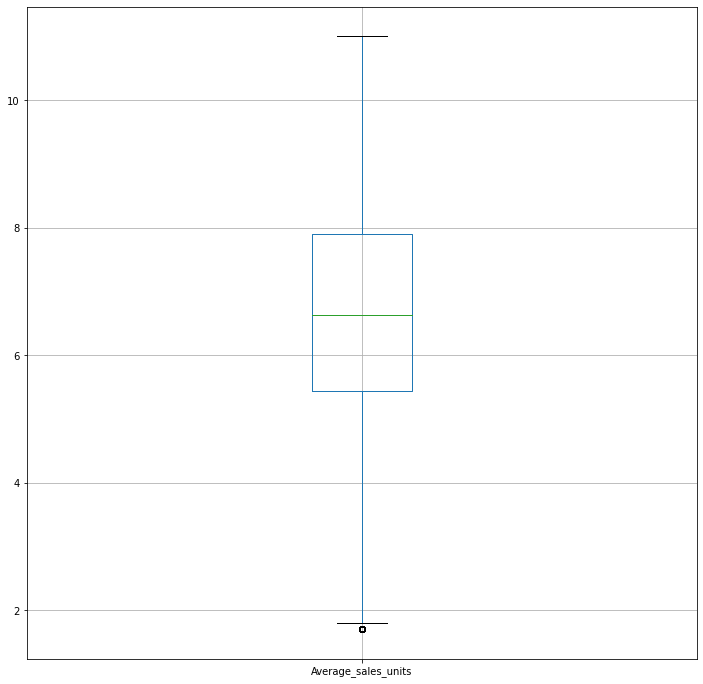

In [286]:
plt.figure(figsize=(12,12))
dataset_theme_A_outlier.boxplot(column="Average_sales_units")

Now our dataset has been improved significantly

Let's check scatter plots again

In [287]:
dataset_theme_A_outlier.corr()['Average_sales_units'].sort_values()

Average_searchVolume    -0.029889
year                    -0.027868
Average_post_week       -0.021529
month                    0.002059
week                     0.002087
Average_sales_lbs        0.688702
Average_sales_dollars    0.767722
Average_sales_units      1.000000
Name: Average_sales_units, dtype: float64

<AxesSubplot:xlabel='Average_sales_dollars', ylabel='Average_sales_units'>

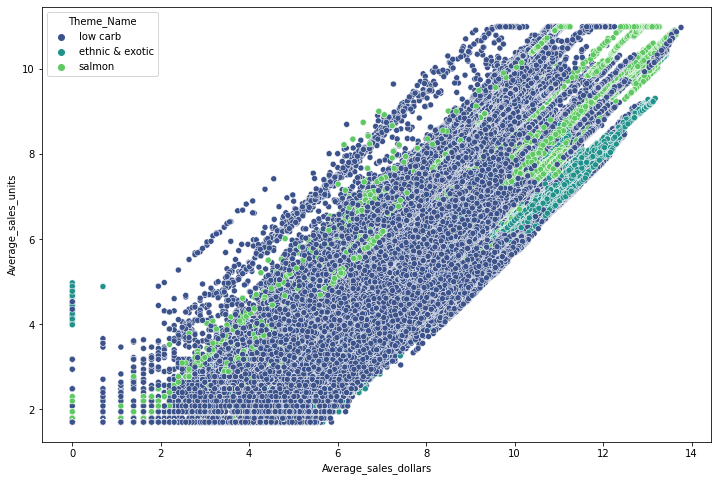

In [288]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_sales_dollars',y='Average_sales_units',data=dataset_theme_A_outlier,hue='Theme_Name',palette='viridis')

<AxesSubplot:xlabel='Average_sales_lbs', ylabel='Average_sales_units'>

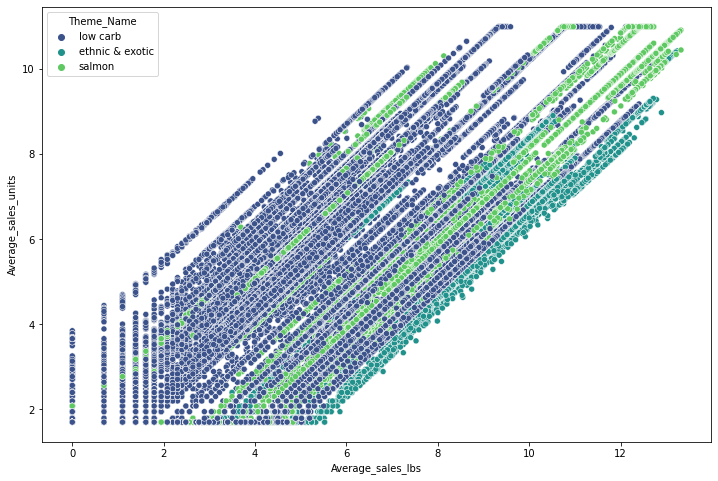

In [289]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_sales_lbs',y='Average_sales_units',data=dataset_theme_A_outlier,hue='Theme_Name',palette='viridis')

<AxesSubplot:xlabel='Average_post_week', ylabel='Average_sales_units'>

C:\Users\nishant.wadhwan\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


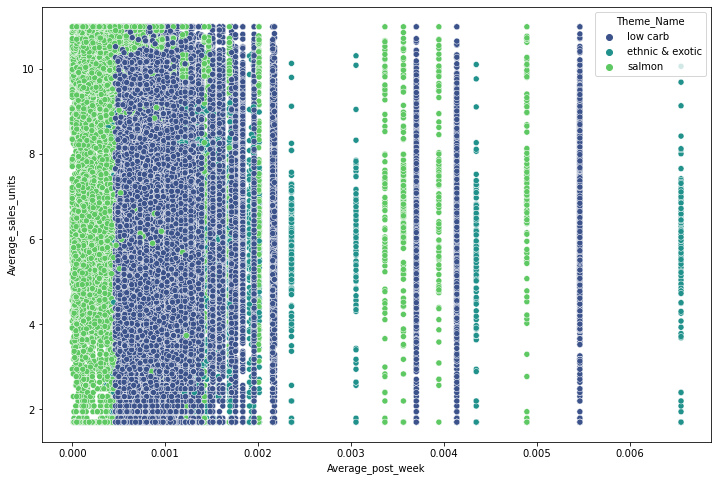

In [290]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_post_week',y='Average_sales_units',data=dataset_theme_A_outlier,hue='Theme_Name',palette='viridis')

<AxesSubplot:xlabel='Average_searchVolume', ylabel='Average_sales_units'>

C:\Users\nishant.wadhwan\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


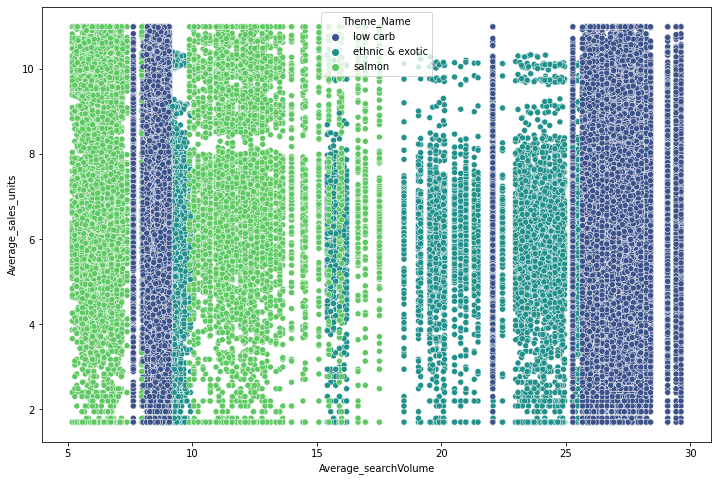

In [291]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Average_searchVolume',y='Average_sales_units',data=dataset_theme_A_outlier,hue='Theme_Name',palette='viridis')

It's making sense now since higher will be the search volume, higher will be the number of users to buy the product. It can be seen with search volume 15 low carb data-points are less as compared to search volume 25.

#### Step3:Dealing with missing data

In [292]:
dataset_theme_A_outlier

Vendor Theme_Name    year  month  week  Average_sales_dollars  \
49926        A   low carb  2016.0    1.0     2               7.476472   
49927        A   low carb  2016.0    1.0     3               5.717028   
49928        A   low carb  2016.0    1.0     4               4.543295   
49929        A   low carb  2016.0    2.0     5               3.850148   
49930        A   low carb  2016.0    2.0     6               4.442651   
...        ...        ...     ...    ...   ...                    ...   
2207793      A   low carb  2019.0    8.0    34               7.558517   
2207794      A   low carb  2019.0    8.0    35               7.676474   
2207795      A   low carb  2019.0    9.0    37               7.591357   
2207796      A   low carb  2019.0    9.0    38               7.720462   
2207797      A   low carb  2019.0    9.0    39               7.864804   

         Average_sales_units  Average_sales_lbs  Average_post_week  \
49926               5.820083           4.653960           0.000613   
49927               3.828641           2.639057           0.000525   
49928               2.639057           1.609438           0.000769   
49929               2.197225           1.098612           0.000465   
49930               2.833213           1.609438           0.000799   
...                      ...                ...                ...   
2207793             4.595120           5.981414           0.000560   
2207794             4.691348           6.077642           0.000514   
2207795             4.744932           6.131226           0.000586   
2207796             4.867534           6.253829           0.000492   
2207797             5.030438           6.416732           0.000565   

         Average_searchVolume  
49926                8.803194  
49927                8.931505  
49928                8.801781  
49929                8.988571  
49930                9.079469  
...                       ...  
2207793             26.240462  
2207794             26.457075  
2207795             25.674463  
2207796             26.102483  
2207797             25.958857  

[151738 rows x 10 columns]

In [293]:
dataset_theme_A_outlier.isnull()

Vendor  Theme_Name   year  month   week  Average_sales_dollars  \
49926     False       False  False  False  False                  False   
49927     False       False  False  False  False                  False   
49928     False       False  False  False  False                  False   
49929     False       False  False  False  False                  False   
49930     False       False  False  False  False                  False   
...         ...         ...    ...    ...    ...                    ...   
2207793   False       False  False  False  False                  False   
2207794   False       False  False  False  False                  False   
2207795   False       False  False  False  False                  False   
2207796   False       False  False  False  False                  False   
2207797   False       False  False  False  False                  False   

         Average_sales_units  Average_sales_lbs  Average_post_week  \
49926                  False              False              False   
49927                  False              False              False   
49928                  False              False              False   
49929                  False              False              False   
49930                  False              False              False   
...                      ...                ...                ...   
2207793                False              False              False   
2207794                False              False              False   
2207795                False              False              False   
2207796                False              False              False   
2207797                False              False              False   

         Average_searchVolume  
49926                   False  
49927                   False  
49928                   False  
49929                   False  
49930                   False  
...                       ...  
2207793                 False  
2207794                 False  
2207795                 False  
2207796                 False  
2207797                 False  

[151738 rows x 10 columns]

In [294]:
dataset_theme_A_outlier.isnull().sum()

Vendor                   0
Theme_Name               0
year                     0
month                    0
week                     0
Average_sales_dollars    0
Average_sales_units      0
Average_sales_lbs        0
Average_post_week        0
Average_searchVolume     0
dtype: int64

We don't have any missing data here, since during merging, we have accounted for the NaN values

#### Step4:Dealing with Categorical Data

Many machine learning models can not deal with categorical data set as strings. For example linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.



Numerical Column to Categorical

We need to be careful when it comes to encoding categories as numbers. We want to make sure that the numerical relationship makes sense for a model.


##### Creating Dummy Variables from Object Columns

In [295]:
dataset_theme_A_outlier.head()

Vendor Theme_Name    year  month  week  Average_sales_dollars  \
49926      A   low carb  2016.0    1.0     2               7.476472   
49927      A   low carb  2016.0    1.0     3               5.717028   
49928      A   low carb  2016.0    1.0     4               4.543295   
49929      A   low carb  2016.0    2.0     5               3.850148   
49930      A   low carb  2016.0    2.0     6               4.442651   

       Average_sales_units  Average_sales_lbs  Average_post_week  \
49926             5.820083           4.653960           0.000613   
49927             3.828641           2.639057           0.000525   
49928             2.639057           1.609438           0.000769   
49929             2.197225           1.098612           0.000465   
49930             2.833213           1.609438           0.000799   

       Average_searchVolume  
49926              8.803194  
49927              8.931505  
49928              8.801781  
49929              8.988571  
49930              9.079469

We can drop Vendor as it will be Manufacturer A only. And we will convert Theme_Name into dummy variables for a machine learning model to work 

In [296]:
dataset_theme_A_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151738 entries, 49926 to 2207797
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 151738 non-null  object 
 1   Theme_Name             151738 non-null  object 
 2   year                   151738 non-null  float64
 3   month                  151738 non-null  float64
 4   week                   151738 non-null  UInt32 
 5   Average_sales_dollars  151738 non-null  float64
 6   Average_sales_units    151738 non-null  float64
 7   Average_sales_lbs      151738 non-null  float64
 8   Average_post_week      151738 non-null  float64
 9   Average_searchVolume   151738 non-null  float64
dtypes: UInt32(1), float64(7), object(2)
memory usage: 16.3+ MB


In [297]:
dataset_theme_A_outlier = dataset_theme_A_outlier.drop('Vendor',axis=1)

In [298]:
dataset_theme_A_outlier.head()

Theme_Name    year  month  week  Average_sales_dollars  \
49926   low carb  2016.0    1.0     2               7.476472   
49927   low carb  2016.0    1.0     3               5.717028   
49928   low carb  2016.0    1.0     4               4.543295   
49929   low carb  2016.0    2.0     5               3.850148   
49930   low carb  2016.0    2.0     6               4.442651   

       Average_sales_units  Average_sales_lbs  Average_post_week  \
49926             5.820083           4.653960           0.000613   
49927             3.828641           2.639057           0.000525   
49928             2.639057           1.609438           0.000769   
49929             2.197225           1.098612           0.000465   
49930             2.833213           1.609438           0.000799   

       Average_searchVolume  
49926              8.803194  
49927              8.931505  
49928              8.801781  
49929              8.988571  
49930              9.079469

In [299]:
dataset_theme_A_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151738 entries, 49926 to 2207797
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Theme_Name             151738 non-null  object 
 1   year                   151738 non-null  float64
 2   month                  151738 non-null  float64
 3   week                   151738 non-null  UInt32 
 4   Average_sales_dollars  151738 non-null  float64
 5   Average_sales_units    151738 non-null  float64
 6   Average_sales_lbs      151738 non-null  float64
 7   Average_post_week      151738 non-null  float64
 8   Average_searchVolume   151738 non-null  float64
dtypes: UInt32(1), float64(7), object(1)
memory usage: 15.2+ MB


In [300]:
dataset_theme_A_outlier.corr()['Average_sales_units'].sort_values()

Average_searchVolume    -0.029889
year                    -0.027868
Average_post_week       -0.021529
month                    0.002059
week                     0.002087
Average_sales_lbs        0.688702
Average_sales_dollars    0.767722
Average_sales_units      1.000000
Name: Average_sales_units, dtype: float64

In [301]:
dataset_theme_A_outlier.select_dtypes(include='object')

Theme_Name
49926     low carb
49927     low carb
49928     low carb
49929     low carb
49930     low carb
...            ...
2207793   low carb
2207794   low carb
2207795   low carb
2207796   low carb
2207797   low carb

[151738 rows x 1 columns]

In [302]:
dataset_nums = dataset_theme_A_outlier.select_dtypes(exclude='object')
dataset_objs = dataset_theme_A_outlier.select_dtypes(include='object')

In [303]:
dataset_objs.head()

Theme_Name
49926   low carb
49927   low carb
49928   low carb
49929   low carb
49930   low carb

In [304]:
dataset_objs = pd.get_dummies(dataset_objs,drop_first=True)

In [305]:
dataset_theme_A_outlier = pd.concat([dataset_nums,dataset_objs],axis=1)

In [306]:
dataset_theme_A_outlier

year  month  week  Average_sales_dollars  Average_sales_units  \
49926    2016.0    1.0     2               7.476472             5.820083   
49927    2016.0    1.0     3               5.717028             3.828641   
49928    2016.0    1.0     4               4.543295             2.639057   
49929    2016.0    2.0     5               3.850148             2.197225   
49930    2016.0    2.0     6               4.442651             2.833213   
...         ...    ...   ...                    ...                  ...   
2207793  2019.0    8.0    34               7.558517             4.595120   
2207794  2019.0    8.0    35               7.676474             4.691348   
2207795  2019.0    9.0    37               7.591357             4.744932   
2207796  2019.0    9.0    38               7.720462             4.867534   
2207797  2019.0    9.0    39               7.864804             5.030438   

         Average_sales_lbs  Average_post_week  Average_searchVolume  \
49926             4.653960           0.000613              8.803194   
49927             2.639057           0.000525              8.931505   
49928             1.609438           0.000769              8.801781   
49929             1.098612           0.000465              8.988571   
49930             1.609438           0.000799              9.079469   
...                    ...                ...                   ...   
2207793           5.981414           0.000560             26.240462   
2207794           6.077642           0.000514             26.457075   
2207795           6.131226           0.000586             25.674463   
2207796           6.253829           0.000492             26.102483   
2207797           6.416732           0.000565             25.958857   

         Theme_Name_low carb  Theme_Name_salmon  
49926                      1                  0  
49927                      1                  0  
49928                      1                  0  
49929                      1                  0  
49930                      1                  0  
...                      ...                ...  
2207793                    1                  0  
2207794                    1                  0  
2207795                    1                  0  
2207796                    1                  0  
2207797                    1                  0  

[151738 rows x 10 columns]

In [307]:
dataset_theme_A_outlier.corr()['Average_sales_units'].sort_values()

Average_searchVolume    -0.029889
year                    -0.027868
Average_post_week       -0.021529
month                    0.002059
week                     0.002087
Theme_Name_low carb      0.067989
Theme_Name_salmon        0.074164
Average_sales_lbs        0.688702
Average_sales_dollars    0.767722
Average_sales_units      1.000000
Name: Average_sales_units, dtype: float64

### 5. Exploratory Data Analysis

##### 5.1:Understand the overall market share of our client

In [308]:
dataset.head()

Vendor Theme_Name    year  month  week  Average_sales_dollars  \
0  Others   low carb  2019.0    1.0     2               2.833213   
1  Others   low carb  2017.0   12.0    50               4.969813   
2  Others   low carb  2018.0    2.0     8               4.897840   
3  Others   low carb  2018.0    4.0    15               4.736198   
4  Others   low carb  2019.0    2.0     5               2.833213   

   Average_sales_units  Average_sales_lbs  Average_post_week  \
0             0.000000           0.693147           0.001213   
1             2.302585           3.044522           0.000837   
2             2.302585           2.944439           0.001104   
3             2.302585           2.944439           0.000980   
4             0.000000           0.693147           0.001514   

   Average_searchVolume  
0             27.599324  
1              8.746073  
2             28.222571  
3             27.354277  
4             27.532391

In [309]:
dataset['Vendor'].value_counts()

Others           1487521
A                 200374
F                 169314
Private Label     158290
B                 105117
D                  69794
H                  18670
Name: Vendor, dtype: int64

In [310]:
dataset['Theme_Name'].value_counts()

low carb                         1318495
blueberry                         173928
gmo free                          165271
ethnic & exotic                   104858
no additives/preservatives         76839
crab                               73395
salmon                             63096
chicken                            57071
low sodium                         46694
soy foods                          38519
french bisque                      33732
low calorie                        11758
high/source of protein             11211
vegetarian                          9701
ethical - packaging                 7258
low sugar                           4730
energy/alertness                    3628
beef hamburger                      3570
convenience - easy-to-prepare       2556
poultry                             1337
prebiotic                            591
bone health                          490
gingerbread                          102
nuts                                  86
mackerel        

In [311]:
dataset_market = dataset.copy()

In [312]:
dataset_market = dataset_market.drop('month',axis=1)

In [313]:
dataset_market

Vendor Theme_Name    year  week  Average_sales_dollars  \
0        Others   low carb  2019.0     2               2.833213   
1        Others   low carb  2017.0    50               4.969813   
2        Others   low carb  2018.0     8               4.897840   
3        Others   low carb  2018.0    15               4.736198   
4        Others   low carb  2019.0     5               2.833213   
...         ...        ...     ...   ...                    ...   
2209075  Others   low carb  2019.0    34               6.403574   
2209076  Others   low carb  2019.0    35               7.472501   
2209077  Others   low carb  2019.0    37               7.206377   
2209078  Others   low carb  2019.0    38               6.943122   
2209079  Others   low carb  2019.0    39               7.273786   

         Average_sales_units  Average_sales_lbs  Average_post_week  \
0                   0.000000           0.693147           0.001213   
1                   2.302585           3.044522           0.000837   
2                   2.302585           2.944439           0.001104   
3                   2.302585           2.944439           0.000980   
4                   0.000000           0.693147           0.001514   
...                      ...                ...                ...   
2209075             5.407172           4.418841           0.000560   
2209076             6.448889           5.468060           0.000514   
2209077             6.190315           5.209486           0.000586   
2209078             5.902633           4.919981           0.000492   
2209079             6.240276           5.262690           0.000565   

         Average_searchVolume  
0                   27.599324  
1                    8.746073  
2                   28.222571  
3                   27.354277  
4                   27.532391  
...                       ...  
2209075             26.240462  
2209076             26.457075  
2209077             25.674463  
2209078             26.102483  
2209079             25.958857  

[2209080 rows x 9 columns]

In [314]:
dataset_market = dataset_market.groupby(['year','Vendor','Theme_Name']).sum()

In [315]:
dataset_market

week  Average_sales_dollars  \
year   Vendor        Theme_Name                                                 
2016.0 A             beef hamburger                991             264.948613   
                     blueberry                   66419           23540.688333   
                     chicken                      9869            3258.645231   
                     crab                         1953             475.164734   
                     ethnic & exotic             85624           29070.095516   
...                                                ...                    ...   
2019.0 Private Label low sodium                  10456            3945.883607   
                     low sugar                     136              26.060992   
                     no additives/preservatives   3973             886.507162   
                     salmon                      35200           10510.777944   
                     soy foods                   23648            8539.153361   

                                                 Average_sales_units  \
year   Vendor        Theme_Name                                        
2016.0 A             beef hamburger                       138.284233   
                     blueberry                          16262.430746   
                     chicken                             2623.035466   
                     crab                                 310.182164   
                     ethnic & exotic                    18608.065857   
...                                                              ...   
2019.0 Private Label low sodium                          3184.504371   
                     low sugar                              7.783224   
                     no additives/preservatives           746.512677   
                     salmon                              9510.195144   
                     soy foods                           6092.260791   

                                                 Average_sales_lbs  \
year   Vendor        Theme_Name                                      
2016.0 A             beef hamburger                     134.967777   
                     blueberry                        21067.053098   
                     chicken                           2531.545809   
                     crab                               380.089626   
                     ethnic & exotic                  26768.084245   
...                                                            ...   
2019.0 Private Label low sodium                        2984.477658   
                     low sugar                            9.992871   
                     no additives/preservatives         684.041391   
                     salmon                            9213.098150   
                     soy foods                         7908.290538   

                                                 Average_post_week  \
year   Vendor        Theme_Name                                      
2016.0 A             beef hamburger                       0.001301   
                     blueberry                            0.394943   
                     chicken                              0.065894   
                     crab                                 0.000920   
                     ethnic & exotic                      2.359809   
...                                                            ...   
2019.0 Private Label low sodium                           0.098038   
                     low sugar                            0.000470   
                     no additives/preservatives           0.006251   
                     salmon                               0.825002   
                     soy foods                            0.021157   

                                                 Average_searchVolume  
year   Vendor        Theme_Name                                        
2016.0 A             beef hamburger                        289.712157  
                     

In [316]:
dataset_market = dataset_market.reset_index()

In [317]:
dataset_market

year         Vendor                  Theme_Name   week  \
0    2016.0              A              beef hamburger    991   
1    2016.0              A                   blueberry  66419   
2    2016.0              A                     chicken   9869   
3    2016.0              A                        crab   1953   
4    2016.0              A             ethnic & exotic  85624   
..      ...            ...                         ...    ...   
383  2019.0  Private Label                  low sodium  10456   
384  2019.0  Private Label                   low sugar    136   
385  2019.0  Private Label  no additives/preservatives   3973   
386  2019.0  Private Label                      salmon  35200   
387  2019.0  Private Label                   soy foods  23648   

     Average_sales_dollars  Average_sales_units  Average_sales_lbs  \
0               264.948613           138.284233         134.967777   
1             23540.688333         16262.430746       21067.053098   
2              3258.645231          2623.035466        2531.545809   
3               475.164734           310.182164         380.089626   
4             29070.095516         18608.065857       26768.084245   
..                     ...                  ...                ...   
383            3945.883607          3184.504371        2984.477658   
384              26.060992             7.783224           9.992871   
385             886.507162           746.512677         684.041391   
386           10510.777944          9510.195144        9213.098150   
387            8539.153361          6092.260791        7908.290538   

     Average_post_week  Average_searchVolume  
0             0.001301            289.712157  
1             0.394943          20744.967031  
2             0.065894           3760.377648  
3             0.000920            380.404516  
4             2.359809          31768.595753  
..                 ...                   ...  
383           0.098038           4563.197443  
384           0.000470            149.962779  
385           0.006251            394.952379  
386           0.825002          19817.195453  
387           0.021157          21246.450914  

[388 rows x 9 columns]

Let's drop the year column and sum up the sales for a 4 year period of time i.e. 2016-2019

In [318]:
dataset_market = dataset_market.drop('year',axis=1)

In [319]:
dataset_market

Vendor                  Theme_Name   week  Average_sales_dollars  \
0                A              beef hamburger    991             264.948613   
1                A                   blueberry  66419           23540.688333   
2                A                     chicken   9869            3258.645231   
3                A                        crab   1953             475.164734   
4                A             ethnic & exotic  85624           29070.095516   
..             ...                         ...    ...                    ...   
383  Private Label                  low sodium  10456            3945.883607   
384  Private Label                   low sugar    136              26.060992   
385  Private Label  no additives/preservatives   3973             886.507162   
386  Private Label                      salmon  35200           10510.777944   
387  Private Label                   soy foods  23648            8539.153361   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
0             138.284233         134.967777           0.001301   
1           16262.430746       21067.053098           0.394943   
2            2623.035466        2531.545809           0.065894   
3             310.182164         380.089626           0.000920   
4           18608.065857       26768.084245           2.359809   
..                   ...                ...                ...   
383          3184.504371        2984.477658           0.098038   
384             7.783224           9.992871           0.000470   
385           746.512677         684.041391           0.006251   
386          9510.195144        9213.098150           0.825002   
387          6092.260791        7908.290538           0.021157   

     Average_searchVolume  
0              289.712157  
1            20744.967031  
2             3760.377648  
3              380.404516  
4            31768.595753  
..                    ...  
383           4563.197443  
384            149.962779  
385            394.952379  
386          19817.195453  
387          21246.450914  

[388 rows x 8 columns]

In [320]:
dataset_market = dataset_market.groupby('Vendor').sum()

In [321]:
dataset_market

week  Average_sales_dollars  Average_sales_units  \
Vendor                                                                
A               4990486           1.694107e+06         1.301596e+06   
B               2586988           8.722675e+05         6.262665e+05   
D               1700703           6.018960e+05         4.691195e+05   
F               4153179           1.481064e+06         1.064087e+06   
H                445232           1.480487e+05         1.065374e+05   
Others         36791472           1.126371e+07         8.047047e+06   
Private Label   3960600           1.227070e+06         9.733418e+05   

               Average_sales_lbs  Average_post_week  Average_searchVolume  
Vendor                                                                     
A                   1.412071e+06         149.436440          3.177648e+06  
B                   7.428606e+05          74.686995          1.522613e+06  
D                   4.993144e+05          59.456335          1.137582e+06  
F                   1.228142e+06          90.272721          1.989498e+06  
H                   1.240413e+05          10.021648          2.314414e+05  
Others              8.634214e+06        1029.059736          2.255624e+07  
Private Label       1.058710e+06         133.057444          2.950473e+06

In [322]:
dataset_market = dataset_market.reset_index()

In [323]:
dataset_market

Vendor      week  Average_sales_dollars  Average_sales_units  \
0              A   4990486           1.694107e+06         1.301596e+06   
1              B   2586988           8.722675e+05         6.262665e+05   
2              D   1700703           6.018960e+05         4.691195e+05   
3              F   4153179           1.481064e+06         1.064087e+06   
4              H    445232           1.480487e+05         1.065374e+05   
5         Others  36791472           1.126371e+07         8.047047e+06   
6  Private Label   3960600           1.227070e+06         9.733418e+05   

   Average_sales_lbs  Average_post_week  Average_searchVolume  
0       1.412071e+06         149.436440          3.177648e+06  
1       7.428606e+05          74.686995          1.522613e+06  
2       4.993144e+05          59.456335          1.137582e+06  
3       1.228142e+06          90.272721          1.989498e+06  
4       1.240413e+05          10.021648          2.314414e+05  
5       8.634214e+06        1029.059736          2.255624e+07  
6       1.058710e+06         133.057444          2.950473e+06

In [324]:
dataset_market.rename(columns = {'Average_sales_units':'Sum_sales_units','Average_sales_lbs':'Sum_sales_lbs','Average_sales_dollars':'Sum_sales_dollars'},inplace=True)

In [325]:
dataset_market.drop('week',axis=1,inplace=True)

Now, these are the sum of sales for 4 years for each Vendor

In [326]:
dataset_market

Vendor  Sum_sales_dollars  Sum_sales_units  Sum_sales_lbs  \
0              A       1.694107e+06     1.301596e+06   1.412071e+06   
1              B       8.722675e+05     6.262665e+05   7.428606e+05   
2              D       6.018960e+05     4.691195e+05   4.993144e+05   
3              F       1.481064e+06     1.064087e+06   1.228142e+06   
4              H       1.480487e+05     1.065374e+05   1.240413e+05   
5         Others       1.126371e+07     8.047047e+06   8.634214e+06   
6  Private Label       1.227070e+06     9.733418e+05   1.058710e+06   

   Average_post_week  Average_searchVolume  
0         149.436440          3.177648e+06  
1          74.686995          1.522613e+06  
2          59.456335          1.137582e+06  
3          90.272721          1.989498e+06  
4          10.021648          2.314414e+05  
5        1029.059736          2.255624e+07  
6         133.057444          2.950473e+06

In [327]:
dataset_market.sort_values('Sum_sales_units',ascending=False)

Vendor  Sum_sales_dollars  Sum_sales_units  Sum_sales_lbs  \
5         Others       1.126371e+07     8.047047e+06   8.634214e+06   
0              A       1.694107e+06     1.301596e+06   1.412071e+06   
3              F       1.481064e+06     1.064087e+06   1.228142e+06   
6  Private Label       1.227070e+06     9.733418e+05   1.058710e+06   
1              B       8.722675e+05     6.262665e+05   7.428606e+05   
2              D       6.018960e+05     4.691195e+05   4.993144e+05   
4              H       1.480487e+05     1.065374e+05   1.240413e+05   

   Average_post_week  Average_searchVolume  
5        1029.059736          2.255624e+07  
0         149.436440          3.177648e+06  
3          90.272721          1.989498e+06  
6         133.057444          2.950473e+06  
1          74.686995          1.522613e+06  
2          59.456335          1.137582e+06  
4          10.021648          2.314414e+05

<AxesSubplot:xlabel='Average_sales_units', ylabel='Vendor'>

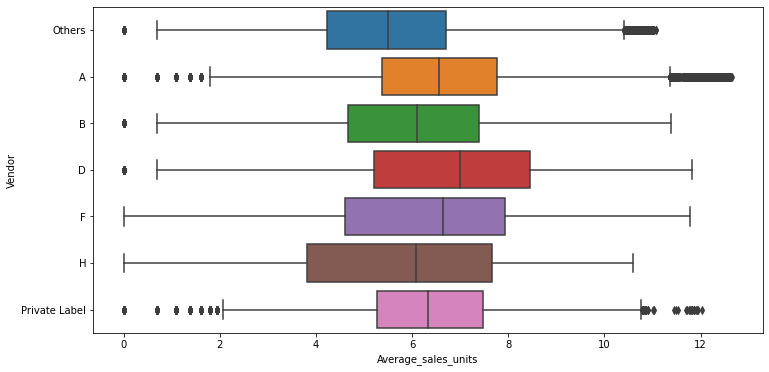

In [328]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Vendor',x='Average_sales_units',data=dataset,orient='h')

<AxesSubplot:xlabel='Vendor', ylabel='count'>

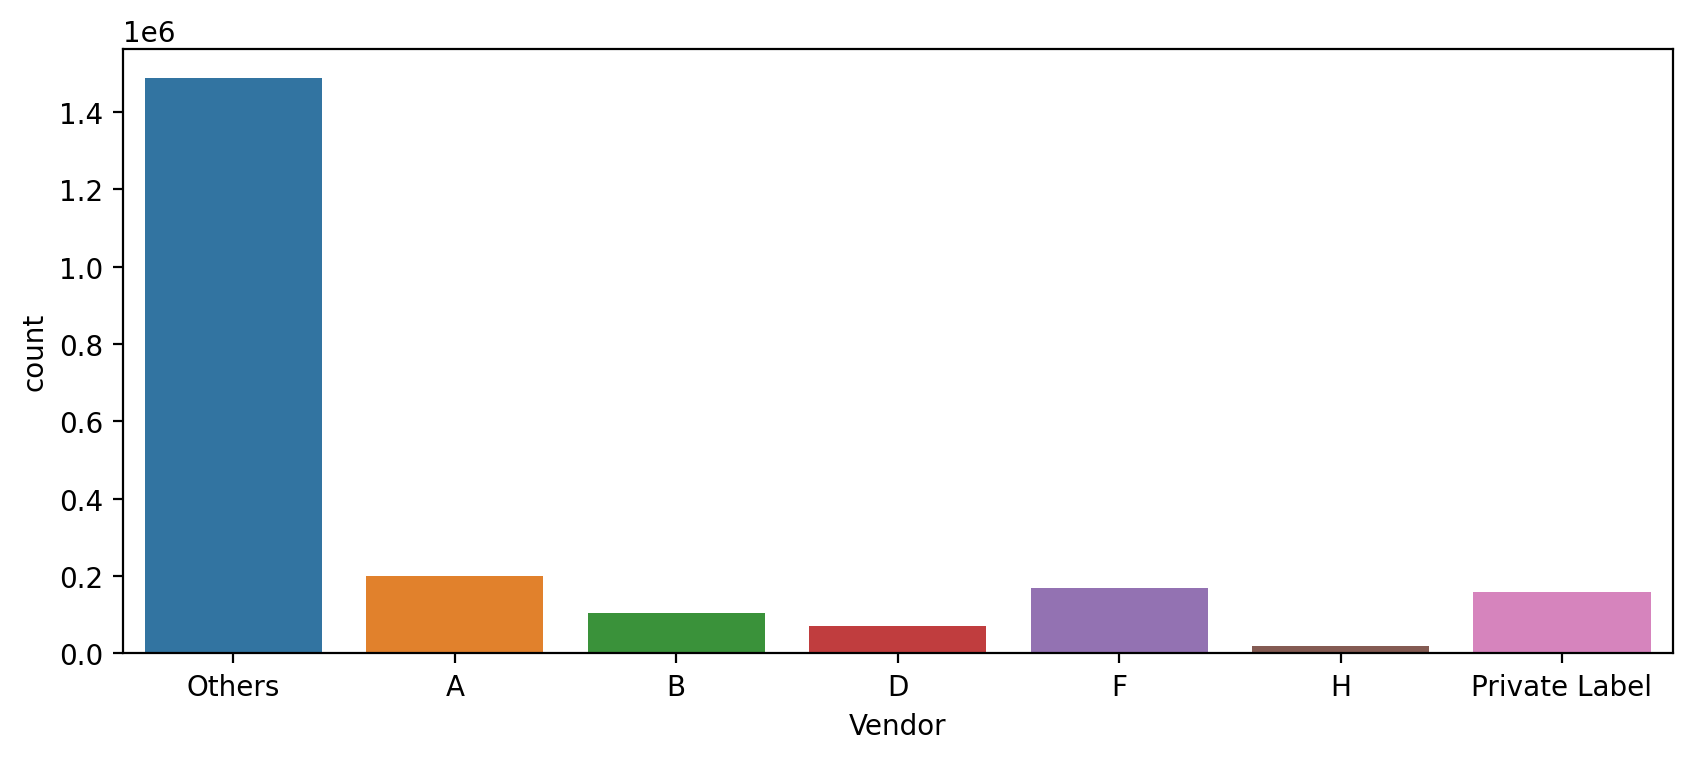

In [329]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Vendor',data=dataset)

##### It seems market share of Other Vendors is highest, after that our client Manufacturer A has highest market share among other competitors followed by f and private label

##### Overall market share of Manufacturer A

In [330]:
dataset_market[dataset_market['Vendor'] == 'A']['Sum_sales_units']

0    1.301596e+06
Name: Sum_sales_units, dtype: float64

In [331]:
dataset_market['Sum_sales_units'].sum()

12587995.333503786

In [332]:
overall_percentage = dataset_market[dataset_market['Vendor'] == 'A']['Sum_sales_units']/dataset_market['Sum_sales_units'].sum()

In [333]:
overall_percentage = overall_percentage[0]*100

In [334]:
overall_percentage


10.33998236470599

##### So our client Manufacturer A's contribution is 10.33% for all the themes in the market.

#### 5.2:Find the potential competitors for our client in each theme

In [335]:
dataset_top_themes.head()

year Theme_Name         Vendor  Average_sales_dollars  \
243  2018.0   low carb         Others           2.035554e+06   
143  2017.0   low carb         Others           1.693599e+06   
346  2019.0   low carb         Others           1.596236e+06   
52   2016.0   low carb         Others           1.380618e+06   
244  2018.0   low carb  Private Label           3.223463e+05   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
243         1.492907e+06       1.527987e+06         338.990430   
143         1.237046e+06       1.268587e+06         202.681182   
346         1.184611e+06       1.208492e+06         215.490416   
52          1.011092e+06       1.039687e+06         124.684578   
244         2.593516e+05       2.763195e+05          52.508594   

     Average_searchVolume  
243          7.417015e+06  
143          1.920014e+06  
346          5.698036e+06  
52           1.594380e+06  
244          1.156133e+06

This dataset gives overall sales for a year for each theme

##### Now for vendor A these are the top 3 themes

In [336]:
dataset_top_themes[dataset_top_themes['Vendor']=='A'].sort_values('Average_sales_units',ascending=False).head(20)

year                  Theme_Name Vendor  Average_sales_dollars  \
238  2018.0                    low carb      A          313020.454420   
341  2019.0                    low carb      A          257977.264033   
138  2017.0                    low carb      A          252042.210238   
47   2016.0                    low carb      A          195367.324709   
266  2018.0                      salmon      A           37481.291103   
370  2019.0                      salmon      A           33666.741489   
215  2018.0             ethnic & exotic      A           39748.556858   
189  2018.0                   blueberry      A           37401.413295   
155  2017.0  no additives/preservatives      A           30861.650003   
168  2017.0                      salmon      A           27035.064999   
286  2019.0                   blueberry      A           32089.309701   
255  2018.0  no additives/preservatives      A           27870.009106   
93   2017.0                   blueberry      A           29485.065033   
117  2017.0             ethnic & exotic      A           31788.453770   
313  2019.0             ethnic & exotic      A           31885.373673   
273  2018.0                   soy foods      A           24606.617219   
26   2016.0             ethnic & exotic      A           29070.095516   
74   2016.0                      salmon      A           23190.346771   
2    2016.0                   blueberry      A           23540.688333   
176  2017.0                   soy foods      A           20733.796706   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
238        249605.777289      252523.570882          46.804462   
341        204598.729927      207638.584326          31.620320   
138        201408.657946      202810.223603          27.260006   
47         157823.896237      158396.113261          16.114284   
266         30384.041710       32623.082105           3.538818   
370         27486.731270       28531.942114           1.853117   
215         24921.665086       36040.626622           3.920242   
189         24872.692258       33596.582353           0.653901   
155         22929.731560       25390.906197           0.195198   
168         21869.057867       23912.057542           1.234324   
286         21105.297292       28642.002977           0.445774   
255         20566.567301       22822.324603           0.131089   
93          20122.152630       26519.709391           0.461545   
117         19976.521324       28997.826062           4.221700   
313         19867.495420       28787.810917           4.144448   
273         18810.979277       23094.569677           0.077683   
26          18608.065857       26768.084245           2.359809   
74          18601.392853       20562.028693           0.502851   
2           16262.430746       21067.053098           0.394943   
176         16095.644114       19616.496319           0.056870   

     Average_searchVolume  
238          1.026577e+06  
341          8.377158e+05  
138          2.581405e+05  
47           2.058066e+05  
266          4.739026e+04  
370          4.460994e+04  
215          9.685126e+04  
189          6.743983e+04  
155          1.367396e+04  
168          1.837165e+04  
286          5.785255e+04  
255          1.263917e+04  
93           2.582044e+04  
117          3.351841e+04  
313          8.277358e+04  
273          4.494462e+04  
26           3.176860e+04  
74           1.566935e+04  
2            2.074497e+04  
176          1.340738e+04

##### Low Carb, ethnic & exotic and Salmon are the top 3 themes for our client A

Let's find the potential Competitors

In [337]:
top_themes = ['low carb', 'ethnic & exotic', 'salmon']

In [338]:
dataset_theme_potential = dataset_top_themes[dataset_top_themes['Theme_Name'].isin(top_themes)]

In [339]:
dataset_theme_potential

year       Theme_Name         Vendor  Average_sales_dollars  \
243  2018.0         low carb         Others           2.035554e+06   
143  2017.0         low carb         Others           1.693599e+06   
346  2019.0         low carb         Others           1.596236e+06   
52   2016.0         low carb         Others           1.380618e+06   
244  2018.0         low carb  Private Label           3.223463e+05   
..      ...              ...            ...                    ...   
345  2019.0         low carb              H           3.849351e+03   
374  2019.0           salmon              H           2.600072e+03   
319  2019.0  ethnic & exotic  Private Label           1.014007e+03   
221  2018.0  ethnic & exotic  Private Label           3.291895e+02   
32   2016.0  ethnic & exotic  Private Label           0.000000e+00   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
243         1.492907e+06       1.527987e+06         338.990430   
143         1.237046e+06       1.268587e+06         202.681182   
346         1.184611e+06       1.208492e+06         215.490416   
52          1.011092e+06       1.039687e+06         124.684578   
244         2.593516e+05       2.763195e+05          52.508594   
..                   ...                ...                ...   
345         2.534338e+03       3.089016e+03           0.503614   
374         2.111768e+03       2.138164e+03           0.149903   
319         7.075904e+02       8.879693e+02           0.145100   
221         2.087192e+02       2.958107e+02           0.033977   
32          0.000000e+00       0.000000e+00           0.002237   

     Average_searchVolume  
243          7.417015e+06  
143          1.920014e+06  
346          5.698036e+06  
52           1.594380e+06  
244          1.156133e+06  
..                    ...  
345          1.343906e+04  
374          3.614430e+03  
319          3.003702e+03  
221          9.438234e+02  
32           2.750449e+01  

[83 rows x 8 columns]

<AxesSubplot:xlabel='Vendor', ylabel='Average_sales_units'>

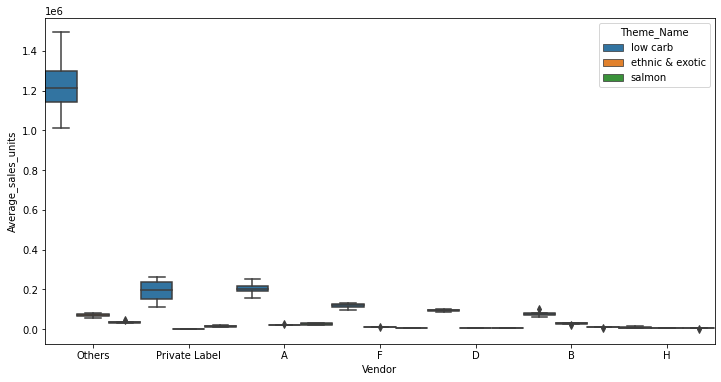

In [340]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Vendor',y='Average_sales_units',data=dataset_theme_potential, hue = 'Theme_Name',width=1.0)

<AxesSubplot:xlabel='Vendor', ylabel='Average_sales_units'>

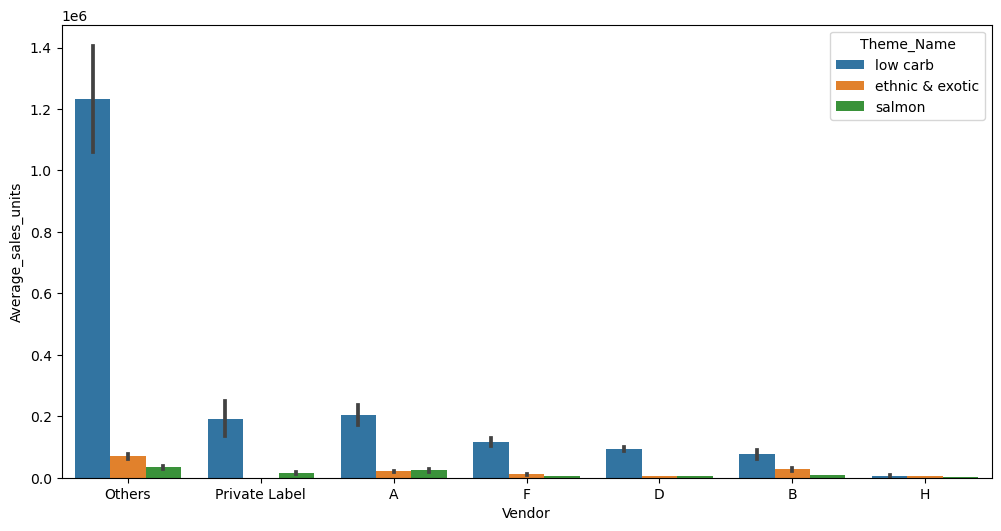

In [341]:
plt.figure(figsize=(12,6),dpi=100)
sns.barplot(x='Vendor',y='Average_sales_units',data=dataset_theme_potential, hue = 'Theme_Name',estimator=np.mean,ci='sd')



##### Observations from the bar plot, for top 3 themes manufactured by our client A:

    1. For low carb, our competitors are Other small vendors and Manufacturer Private Label, D and F.
    
    2. For ethnic & exotic, our client is the biggest manufacturer after others and B, Manufacturer B can be our competitor.
    
    3. For Salmon also, our client is the biggest manufacturer, Others and private label can be our competitor.

#### 5.3:Is there a Trend/Seasonality across themes

In [342]:
dataset_theme_A

Vendor Theme_Name    year  month  week  Average_sales_dollars  \
49926        A   low carb  2016.0    1.0     2               7.476472   
49927        A   low carb  2016.0    1.0     3               5.717028   
49928        A   low carb  2016.0    1.0     4               4.543295   
49929        A   low carb  2016.0    2.0     5               3.850148   
49930        A   low carb  2016.0    2.0     6               4.442651   
...        ...        ...     ...    ...   ...                    ...   
2207793      A   low carb  2019.0    8.0    34               7.558517   
2207794      A   low carb  2019.0    8.0    35               7.676474   
2207795      A   low carb  2019.0    9.0    37               7.591357   
2207796      A   low carb  2019.0    9.0    38               7.720462   
2207797      A   low carb  2019.0    9.0    39               7.864804   

         Average_sales_units  Average_sales_lbs  Average_post_week  \
49926               5.820083           4.653960           0.000613   
49927               3.828641           2.639057           0.000525   
49928               2.639057           1.609438           0.000769   
49929               2.197225           1.098612           0.000465   
49930               2.833213           1.609438           0.000799   
...                      ...                ...                ...   
2207793             4.595120           5.981414           0.000560   
2207794             4.691348           6.077642           0.000514   
2207795             4.744932           6.131226           0.000586   
2207796             4.867534           6.253829           0.000492   
2207797             5.030438           6.416732           0.000565   

         Average_searchVolume  
49926                8.803194  
49927                8.931505  
49928                8.801781  
49929                8.988571  
49930                9.079469  
...                       ...  
2207793             26.240462  
2207794             26.457075  
2207795             25.674463  
2207796             26.102483  
2207797             25.958857  

[151738 rows x 10 columns]

In [343]:
seasonality = dataset_theme_A.groupby(['week','year','month','Theme_Name']).sum()

In [344]:
seasonality = seasonality.reset_index()

In [345]:
seasonality[seasonality['Theme_Name'] == 'ethnic & exotic']

week    year  month       Theme_Name  Average_sales_dollars  \
0       1  2018.0    1.0  ethnic & exotic             799.646238   
2       1  2019.0    1.0  ethnic & exotic             973.462019   
5       2  2016.0    1.0  ethnic & exotic             627.527242   
8       2  2017.0    1.0  ethnic & exotic             744.912312   
11      2  2018.0    1.0  ethnic & exotic             818.758623   
..    ...     ...    ...              ...                    ...   
444    51  2016.0   12.0  ethnic & exotic             756.793778   
447    51  2017.0   12.0  ethnic & exotic             825.816607   
450    51  2018.0   12.0  ethnic & exotic             999.061255   
453    52  2017.0   12.0  ethnic & exotic             808.166607   
456    52  2018.0   12.0  ethnic & exotic             959.516395   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
0             503.928047         725.672885           0.070775   
2             611.921268         882.699841           0.104606   
5             406.193348         580.461356           0.058236   
8             470.423474         685.262862           0.169727   
11            513.226081         744.497792           0.074711   
..                   ...                ...                ...   
444           476.950068         692.620967           0.084434   
447           523.131006         754.422522           0.131085   
450           634.170295         905.490676           0.062837   
453           508.419278         735.706884           0.128431   
456           599.280581         865.692094           0.089680   

     Average_searchVolume  
0             1416.126306  
2             2134.490919  
5              668.448836  
8              807.760160  
11            2217.739879  
..                    ...  
444            807.611095  
447            856.059738  
450           2753.856182  
453            837.681990  
456           2600.287959  

[156 rows x 9 columns]

In [346]:
seasonality[seasonality['Theme_Name'] == 'low carb']

week    year  month Theme_Name  Average_sales_dollars  \
1       1  2018.0    1.0   low carb            6849.707449   
3       1  2019.0    1.0   low carb            7567.664643   
6       2  2016.0    1.0   low carb            4264.787507   
9       2  2017.0    1.0   low carb            5444.589778   
12      2  2018.0    1.0   low carb            6853.528379   
..    ...     ...    ...        ...                    ...   
445    51  2016.0   12.0   low carb            5514.513753   
448    51  2017.0   12.0   low carb            7025.514345   
451    51  2018.0   12.0   low carb            7779.801708   
454    52  2017.0   12.0   low carb            6808.060334   
457    52  2018.0   12.0   low carb            7602.195397   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
1            5451.822136        5524.931542           1.246969   
3            6009.722944        6079.180666           0.775530   
6            3429.766276        3480.826646           0.315766   
9            4436.661881        4401.253507           0.520684   
12           5468.830796        5544.141840           0.754761   
..                   ...                ...                ...   
445          4514.865063        4467.664431           0.405453   
448          5629.108764        5700.843079           0.686482   
451          6223.770570        6301.380974           0.729144   
454          5412.074881        5486.552712           0.785181   
457          6050.221417        6124.765580           0.716568   

     Average_searchVolume  
1            22806.316201  
3            26767.157846  
6             4533.645113  
9             5549.513346  
12           22039.567445  
..                    ...  
445           5485.030690  
448           7111.752390  
451          24169.822571  
454           7043.049308  
457          24631.978363  

[156 rows x 9 columns]

In [347]:
seasonality[seasonality['Theme_Name'] == 'salmon']

week    year  month Theme_Name  Average_sales_dollars  \
4       1  2019.0    1.0     salmon            1021.312409   
7       2  2016.0    1.0     salmon             572.007919   
10      2  2017.0    1.0     salmon             722.614797   
13      2  2018.0    1.0     salmon             794.237534   
16      2  2019.0    1.0     salmon            1036.017216   
..    ...     ...    ...        ...                    ...   
446    51  2016.0   12.0     salmon             738.833965   
449    51  2017.0   12.0     salmon             810.795050   
452    51  2018.0   12.0     salmon            1028.862900   
455    52  2017.0   12.0     salmon             790.150220   
458    52  2018.0   12.0     salmon             997.637478   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
4             833.448035         867.321205           0.050726   
7             455.066163         514.208201           0.011217   
10            591.493032         644.694251           0.011370   
13            644.441478         698.126130           0.033140   
16            838.765459         874.275805           0.066098   
..                   ...                ...                ...   
446           604.871053         660.831657           0.154733   
449           653.909807         713.317381           0.027031   
452           850.629173         884.977135           0.016120   
455           637.799314         693.910452           0.039906   
458           820.441616         852.765336           0.070888   

     Average_searchVolume  
4             1533.079220  
7              408.786489  
10             495.992702  
13             538.863636  
16             887.606489  
..                    ...  
446            449.080622  
449            548.332359  
452            841.325790  
455            551.917114  
458           1304.818983  

[147 rows x 9 columns]

<Figure size 864x576 with 0 Axes>

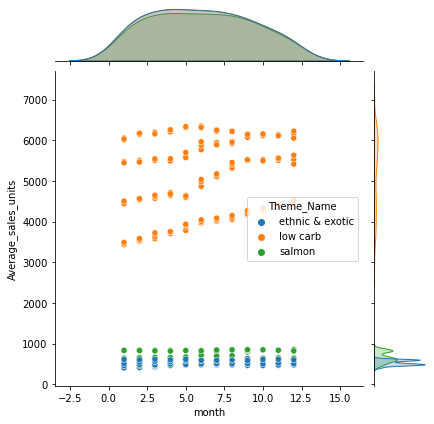

In [348]:
plt.figure(figsize=(12,8))
sns.jointplot(x='month',y='Average_sales_units',data=seasonality,hue='Theme_Name',kind='scatter')

<AxesSubplot:xlabel='month', ylabel='Average_sales_units'>

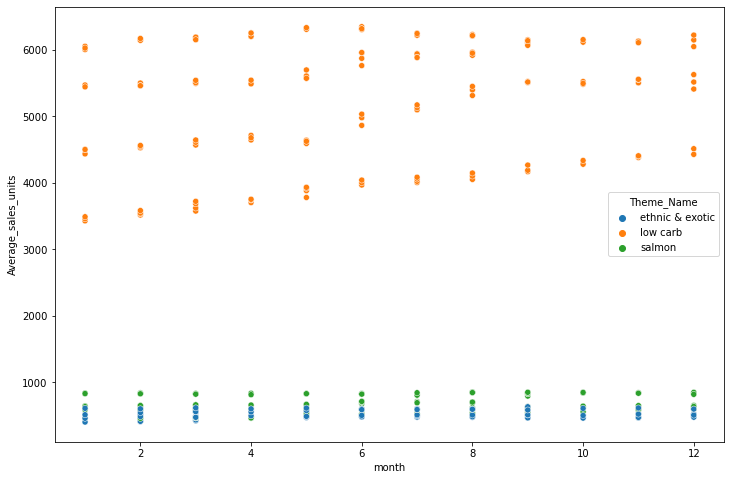

In [349]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='month',y='Average_sales_units',data=seasonality,hue='Theme_Name')

##### For themes these are the seasonality trends observed in the above scatter-plot:
    
    1. Lowcarb is the theme which is the biggest selling point of our client Manufacturer A, it's giving good sales throughout the year at an average of 1.8 million units for all the products together. Specifically, best seasonal months are Oct, Nov and December. As the sales_units are highest during these months for the year 2016-2018.
       
    2. ethnic & exotic, Salmon seasonality trends shows it's sales are consistent throughout the year with a little raise in mid year from 6th to 8th months

#### 5.4:Identify top 5 themes with the highest business opportunity (this Is subjective. Back up your top 5 with valid reasoning)

This dataset is the Sum of Average sales for all the products in a year for a particular theme

In [350]:
dataset_top_themes

year       Theme_Name         Vendor  Average_sales_dollars  \
243  2018.0         low carb         Others           2.035554e+06   
143  2017.0         low carb         Others           1.693599e+06   
346  2019.0         low carb         Others           1.596236e+06   
52   2016.0         low carb         Others           1.380618e+06   
244  2018.0         low carb  Private Label           3.223463e+05   
..      ...              ...            ...                    ...   
175  2017.0         sea salt         Others           1.581772e+01   
71   2016.0          poultry              B           9.145588e+00   
20   2016.0             crab  Private Label           4.969813e+00   
183  2017.0             tuna              A           4.584967e+00   
32   2016.0  ethnic & exotic  Private Label           0.000000e+00   

     Average_sales_units  Average_sales_lbs  Average_post_week  \
243         1.492907e+06       1.527987e+06         338.990430   
143         1.237046e+06       1.268587e+06         202.681182   
346         1.184611e+06       1.208492e+06         215.490416   
52          1.011092e+06       1.039687e+06         124.684578   
244         2.593516e+05       2.763195e+05          52.508594   
..                   ...                ...                ...   
175         7.297091e+00       1.147585e+01           0.000089   
71          6.054439e+00       7.153052e+00           0.000003   
20          4.969813e+00       4.653960e+00           0.000017   
183         3.178054e+00       2.708050e+00           0.000022   
32          0.000000e+00       0.000000e+00           0.002237   

     Average_searchVolume  
243          7.417015e+06  
143          1.920014e+06  
346          5.698036e+06  
52           1.594380e+06  
244          1.156133e+06  
..                    ...  
175          6.639876e+00  
71           4.653960e+00  
20           1.316682e+01  
183          5.856472e+00  
32           2.750449e+01  

[388 rows x 8 columns]

In [351]:
themes_business = dataset_top_themes.groupby(['year','Theme_Name']).sum()

In [352]:
themes_business = themes_business.sort_values('Average_sales_units',ascending=False)

In [353]:
themes_business = themes_business.reset_index()

In [354]:
themes_business.head(25)

year                  Theme_Name  Average_sales_dollars  \
0   2018.0                    low carb           3.106532e+06   
1   2017.0                    low carb           2.536181e+06   
2   2019.0                    low carb           2.478613e+06   
3   2016.0                    low carb           2.086400e+06   
4   2018.0                   blueberry           4.479847e+05   
5   2018.0                    gmo free           3.793958e+05   
6   2016.0                    gmo free           3.402978e+05   
7   2017.0                    gmo free           3.408796e+05   
8   2019.0                   blueberry           3.608072e+05   
9   2017.0                   blueberry           3.450935e+05   
10  2019.0                    gmo free           2.911471e+05   
11  2017.0  no additives/preservatives           2.686504e+05   
12  2016.0                   blueberry           2.872602e+05   
13  2018.0  no additives/preservatives           2.443469e+05   
14  2018.0             ethnic & exotic           2.368618e+05   
15  2017.0             ethnic & exotic           2.246418e+05   
16  2016.0             ethnic & exotic           2.168234e+05   
17  2018.0                        crab           2.237073e+05   
18  2018.0                      salmon           1.475758e+05   
19  2019.0             ethnic & exotic           1.749779e+05   
20  2019.0                        crab           1.589521e+05   
21  2017.0                      salmon           1.230837e+05   
22  2018.0                     chicken           1.228921e+05   
23  2019.0                      salmon           1.100241e+05   
24  2016.0                      salmon           1.088645e+05   

    Average_sales_units  Average_sales_lbs  Average_post_week  \
0          2.334600e+06       2.415173e+06         502.710704   
1          1.898964e+06       1.965562e+06         294.895074   
2          1.877624e+06       1.935590e+06         324.047157   
3          1.565460e+06       1.623392e+06         182.714624   
4          2.860377e+05       3.799318e+05           8.890003   
5          2.678607e+05       3.152334e+05           6.476422   
6          2.405573e+05       2.833982e+05           5.480179   
7          2.404296e+05       2.827948e+05           9.651624   
8          2.341282e+05       3.104583e+05           5.584887   
9          2.196688e+05       2.918059e+05           6.064465   
10         2.057479e+05       2.428702e+05           3.150951   
11         1.939202e+05       2.136999e+05           1.842305   
12         1.840934e+05       2.437498e+05           5.197686   
13         1.759891e+05       1.940360e+05           1.219061   
14         1.544580e+05       1.985983e+05          26.113737   
15         1.464323e+05       1.876426e+05          31.909060   
16         1.429301e+05       1.822321e+05          18.141964   
17         1.418738e+05       1.533370e+05           4.429411   
18         1.154173e+05       1.220346e+05          15.481741   
19         1.144087e+05       1.479742e+05          25.201876   
20         1.031958e+05       1.095932e+05           0.529692   
21         9.481333e+04       1.026784e+05           6.396366   
22         9.379153e+04       9.075424e+04           5.237081   
23         8.622481e+04       8.974058e+04           6.688608   
24         8.243010e+04       9.218786e+04           2.647485   

    Average_searchVolume  
0           1.100358e+07  
1           2.794218e+06  
2           8.589049e+06  
3           2.337386e+06  
4           9.157072e+05  
5           3.055643e+05  
6           2.817320e+05  
7           2.716531e+05  
8           7.239371e+05  
9           3.380671e+05  
10          2.403230e+05  
11          1.275146e+05  
12          2.759863e+05  
13          1.178016e+05  
14          6.422812e+05  
15          2.528469e+05  
16          2.444043e+05  
17          2.633620e+05  
18          2.023608e+05  
19          5.067896e+05  
20          1.958713e+05  
21          9.586181e+04  
22 

This dataset is the sum of sales for all the vendors and products for a particular theme in a particular year.

##### Top 5 themes which have the largest sales for the year 2016-2019 cumulatively for all the vendors are:
    
    1. Low Carb
    
    2. No additives/preservatives
    
    3. ethnic & exotic
    
    4. Blueberry
    
    5. Salmon

##### Out of these 5 themes our client A sells 1,3 and 5th theme which are low carb, salmon and ethnic & exotic

In [355]:
business_themes = ['low carb','no additives/preservatives','soy foods','gmo free','salmon']
themes_business = themes_business[themes_business['Theme_Name'].isin(business_themes)]

In [356]:
themes_business

year                  Theme_Name  Average_sales_dollars  \
0   2018.0                    low carb           3.106532e+06   
1   2017.0                    low carb           2.536181e+06   
2   2019.0                    low carb           2.478613e+06   
3   2016.0                    low carb           2.086400e+06   
5   2018.0                    gmo free           3.793958e+05   
6   2016.0                    gmo free           3.402978e+05   
7   2017.0                    gmo free           3.408796e+05   
10  2019.0                    gmo free           2.911471e+05   
11  2017.0  no additives/preservatives           2.686504e+05   
13  2018.0  no additives/preservatives           2.443469e+05   
18  2018.0                      salmon           1.475758e+05   
21  2017.0                      salmon           1.230837e+05   
23  2019.0                      salmon           1.100241e+05   
24  2016.0                      salmon           1.088645e+05   
28  2018.0                   soy foods           1.033303e+05   
30  2017.0                   soy foods           9.336957e+04   
37  2019.0                   soy foods           7.419563e+04   
38  2019.0  no additives/preservatives           6.875395e+04   
40  2016.0                   soy foods           6.388560e+04   
44  2016.0  no additives/preservatives           3.115099e+04   

    Average_sales_units  Average_sales_lbs  Average_post_week  \
0          2.334600e+06       2.415173e+06         502.710704   
1          1.898964e+06       1.965562e+06         294.895074   
2          1.877624e+06       1.935590e+06         324.047157   
3          1.565460e+06       1.623392e+06         182.714624   
5          2.678607e+05       3.152334e+05           6.476422   
6          2.405573e+05       2.833982e+05           5.480179   
7          2.404296e+05       2.827948e+05           9.651624   
10         2.057479e+05       2.428702e+05           3.150951   
11         1.939202e+05       2.136999e+05           1.842305   
13         1.759891e+05       1.940360e+05           1.219061   
18         1.154173e+05       1.220346e+05          15.481741   
21         9.481333e+04       1.026784e+05           6.396366   
23         8.622481e+04       8.974058e+04           6.688608   
24         8.243010e+04       9.218786e+04           2.647485   
28         7.379990e+04       9.254588e+04           0.361946   
30         6.686992e+04       8.409639e+04           0.285519   
37         5.298140e+04       6.633803e+04           0.150176   
38         4.913398e+04       5.445829e+04           0.483764   
40         4.540168e+04       5.772338e+04           0.188244   
44         2.254369e+04       2.471850e+04           0.086640   

    Average_searchVolume  
0           1.100358e+07  
1           2.794218e+06  
2           8.589049e+06  
3           2.337386e+06  
5           3.055643e+05  
6           2.817320e+05  
7           2.716531e+05  
10          2.403230e+05  
11          1.275146e+05  
13          1.178016e+05  
18          2.023608e+05  
21          9.586181e+04  
23          1.620468e+05  
24          8.486263e+04  
28          2.089191e+05  
30          6.755592e+04  
37          1.509378e+05  
38          3.049244e+04  
40          5.003053e+04  
44          1.273511e+04

##### Top 5-themes with highest business opportunity as these themes have highest sales for year 2016-2020 if we combine all vendor individual sales for a diversified variety of products

<AxesSubplot:xlabel='Theme_Name', ylabel='Average_sales_units'>

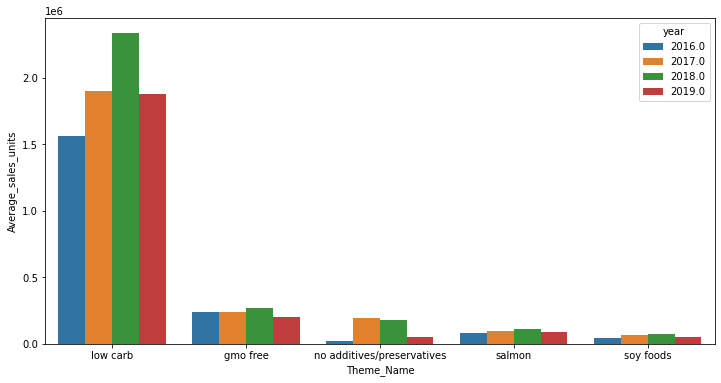

In [357]:
plt.figure(figsize=(12,6))
sns.barplot(x='Theme_Name',y='Average_sales_units',data=themes_business,hue='year',estimator=np.mean,ci='sd')

### 6. Feature Selection

In [358]:
dataset_theme_A_outlier

year  month  week  Average_sales_dollars  Average_sales_units  \
49926    2016.0    1.0     2               7.476472             5.820083   
49927    2016.0    1.0     3               5.717028             3.828641   
49928    2016.0    1.0     4               4.543295             2.639057   
49929    2016.0    2.0     5               3.850148             2.197225   
49930    2016.0    2.0     6               4.442651             2.833213   
...         ...    ...   ...                    ...                  ...   
2207793  2019.0    8.0    34               7.558517             4.595120   
2207794  2019.0    8.0    35               7.676474             4.691348   
2207795  2019.0    9.0    37               7.591357             4.744932   
2207796  2019.0    9.0    38               7.720462             4.867534   
2207797  2019.0    9.0    39               7.864804             5.030438   

         Average_sales_lbs  Average_post_week  Average_searchVolume  \
49926             4.653960           0.000613              8.803194   
49927             2.639057           0.000525              8.931505   
49928             1.609438           0.000769              8.801781   
49929             1.098612           0.000465              8.988571   
49930             1.609438           0.000799              9.079469   
...                    ...                ...                   ...   
2207793           5.981414           0.000560             26.240462   
2207794           6.077642           0.000514             26.457075   
2207795           6.131226           0.000586             25.674463   
2207796           6.253829           0.000492             26.102483   
2207797           6.416732           0.000565             25.958857   

         Theme_Name_low carb  Theme_Name_salmon  
49926                      1                  0  
49927                      1                  0  
49928                      1                  0  
49929                      1                  0  
49930                      1                  0  
...                      ...                ...  
2207793                    1                  0  
2207794                    1                  0  
2207795                    1                  0  
2207796                    1                  0  
2207797                    1                  0  

[151738 rows x 10 columns]

#### 6.1: Feature Selection with Pearson Correlation


#### Correlation Matrix with Heatmap


Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [359]:
dataset_theme_A_outlier.corr()['Average_sales_units'].sort_values()

Average_searchVolume    -0.029889
year                    -0.027868
Average_post_week       -0.021529
month                    0.002059
week                     0.002087
Theme_Name_low carb      0.067989
Theme_Name_salmon        0.074164
Average_sales_lbs        0.688702
Average_sales_dollars    0.767722
Average_sales_units      1.000000
Name: Average_sales_units, dtype: float64

<AxesSubplot:>

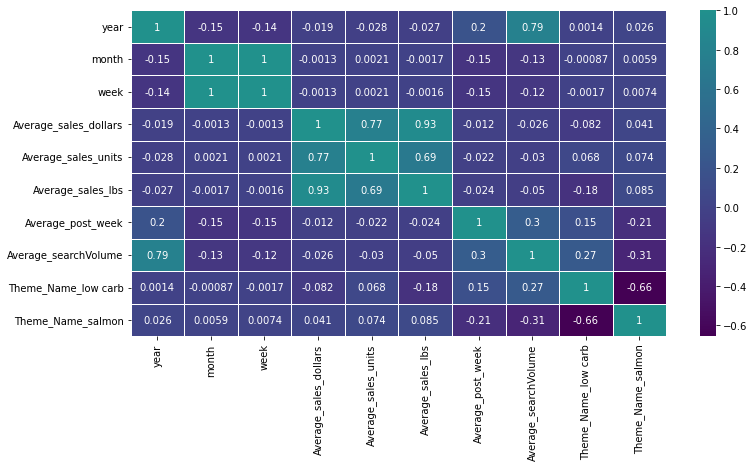

In [360]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset_theme_A_outlier.corr(),linewidth=0.5,annot=True,cmap='viridis',center=1)

##### According to the heatmap correlation index, year, week and month are not creating any significant impact on Average_sales

#### 6.2:Information gain - mutual information In Regression


Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [361]:
from sklearn.feature_selection import mutual_info_regression

In [362]:
X = dataset_theme_A_outlier.iloc[:,:]    #independent columns
X = X.drop('Average_sales_units',axis=1)
y = dataset_theme_A_outlier.iloc[:,3]    #target column i.e Average_sales_units


In [363]:
X

year  month  week  Average_sales_dollars  Average_sales_lbs  \
49926    2016.0    1.0     2               7.476472           4.653960   
49927    2016.0    1.0     3               5.717028           2.639057   
49928    2016.0    1.0     4               4.543295           1.609438   
49929    2016.0    2.0     5               3.850148           1.098612   
49930    2016.0    2.0     6               4.442651           1.609438   
...         ...    ...   ...                    ...                ...   
2207793  2019.0    8.0    34               7.558517           5.981414   
2207794  2019.0    8.0    35               7.676474           6.077642   
2207795  2019.0    9.0    37               7.591357           6.131226   
2207796  2019.0    9.0    38               7.720462           6.253829   
2207797  2019.0    9.0    39               7.864804           6.416732   

         Average_post_week  Average_searchVolume  Theme_Name_low carb  \
49926             0.000613              8.803194                    1   
49927             0.000525              8.931505                    1   
49928             0.000769              8.801781                    1   
49929             0.000465              8.988571                    1   
49930             0.000799              9.079469                    1   
...                    ...                   ...                  ...   
2207793           0.000560             26.240462                    1   
2207794           0.000514             26.457075                    1   
2207795           0.000586             25.674463                    1   
2207796           0.000492             26.102483                    1   
2207797           0.000565             25.958857                    1   

         Theme_Name_salmon  
49926                    0  
49927                    0  
49928                    0  
49929                    0  
49930                    0  
...                    ...  
2207793                  0  
2207794                  0  
2207795                  0  
2207796                  0  
2207797                  0  

[151738 rows x 9 columns]

In [364]:
y

49926      7.476472
49927      5.717028
49928      4.543295
49929      3.850148
49930      4.442651
             ...   
2207793    7.558517
2207794    7.676474
2207795    7.591357
2207796    7.720462
2207797    7.864804
Name: Average_sales_dollars, Length: 151738, dtype: float64

In [365]:
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.04255364, 0.05595654, 0.06459084, 9.7551638 , 1.6118787 ,
       0.03320923, 0.05218431, 0.01655776, 0.03387796])

In [366]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Average_sales_dollars    9.755164
Average_sales_lbs        1.611879
week                     0.064591
month                    0.055957
Average_searchVolume     0.052184
year                     0.042554
Theme_Name_salmon        0.033878
Average_post_week        0.033209
Theme_Name_low carb      0.016558
dtype: float64

<AxesSubplot:>

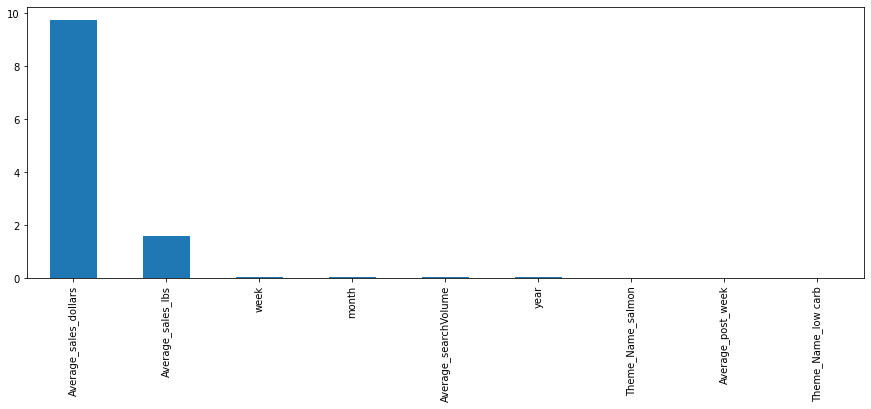

In [367]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Here also, we can deduce that year,week and month can be dropped!!!

#### 6.3:Detecting Multicollinearity with Variance Inflation Factor(VIF).

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

##### As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [368]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [369]:
X.columns

Index(['year', 'month', 'week', 'Average_sales_dollars', 'Average_sales_lbs',
       'Average_post_week', 'Average_searchVolume', 'Theme_Name_low carb',
       'Theme_Name_salmon'],
      dtype='object')

In [370]:
len(X.columns)

9

In [371]:
x = X.values

In [372]:
x = x.astype(np.float)

C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_20832\1911961902.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


In [373]:
x

array([[2.01600000e+03, 1.00000000e+00, 2.00000000e+00, ...,
        8.80319439e+00, 1.00000000e+00, 0.00000000e+00],
       [2.01600000e+03, 1.00000000e+00, 3.00000000e+00, ...,
        8.93150458e+00, 1.00000000e+00, 0.00000000e+00],
       [2.01600000e+03, 1.00000000e+00, 4.00000000e+00, ...,
        8.80178137e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.01900000e+03, 9.00000000e+00, 3.70000000e+01, ...,
        2.56744630e+01, 1.00000000e+00, 0.00000000e+00],
       [2.01900000e+03, 9.00000000e+00, 3.80000000e+01, ...,
        2.61024826e+01, 1.00000000e+00, 0.00000000e+00],
       [2.01900000e+03, 9.00000000e+00, 3.90000000e+01, ...,
        2.59588572e+01, 1.00000000e+00, 0.00000000e+00]])

In [374]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x, i)
            for i in range(len(X.columns))]

print(vif_data)


                 feature         VIF
0                   year   44.709556
1                  month  774.346611
2                   week  679.887338
3  Average_sales_dollars  137.753972
4      Average_sales_lbs   79.322251
5      Average_post_week    3.546719
6   Average_searchVolume    5.891533
7    Theme_Name_low carb   10.048759
8      Theme_Name_salmon    2.048104


##### As we can see, year and Average_searchVolume have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the time will move forward, search_volume will increase due to more advancements and more number of people using such platforms like google, walmart etc. Hence, considering these two features together leads to a model with high multicollinearity.

##### As we can see, Average_sales_dollars and Average_sales_lbs have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the revenue in dollar will increase, lbs weight value will also increase. Hence, considering these two features together leads to a model with high multicollinearity.

##### As we can see, Average_sales_dollars and Average_post_month have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the revenue in dollar will increase, company will also increase number of posts related to particular theme to increase sales further. Hence, considering these two features together leads to a model with high multicollinearity.

### 7.Build the sales model and identify the driver of sales (Theme Level)

In [375]:
dataset_theme_A_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151738 entries, 49926 to 2207797
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   151738 non-null  float64
 1   month                  151738 non-null  float64
 2   week                   151738 non-null  UInt32 
 3   Average_sales_dollars  151738 non-null  float64
 4   Average_sales_units    151738 non-null  float64
 5   Average_sales_lbs      151738 non-null  float64
 6   Average_post_week      151738 non-null  float64
 7   Average_searchVolume   151738 non-null  float64
 8   Theme_Name_low carb    151738 non-null  uint8  
 9   Theme_Name_salmon      151738 non-null  uint8  
dtypes: UInt32(1), float64(7), uint8(2)
memory usage: 14.3 MB


Dropping the columns with higher VIF Values (greater than 10) as max acceptible level is 10, to avoid multi-collinearity problem. Dropping week, year and also dropping month as it doesnt have significant impact on sales_units values

In [376]:
dataset_theme_A_outlier.drop(['week','year','month'], axis=1, inplace=True)

In [377]:
dataset_theme_A_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151738 entries, 49926 to 2207797
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Average_sales_dollars  151738 non-null  float64
 1   Average_sales_units    151738 non-null  float64
 2   Average_sales_lbs      151738 non-null  float64
 3   Average_post_week      151738 non-null  float64
 4   Average_searchVolume   151738 non-null  float64
 5   Theme_Name_low carb    151738 non-null  uint8  
 6   Theme_Name_salmon      151738 non-null  uint8  
dtypes: float64(5), uint8(2)
memory usage: 11.3 MB


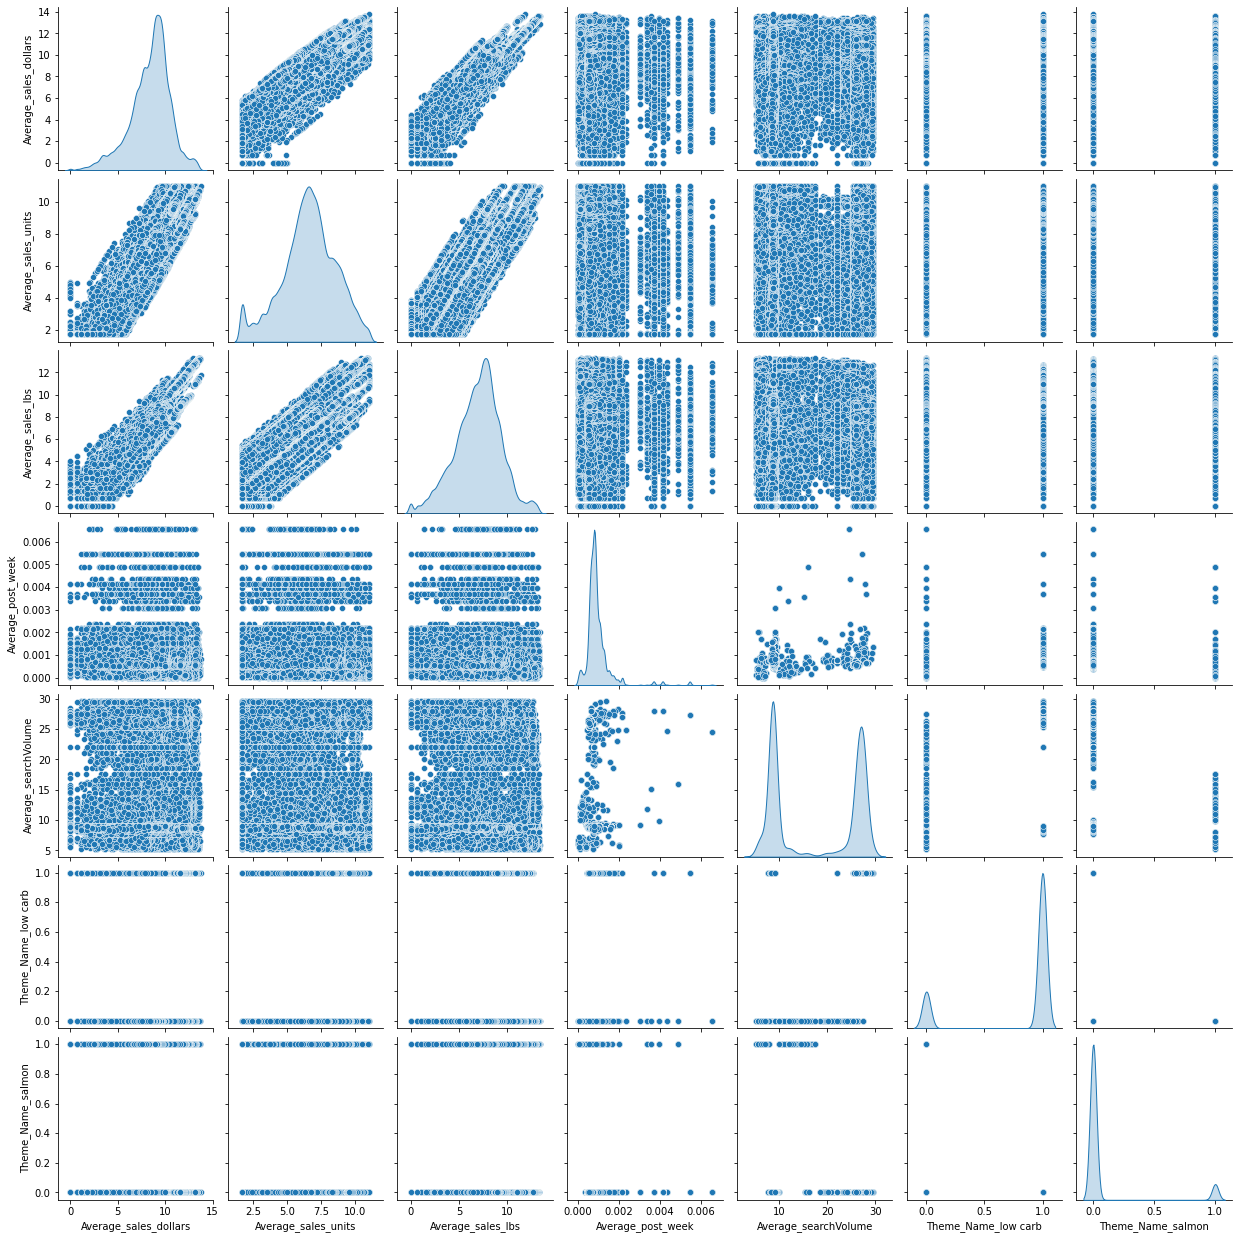

In [378]:
# Relationships between features
sns.pairplot(dataset_theme_A_outlier,diag_kind='kde')

In [379]:
dataset_theme_A_outlier

Average_sales_dollars  Average_sales_units  Average_sales_lbs  \
49926                 7.476472             5.820083           4.653960   
49927                 5.717028             3.828641           2.639057   
49928                 4.543295             2.639057           1.609438   
49929                 3.850148             2.197225           1.098612   
49930                 4.442651             2.833213           1.609438   
...                        ...                  ...                ...   
2207793               7.558517             4.595120           5.981414   
2207794               7.676474             4.691348           6.077642   
2207795               7.591357             4.744932           6.131226   
2207796               7.720462             4.867534           6.253829   
2207797               7.864804             5.030438           6.416732   

         Average_post_week  Average_searchVolume  Theme_Name_low carb  \
49926             0.000613              8.803194                    1   
49927             0.000525              8.931505                    1   
49928             0.000769              8.801781                    1   
49929             0.000465              8.988571                    1   
49930             0.000799              9.079469                    1   
...                    ...                   ...                  ...   
2207793           0.000560             26.240462                    1   
2207794           0.000514             26.457075                    1   
2207795           0.000586             25.674463                    1   
2207796           0.000492             26.102483                    1   
2207797           0.000565             25.958857                    1   

         Theme_Name_salmon  
49926                    0  
49927                    0  
49928                    0  
49929                    0  
49930                    0  
...                    ...  
2207793                  0  
2207794                  0  
2207795                  0  
2207796                  0  
2207797                  0  

[151738 rows x 7 columns]

In [380]:
X = dataset_theme_A_outlier.drop('Average_sales_units',axis=1).values
y = dataset_theme_A_outlier['Average_sales_units'].values

In [381]:
X

array([[7.47647238e+00, 4.65396035e+00, 6.13137377e-04, 8.80319439e+00,
        1.00000000e+00, 0.00000000e+00],
       [5.71702770e+00, 2.63905733e+00, 5.24607453e-04, 8.93150458e+00,
        1.00000000e+00, 0.00000000e+00],
       [4.54329478e+00, 1.60943791e+00, 7.68547986e-04, 8.80178137e+00,
        1.00000000e+00, 0.00000000e+00],
       ...,
       [7.59135705e+00, 6.13122649e+00, 5.85611916e-04, 2.56744630e+01,
        1.00000000e+00, 0.00000000e+00],
       [7.72046169e+00, 6.25382881e+00, 4.91747001e-04, 2.61024826e+01,
        1.00000000e+00, 0.00000000e+00],
       [7.86480400e+00, 6.41673228e+00, 5.65199776e-04, 2.59588572e+01,
        1.00000000e+00, 0.00000000e+00]])

In [382]:
y

array([5.82008293, 3.8286414 , 2.63905733, ..., 4.74493213, 4.86753445,
       5.03043792])

In [383]:
import statsmodels.api as sm

In [384]:
X = np.append(arr = np.ones((151738, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6]]
X_opt = X_opt.astype(np.float64)

In [385]:
X_opt[0]

array([1.00000000e+00, 7.47647238e+00, 4.65396035e+00, 6.13137377e-04,
       8.80319439e+00, 1.00000000e+00, 0.00000000e+00])

#### Backward Elimination for selecting features further

In [386]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()


In [387]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 4.429e+04
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:53:29   Log-Likelihood:            -2.4197e+05
No. Observations:              151738   AIC:                         4.840e+05
Df Residuals:                  151731   BIC:                         4.840e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9037      0.018    -50.016      0.000      -0.939      -0.868
x1             0.7918      0.004    190.480      0.000       0.784       0.800
x2            -0.0497      0.004    -13.306      0.000      -0.057      -0.042
x3            -3.2499      4.977     -0.653      0.514     -13.005       6.506
x4            -0.0037      0.000    -10.033      0.000      -0.004      -0.003
x5             1.3808      0.011    127.982      0.000       1.360       1.402
x6             1.4998      0.014    104.257      0.000       1.472       1.528
==============================================================================
Omnibus:                    16773.597   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4643.190
Skew:                          -0.032   Prob(JB):                         0.00
Kurtosis:                       2.145   Cond. No.                     3.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Select a significance level of 0.05

We need to drop the column Average_post_week since it's p value is greater than 0.05

In [388]:
X_opt = X[:, [0, 1, 2, 4, 5, 6]]

In [389]:
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 5.315e+04
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:53:36   Log-Likelihood:            -2.4197e+05
No. Observations:              151738   AIC:                         4.840e+05
Df Residuals:                  151732   BIC:                         4.840e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9059      0.018    -50.990      0.000      -0.941      -0.871
x1             0.7918      0.004    190.479      0.000       0.784       0.800
x2            -0.0497      0.004    -13.303      0.000      -0.057      -0.042
x3            -0.0038      0.000    -10.556      0.000      -0.004      -0.003
x4             1.3809      0.011    128.011      0.000       1.360       1.402
x5             1.5009      0.014    105.011      0.000       1.473       1.529
==============================================================================
Omnibus:                    16772.704   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4643.090
Skew:                          -0.032   Prob(JB):                         0.00
Kurtosis:                       2.145   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
from sklearn.model_selection import train_test_split

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.3, random_state=101)

In [392]:
X_train

array([[ 1.        ,  7.45240245,  5.3981627 , 27.9436371 ,  1.        ,
         0.        ],
       [ 1.        ,  8.90666441,  6.92951677,  8.21642129,  1.        ,
         0.        ],
       [ 1.        ,  6.48463524,  2.63905733,  8.87719144,  1.        ,
         0.        ],
       ...,
       [ 1.        ,  7.64873979,  5.76205138, 26.46210484,  1.        ,
         0.        ],
       [ 1.        , 10.78359136,  9.99834308, 26.24046153,  1.        ,
         0.        ],
       [ 1.        ,  8.0839457 ,  7.54009032,  8.61130926,  1.        ,
         0.        ]])

In [393]:
y_train

array([7.0724219 , 8.60318738, 6.11589213, ..., 7.43661727, 6.77992191,
       4.31748811])

In [394]:
X_test

array([[ 1.        ,  9.56843431,  8.70483391, 25.84320382,  1.        ,
         0.        ],
       [ 1.        ,  3.61091791,  1.60943791,  8.76192   ,  1.        ,
         0.        ],
       [ 1.        ,  5.62762111,  2.07944154, 26.91834222,  1.        ,
         0.        ],
       ...,
       [ 1.        ,  9.6363268 ,  8.62748155,  8.82368101,  1.        ,
         0.        ],
       [ 1.        , 10.44307554,  9.94783931,  8.59978821,  1.        ,
         0.        ],
       [ 1.        ,  8.53915036,  4.9698133 ,  8.66143809,  1.        ,
         0.        ]])

In [395]:
y_test

array([ 5.93224519,  1.94591015,  3.61091791, ...,  6.92264389,
       10.15549063,  5.22035583])

In [396]:
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()


In [397]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                 3.703e+04
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:53:42   Log-Likelihood:            -1.6934e+05
No. Observations:              106216   AIC:                         3.387e+05
Df Residuals:                  106210   BIC:                         3.387e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8805      0.021    -41.503      0.000      -0.922      -0.839
x1             0.7888      0.005    159.036      0.000       0.779       0.799
x2            -0.0489      0.004    -10.979      0.000      -0.058      -0.040
x3            -0.0041      0.000     -9.621      0.000      -0.005      -0.003
x4             1.3789      0.013    106.942      0.000       1.354       1.404
x5             1.5009      0.017     87.778      0.000       1.467       1.534
==============================================================================
Omnibus:                    11148.418   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3163.533
Skew:                          -0.025   Prob(JB):                         0.00
Kurtosis:                       2.156   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [398]:
test_predictions = regressor_OLS.predict(X_test)

In [399]:
test_predictions

array([7.51432088, 3.23213231, 4.7255472 , ..., 7.64143342, 8.21411698,
       6.95563754])

In [400]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [401]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [402]:
MAE

1.0239619862442195

In [403]:
MSE

1.4237665208185204

In [404]:
RMSE

1.1932168792044975

In [405]:
from sklearn.metrics import r2_score
r2_score(y_test, test_predictions)

0.6390554699331108

### Plotting Residuals

In [406]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

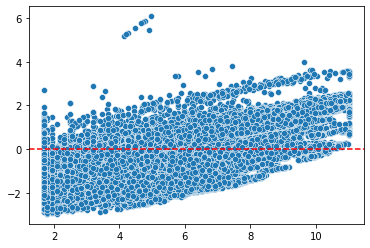

In [407]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [408]:
len(test_res)

45522

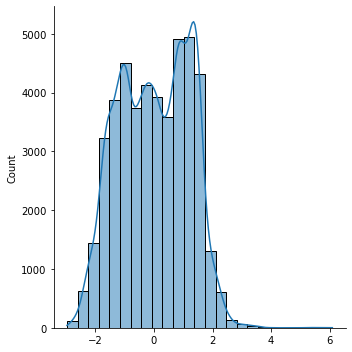

In [409]:
sns.displot(test_res,bins=25,kde=True)

#### For checking normality

In [410]:
import scipy as sp

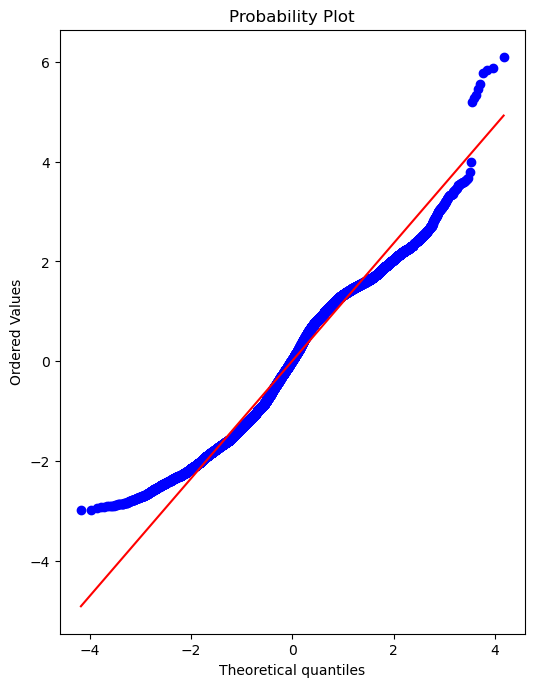

In [411]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

### Our model is:
y = -0.88 + 0.78 * (Average_sales_dollars) - 0.048 * (Average_sales_lbs) -0.0041 * (Average_searchvolume) + 1.38 * (Theme_Name_lowcarb) + 1.5 * (Theme_Name_salmon)